In [97]:
source("~/public/SiyuanLuo/projects/benchmark/scripts/evaluation/lib_metrics.R", chdir=TRUE)
source("~/public/SiyuanLuo/projects/benchmark/scripts/clustering/lib_clustering.R", chdir=TRUE)
source("~/public/SiyuanLuo/projects/benchmark/scripts/feature_engineering/func_aggregation.R", chdir=TRUE)


In [2]:
suppressPackageStartupMessages({
    devtools::load_all(path="~/public/SiyuanLuo/projects/benchmark/scripts/feature_engineering/scFeatAgg")
    devtools::reload(pkg ="~/public/SiyuanLuo/projects/benchmark/scripts/feature_engineering/scFeatAgg", quiet = FALSE)
    require(Signac)
    require(Seurat)
    require(SingleCellExperiment)
    require(mbkmeans)
    library(tidyr)
    library(scran)
})


ℹ Loading scFeatAgg
ℹ Reloading attached scFeatAgg


# Characterizing the feature count matrix

In [3]:
dataset <- "PBMC_multiomics"

## Aggregation

In [8]:
input <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/", dataset, "/feature_engineering/R/aggregation/default/500/default/30.tsv")
agg_mx <- read.table(input, sep='\t', row.names=1)

In [9]:
head(agg_mx)

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,⋯,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AACCCGCAGGTAGCTT-1,-14.38231,0.1255922,16.7375525,-3.3867132,-1.3164022,-0.06885533,-2.0356677,-0.2077071,0.6078508,0.1132550,⋯,-0.4571793,-0.05662549,0.2741969,0.95478010,0.06022286,0.8530631,0.2129878,0.3671614,0.17170607,-0.2159997
CGCATATAGGTTACGT-1,-14.40084,-2.1976575,7.5481158,-0.9227279,10.6369466,0.34873022,1.7210553,0.5422614,0.5337126,1.1584082,⋯,1.5604667,0.81504107,0.2974370,-0.36544230,-0.51385279,-0.5186618,0.7146241,0.3000004,0.54183161,0.1903020
TATTCGTTCCGCCTCA-1,26.24745,-3.0895225,0.4002507,-1.1883183,-0.5647971,3.64302257,0.5641259,-2.2067217,0.4791662,1.2783653,⋯,0.9089251,-0.84011598,0.2614909,0.52438624,0.41537044,2.5996388,1.2511229,-0.7959444,0.60455629,-0.3462136
ATGAATGCATTGTCAG-1,25.08329,-1.5362470,-0.3207914,-2.6552853,0.9852379,0.56052922,-0.5381634,-1.5304516,-0.1386746,0.8538001,⋯,1.5819969,0.29080030,0.1821624,-0.01077114,-0.49936123,0.9426772,0.3272674,0.0469892,0.15545023,0.1477142
CGGTTTGAGTTTGGTA-1,-13.82858,-0.3217071,19.7116582,-4.5119286,-3.8873948,-0.61002338,-0.8605426,0.8260005,-0.5321061,-0.2487160,⋯,-0.1366615,-0.83083677,0.6921248,-0.05272443,-1.01776567,0.5188674,0.6993816,-0.3135295,0.01710432,0.0120108
ACTTCGCTCAAACACC-1,-15.44734,-3.2959782,-6.8721603,-2.5775927,-4.5205977,0.05207361,-1.6755766,0.5770633,0.5067507,-0.4831797,⋯,-0.6513819,0.57224029,-1.1745052,0.14756850,0.43047827,0.7960363,-1.5763240,1.5409815,0.37944917,-0.8783919


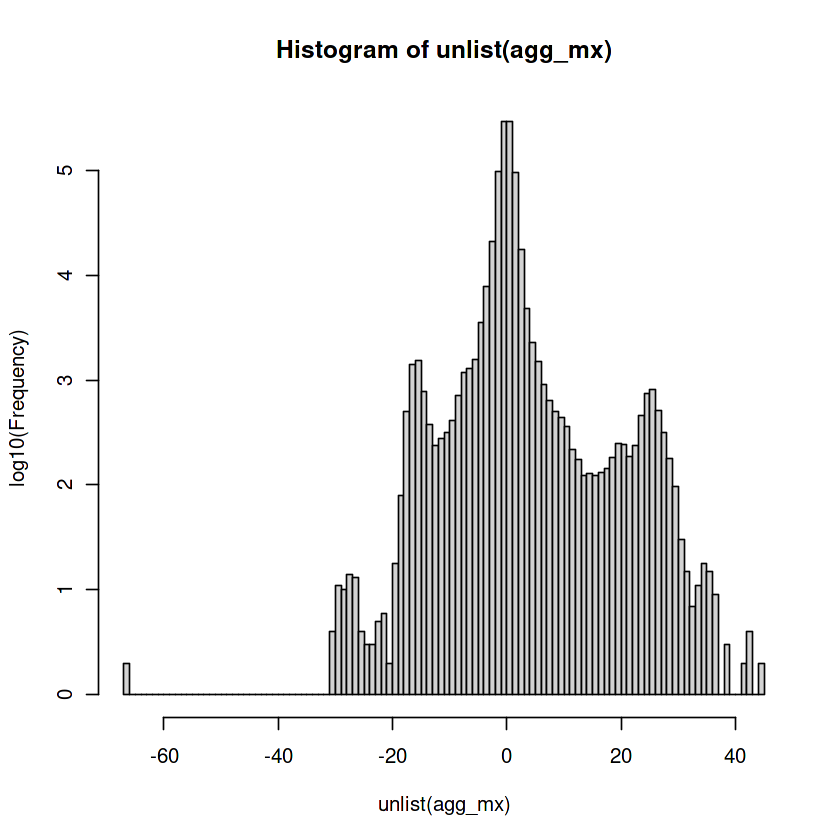

In [18]:
hist.data = hist(unlist(agg_mx), plot=F, breaks=100)
hist.data$counts = log10(hist.data$counts+1)

# dev.new(width=4, height=4)
plot(hist.data, ylab='log10(Frequency)')

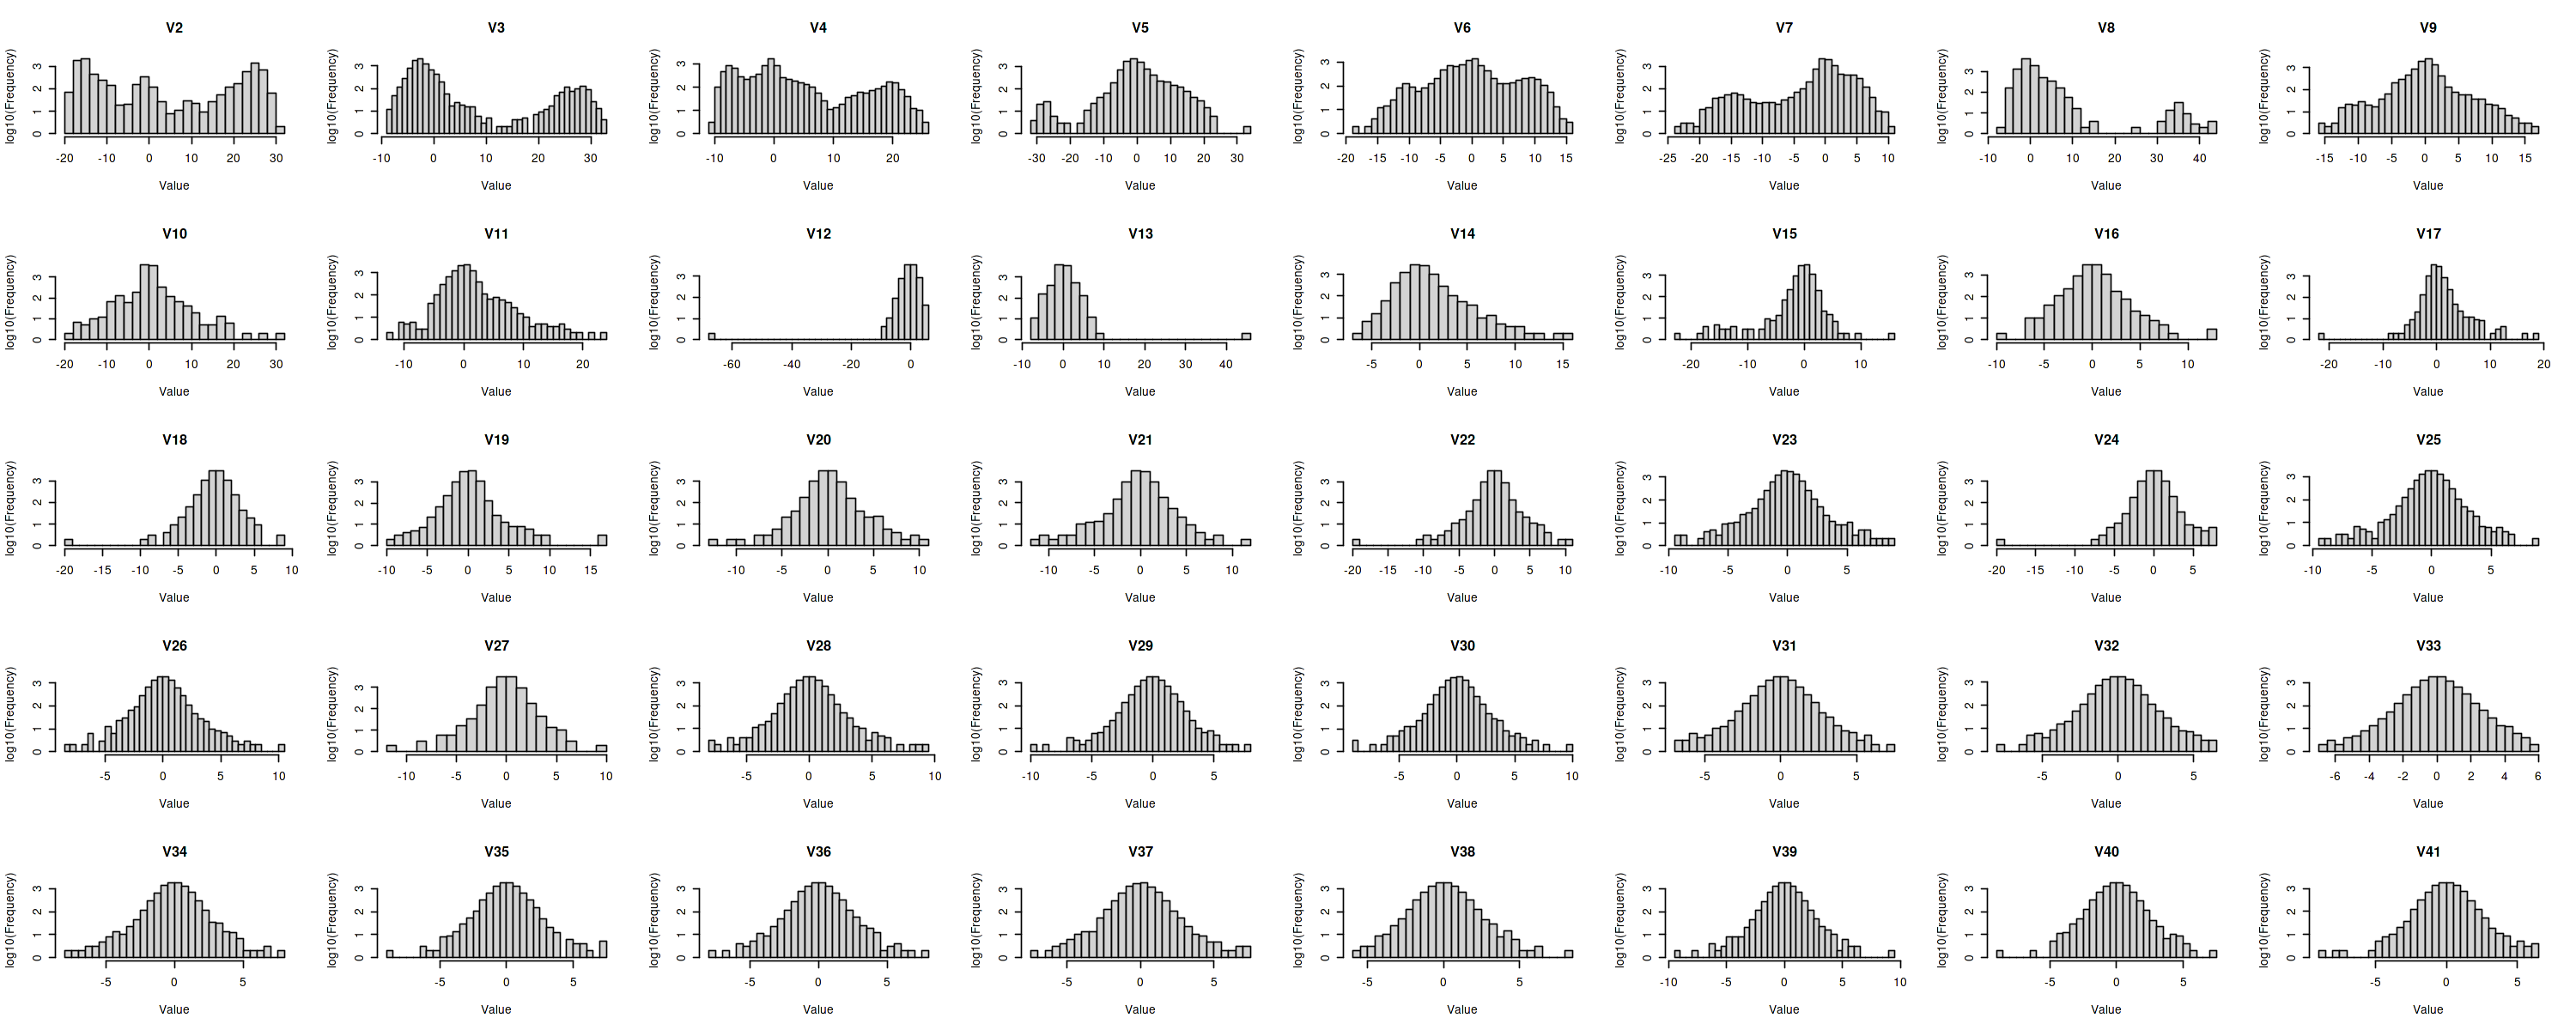

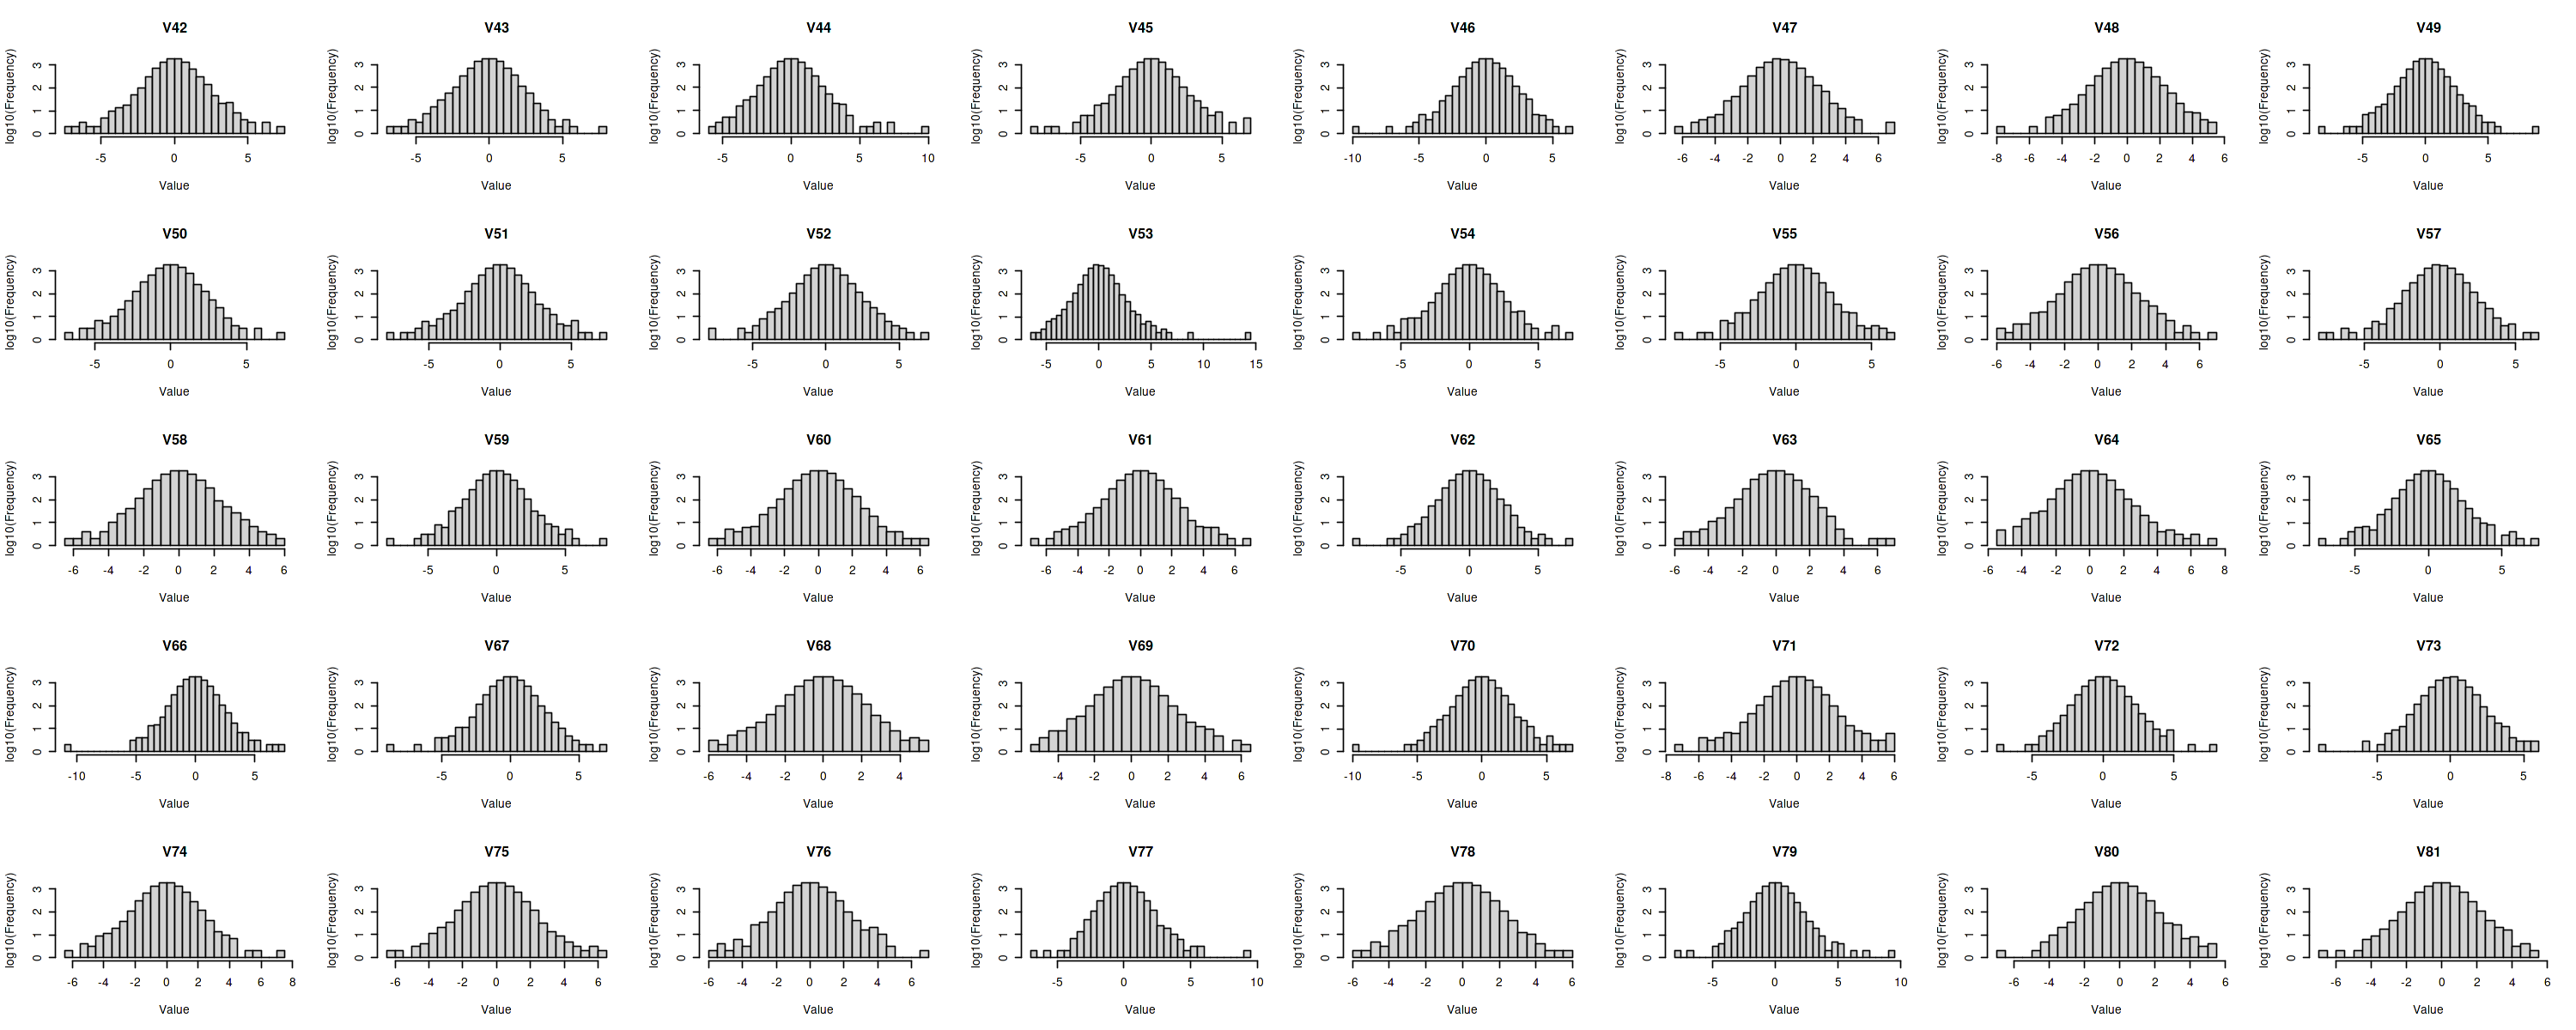

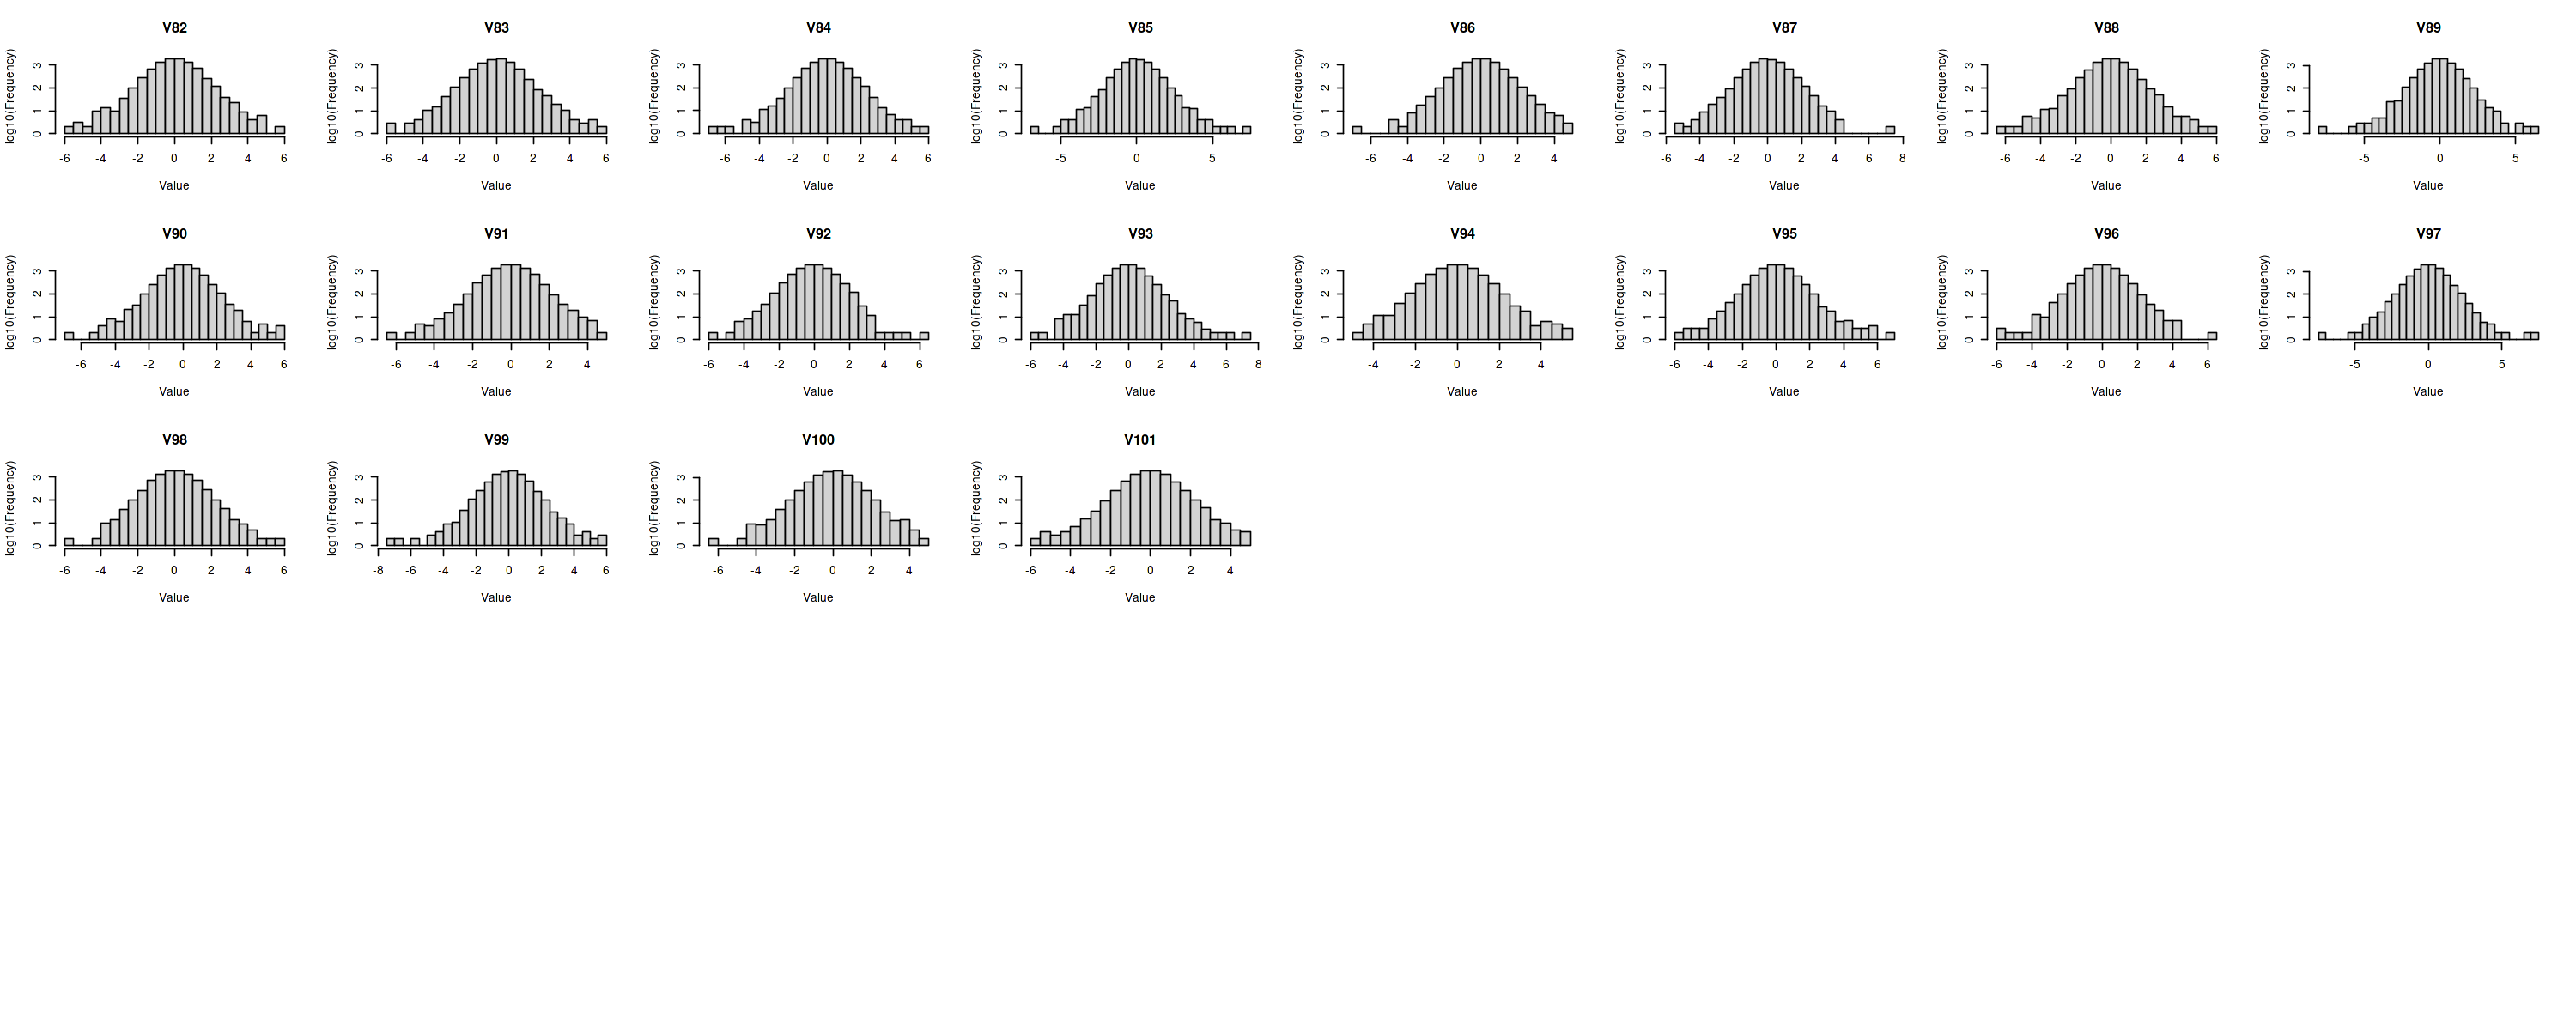

In [63]:
options(repr.plot.width=25, repr.plot.height=10)
# Set up the plotting area to show multiple histograms
par(mfrow = c(5, 8))

# Plot a histogram for each column of the dataframe
for (col in names(agg_mx)[1:100]) {
  hist.data = hist(agg_mx[[col]], plot=F, breaks=30)
  hist.data$counts = log10(hist.data$counts+1)

plot(hist.data, ylab='log10(Frequency)', xlab="Value", main = col)
  # hist(agg_mx[[col]], 
  #      main = col, 
  #      xlab = "Value", 
  #      ylab = "Frequency",
  #      breaks = 30)
}

## Signac

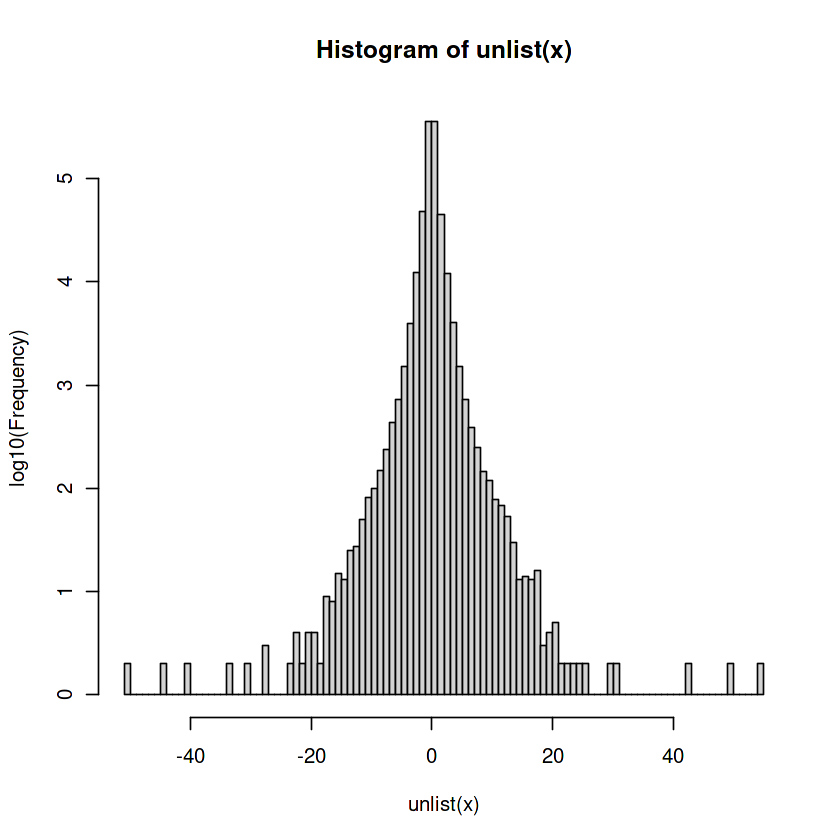

In [12]:
input <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/", dataset, "/feature_engineering/R/Signac/by_cluster_peaks/0/default/100.tsv")
x <- read.table(input, sep='\t', row.names=1)

hist.data = hist(unlist(x), plot=F, breaks=100)
hist.data$counts = log10(hist.data$counts+1)

options(repr.plot.width=7, repr.plot.height=7)
# dev.new(width=4, height=4)
plot(hist.data, ylab='log10(Frequency)')

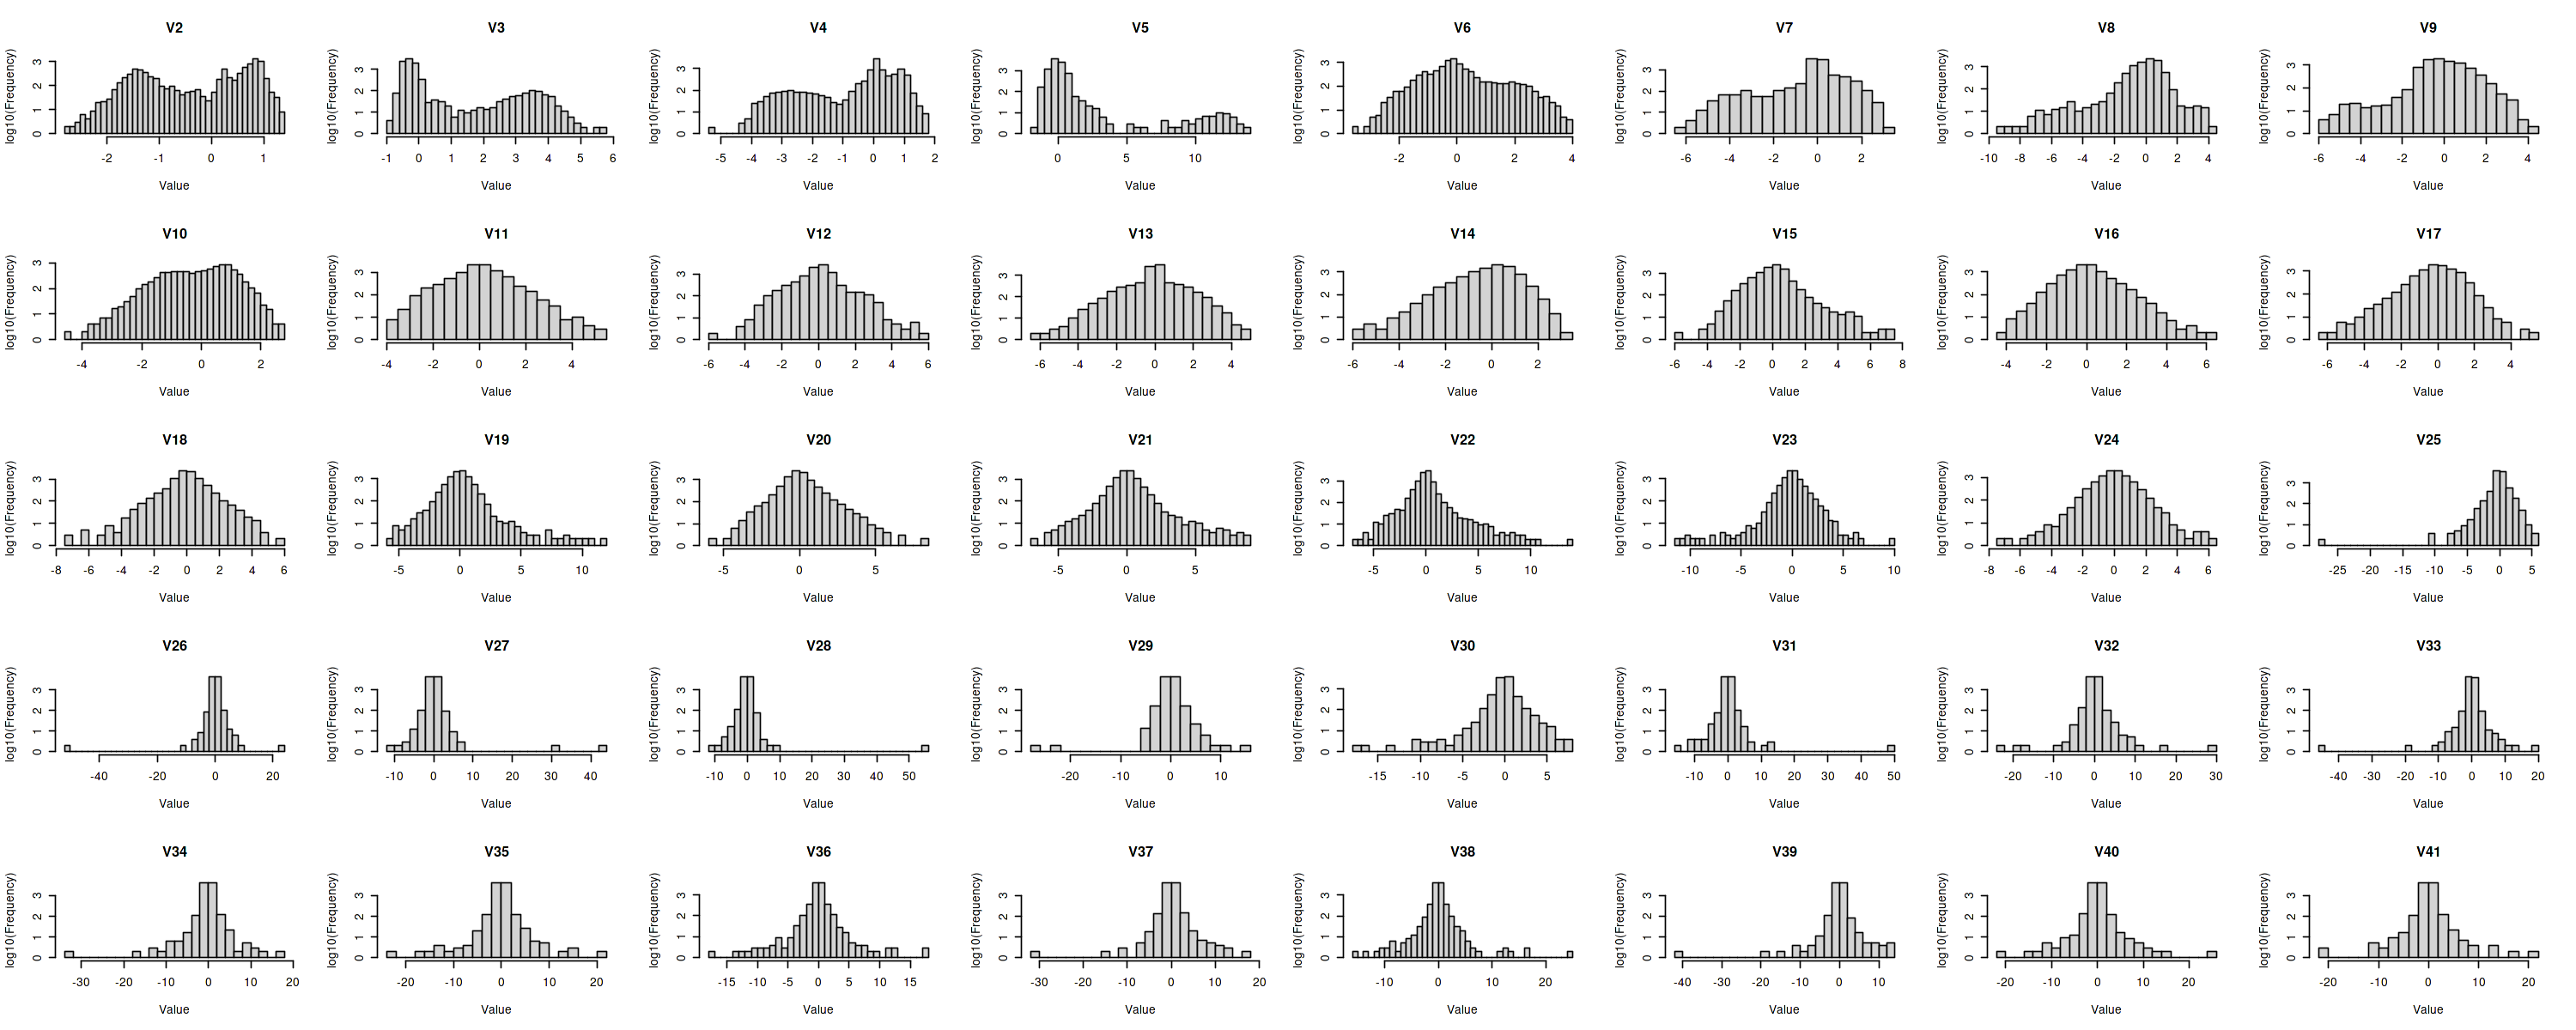

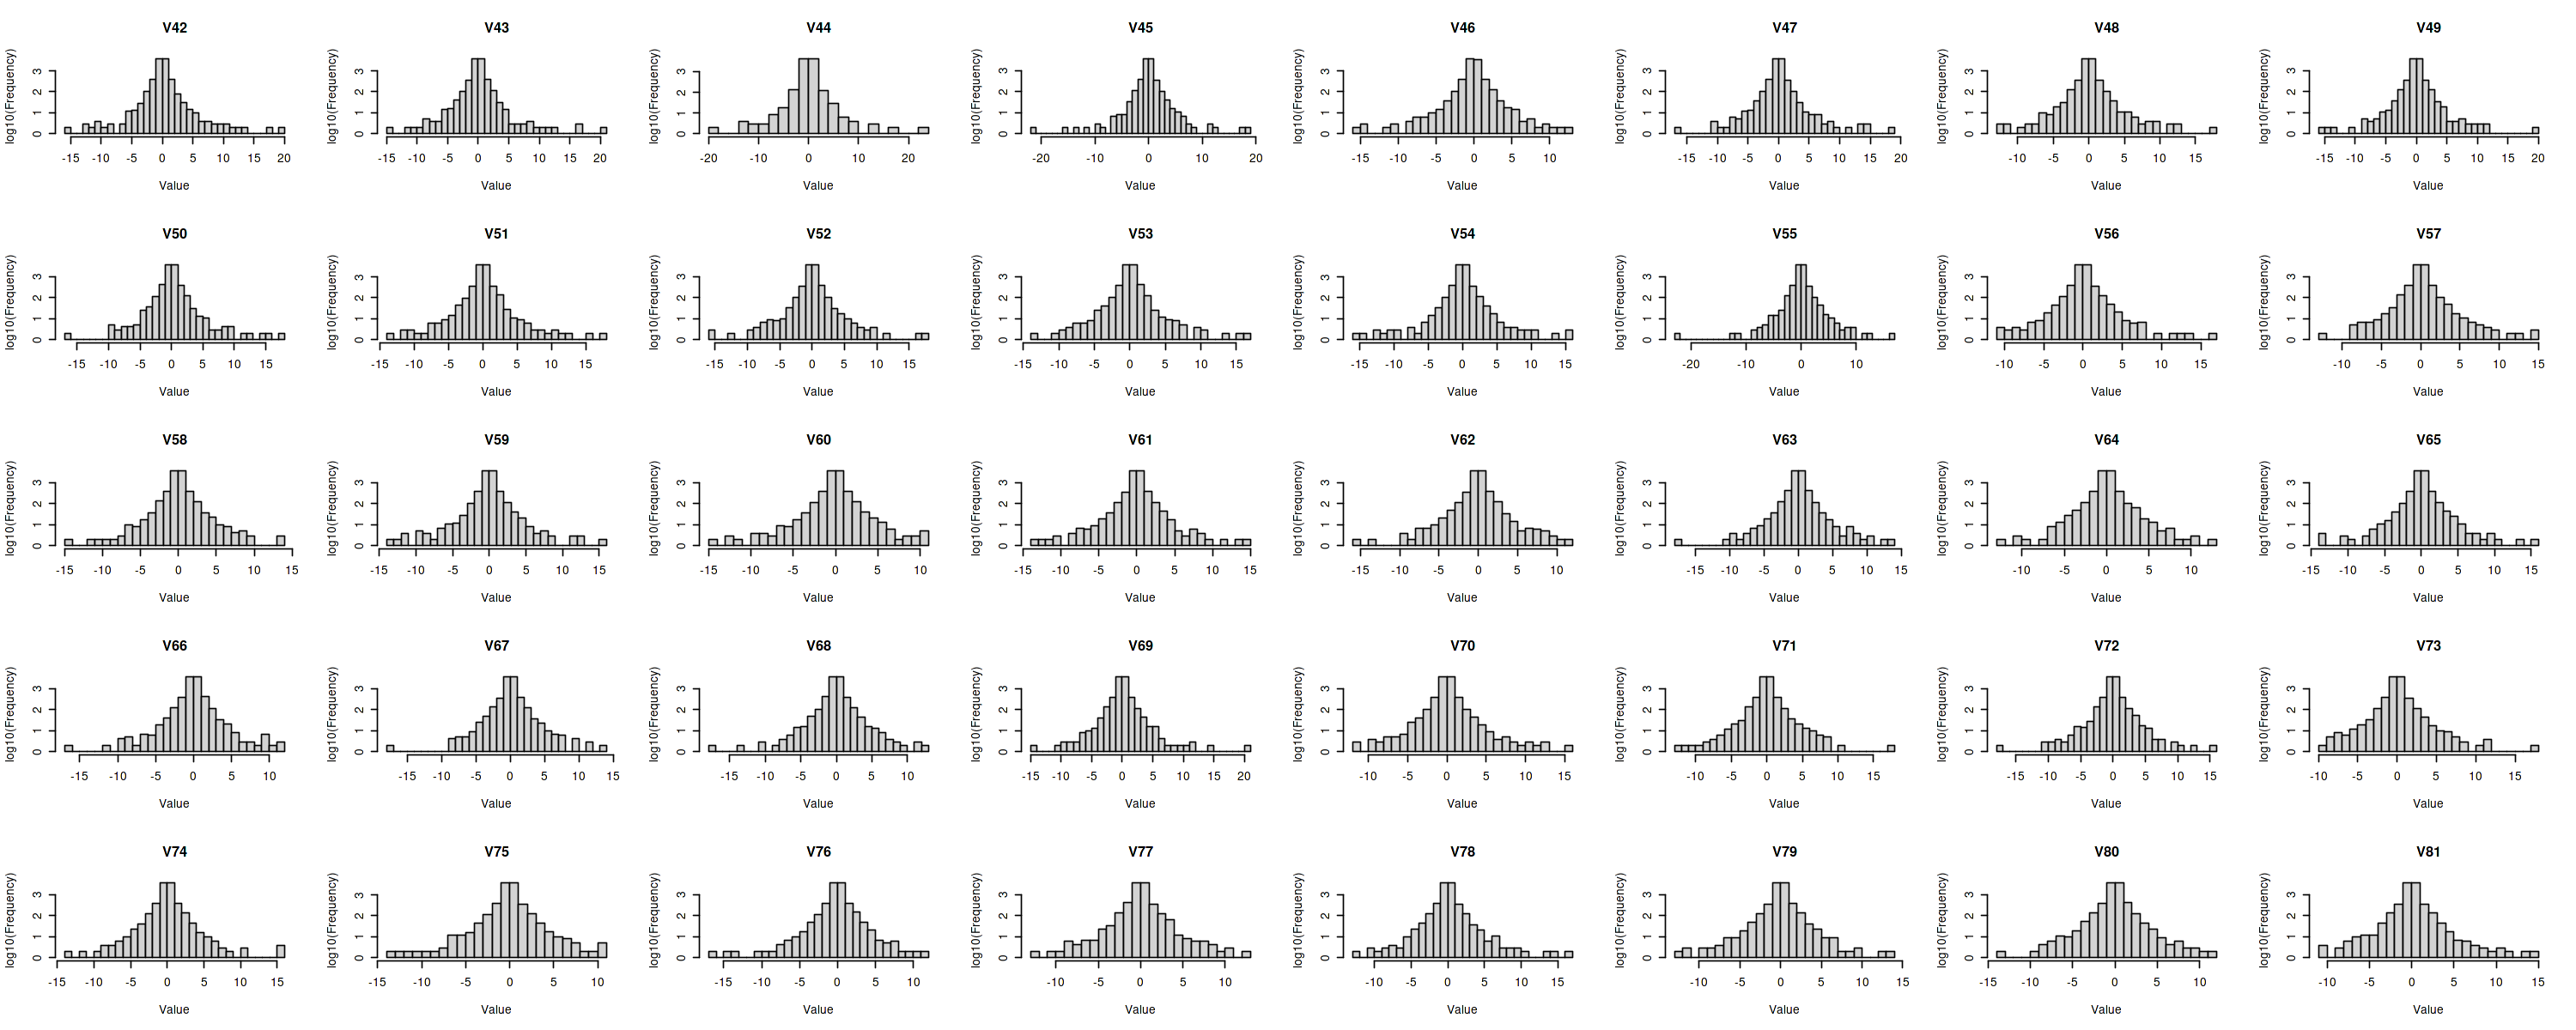

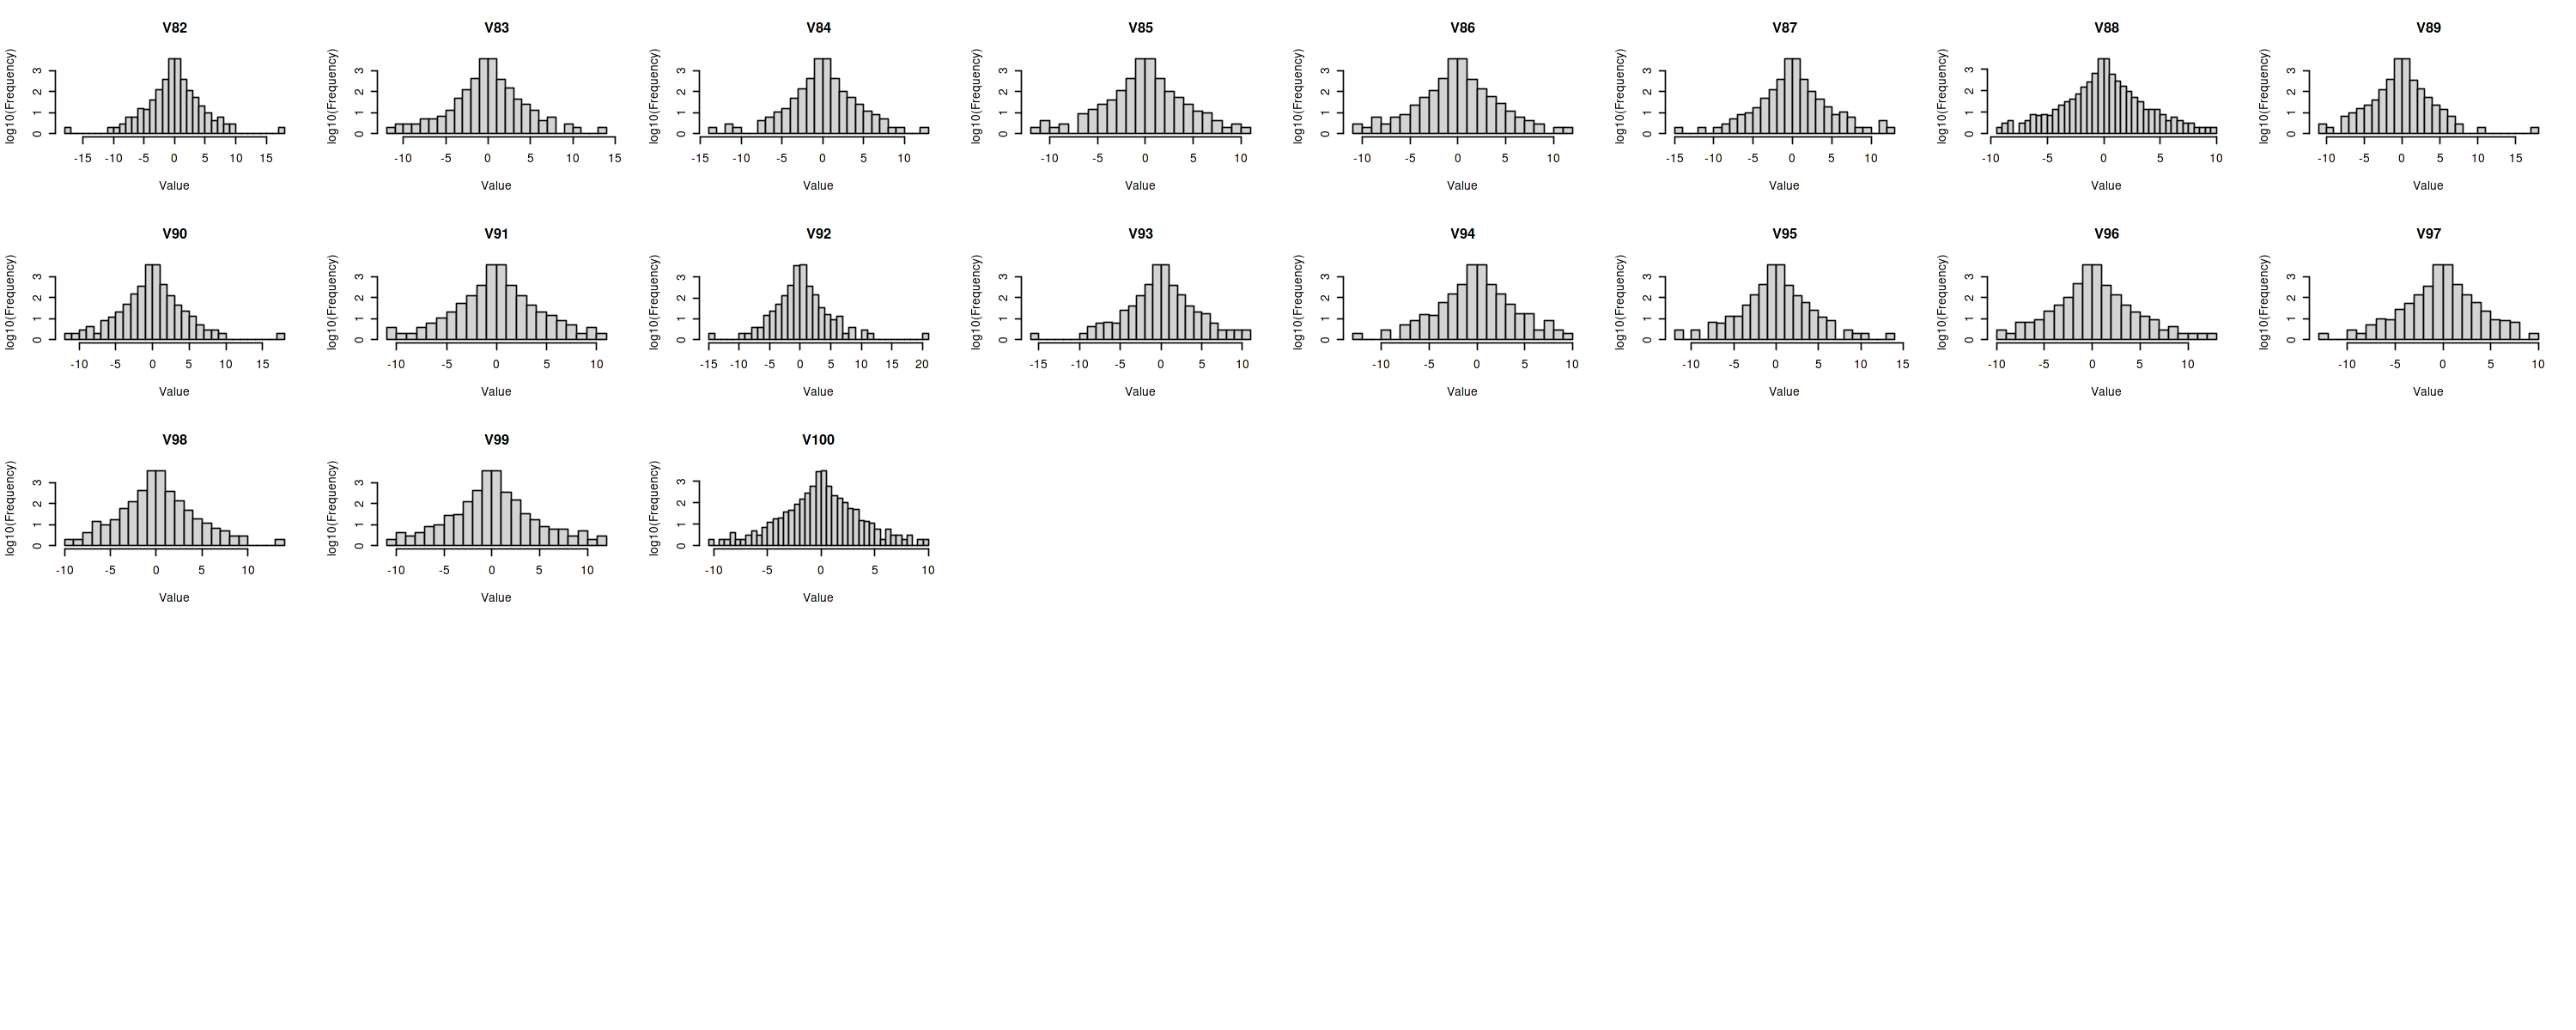

In [13]:
options(repr.plot.width=25, repr.plot.height=10)
# Set up the plotting area to show multiple histograms
par(mfrow = c(5, 8))

# Plot a histogram for each column of the dataframe
for (col in names(x)) {
  hist.data = hist(x[[col]], plot=F, breaks=30)
  hist.data$counts = log10(hist.data$counts+1)

plot(hist.data, ylab='log10(Frequency)', xlab="Value", main = col)
}

## ArchR

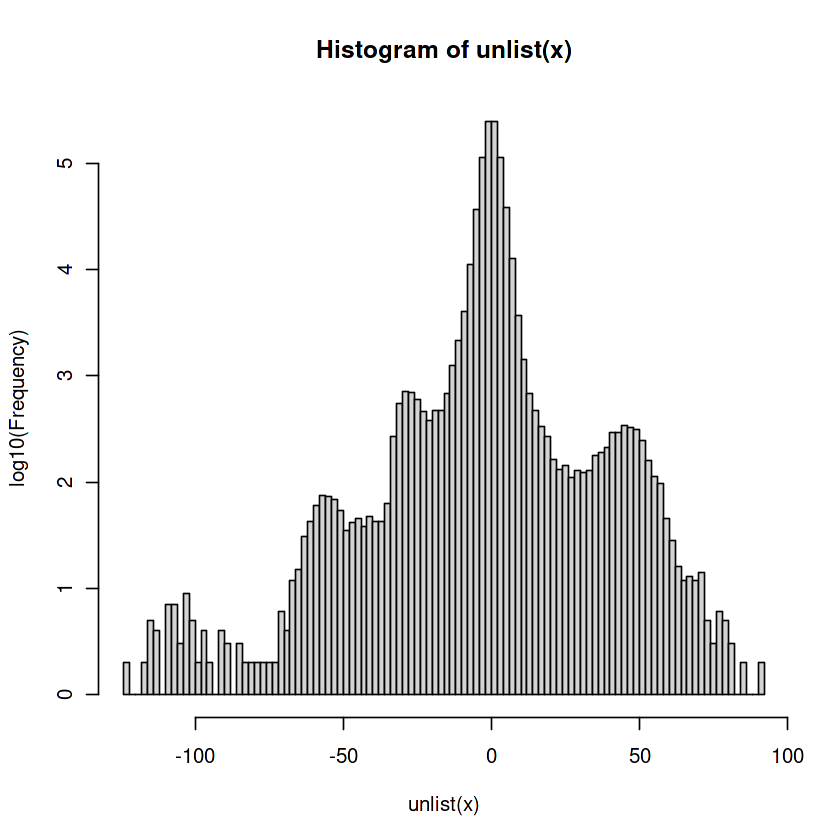

In [15]:
input <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/", dataset, "/feature_engineering/R/ArchR/peaks/500/default/100.tsv")
x <- read.table(input, sep='\t', row.names=1, comment.char = "")

hist.data = hist(unlist(x), plot=F, breaks=100)
hist.data$counts = log10(hist.data$counts+1)

options(repr.plot.width=7, repr.plot.height=7)
# dev.new(width=4, height=4)
plot(hist.data, ylab='log10(Frequency)')

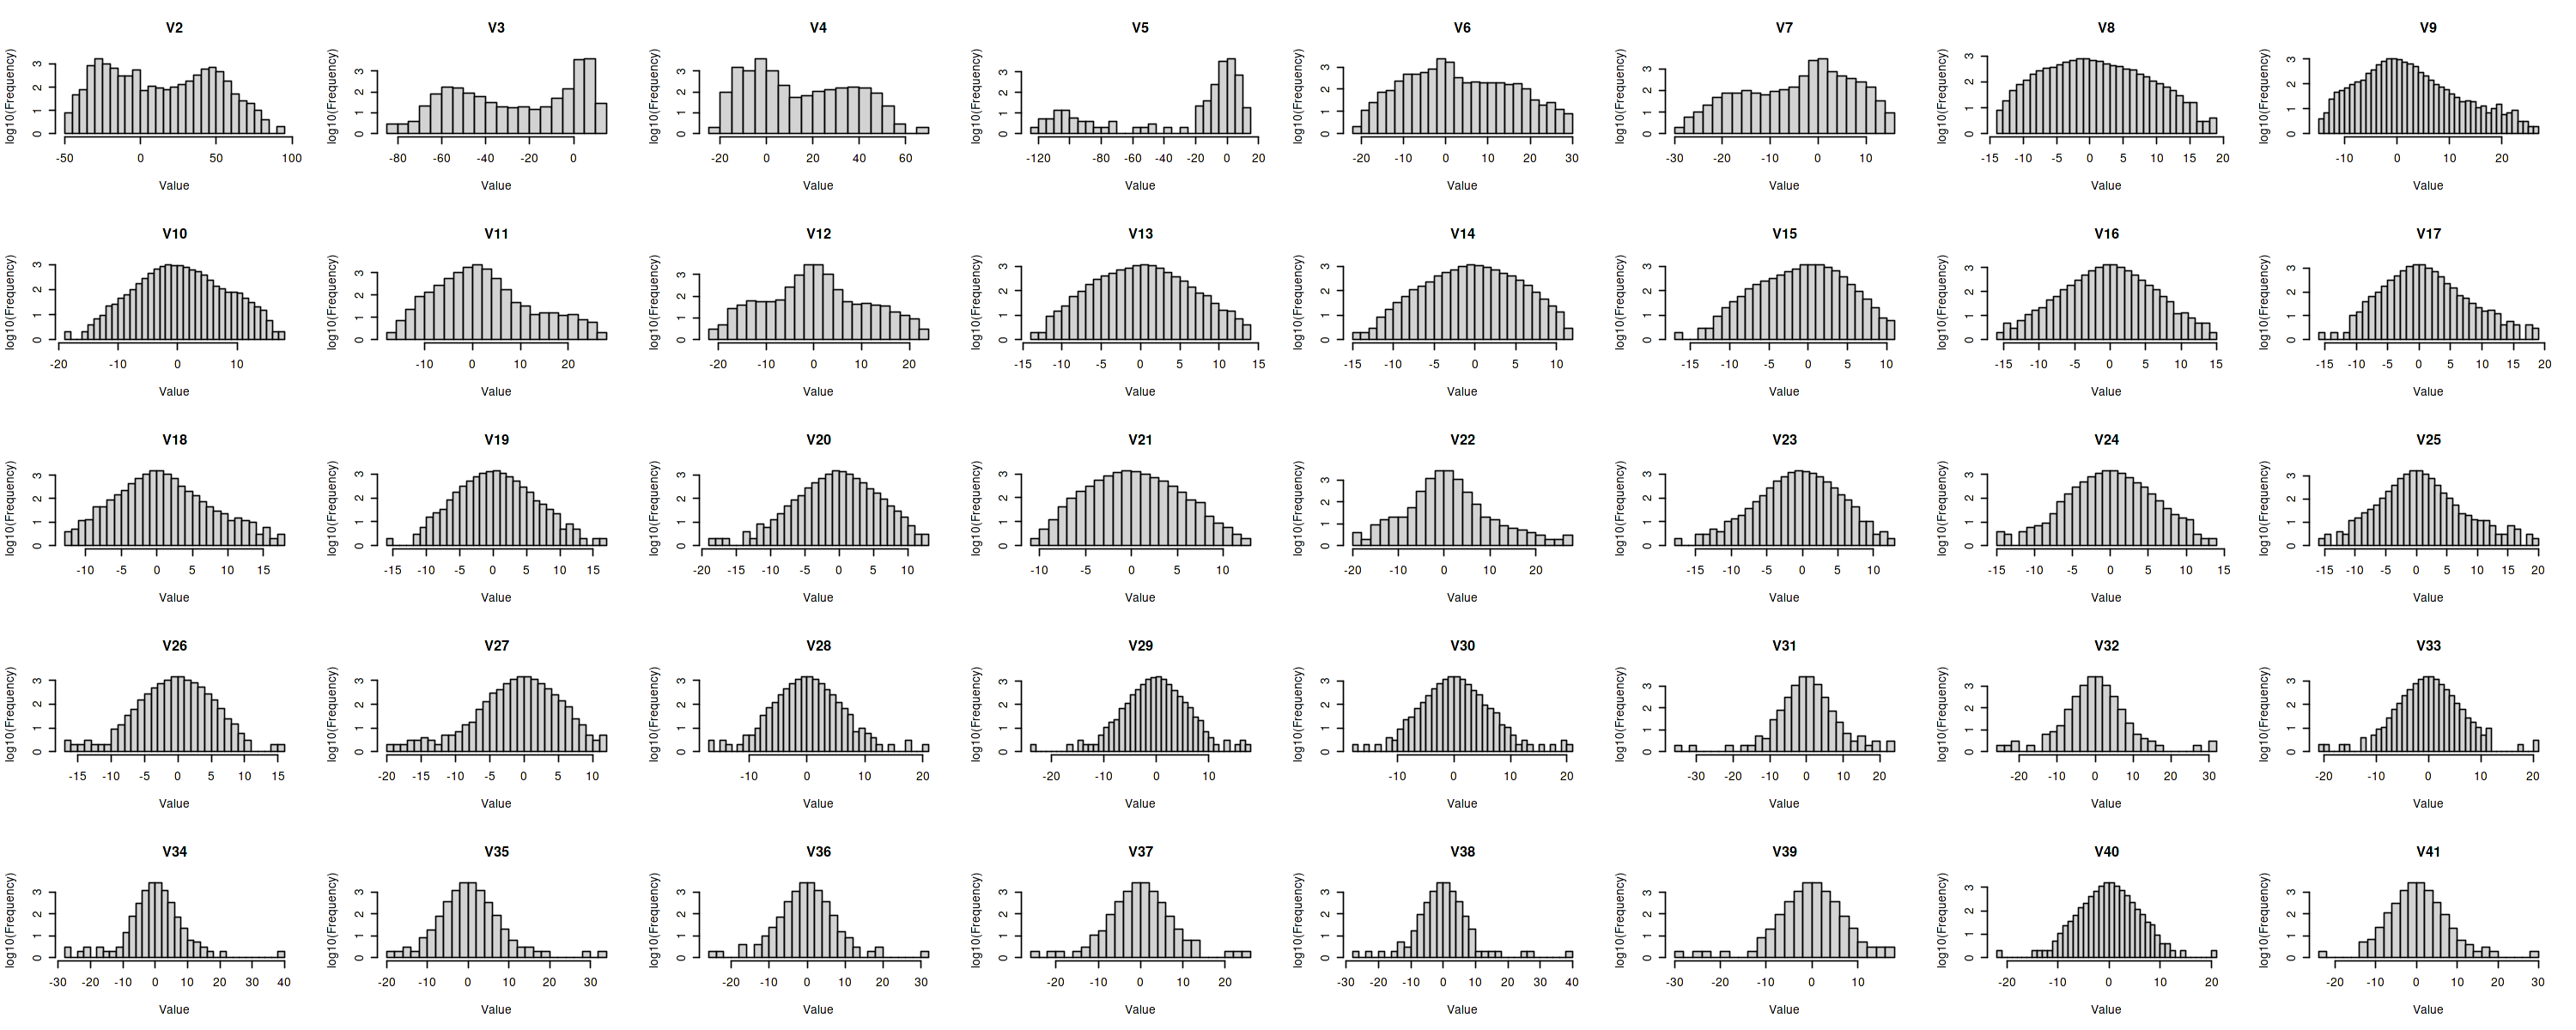

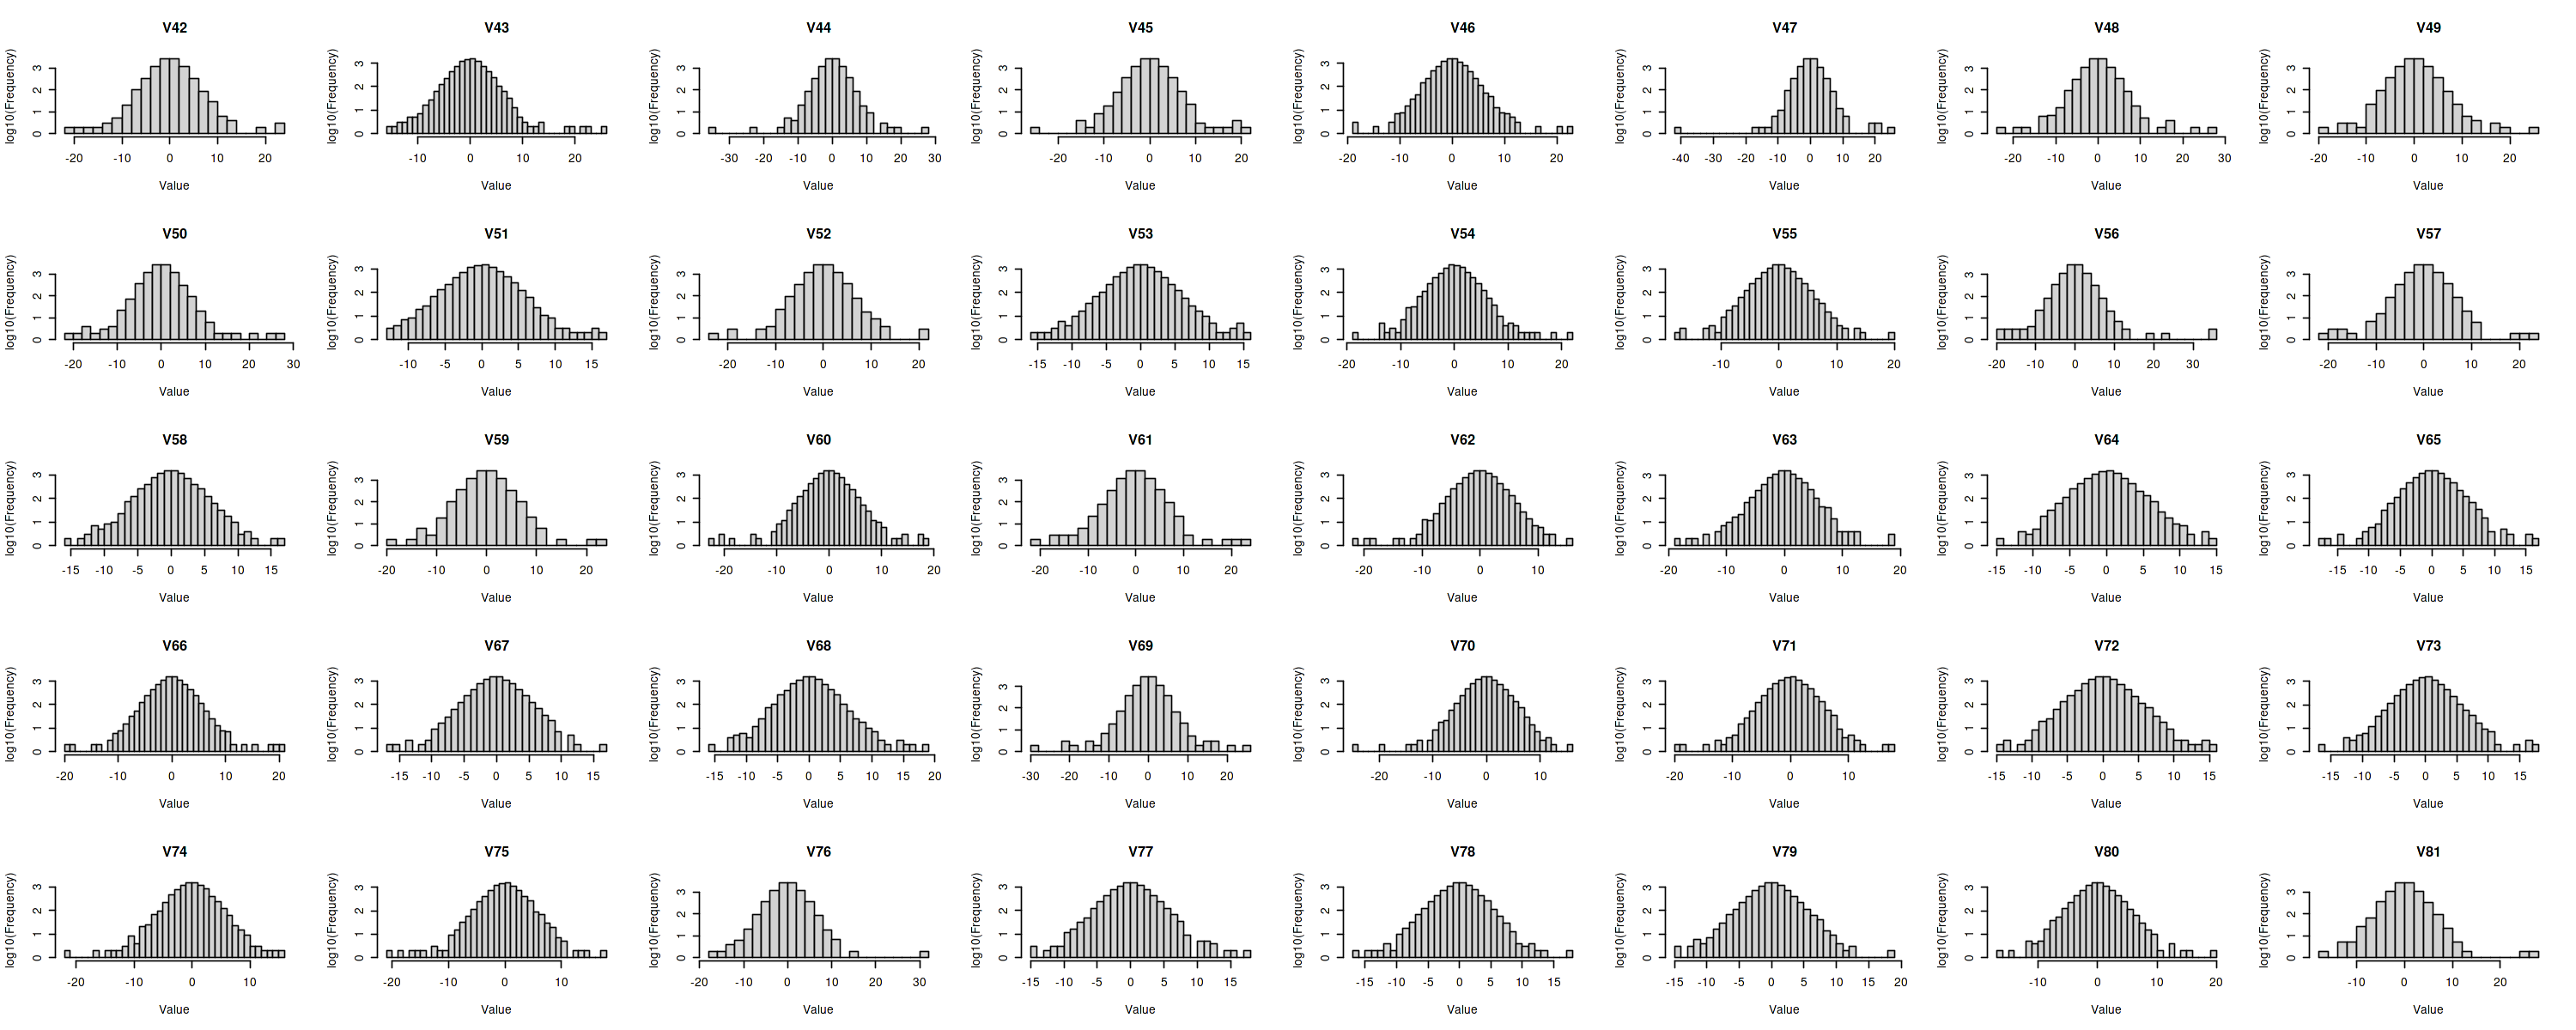

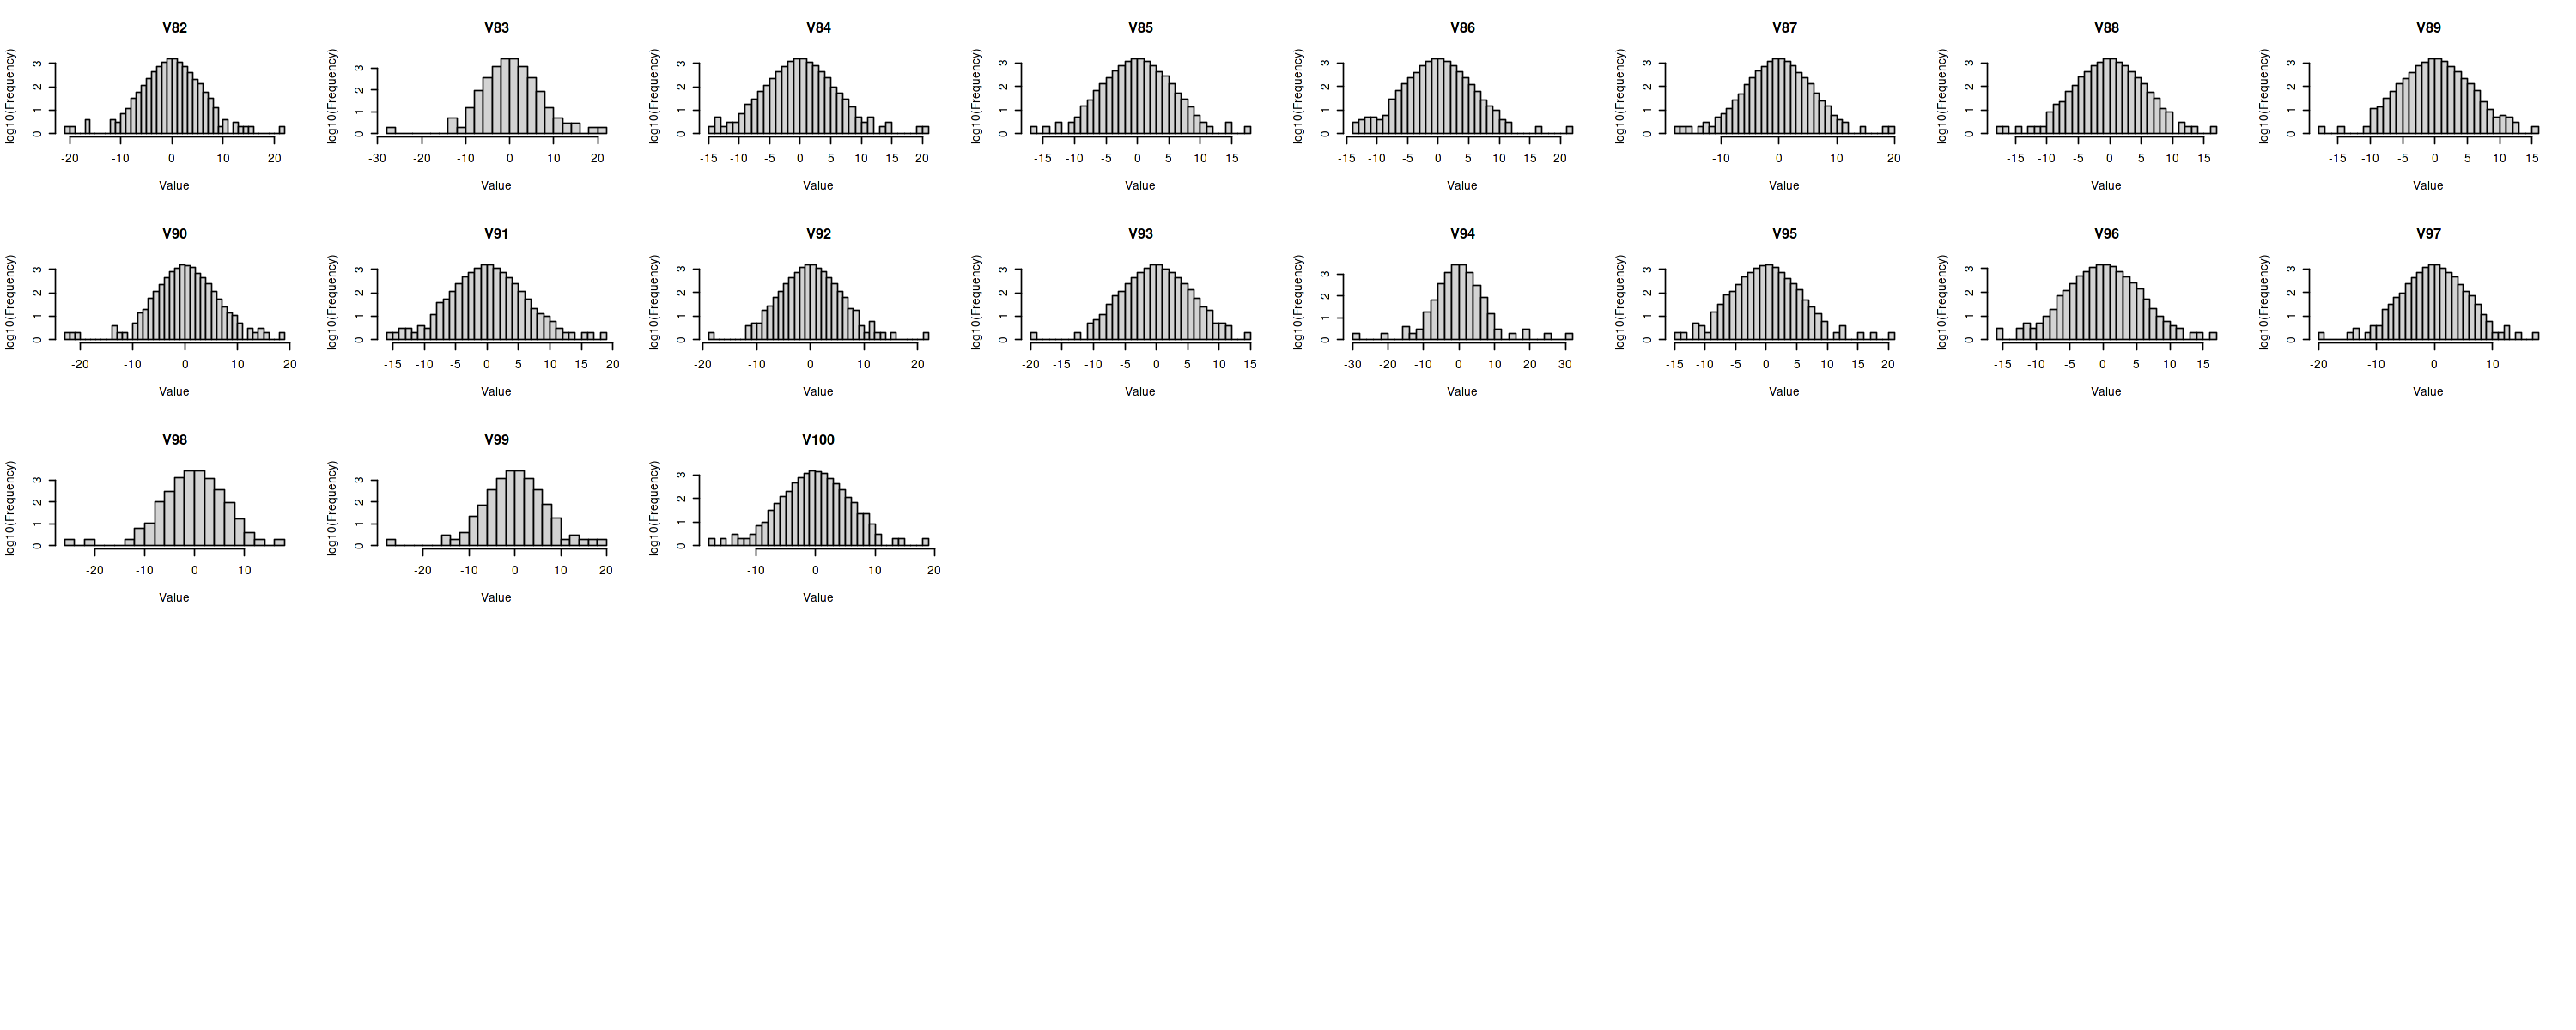

In [16]:
options(repr.plot.width=25, repr.plot.height=10)
# Set up the plotting area to show multiple histograms
par(mfrow = c(5, 8))

# Plot a histogram for each column of the dataframe
for (col in names(x)) {
  hist.data = hist(x[[col]], plot=F, breaks=30)
  hist.data$counts = log10(hist.data$counts+1)

plot(hist.data, ylab='log10(Frequency)', xlab="Value", main = col)
}

## SnapATAC1

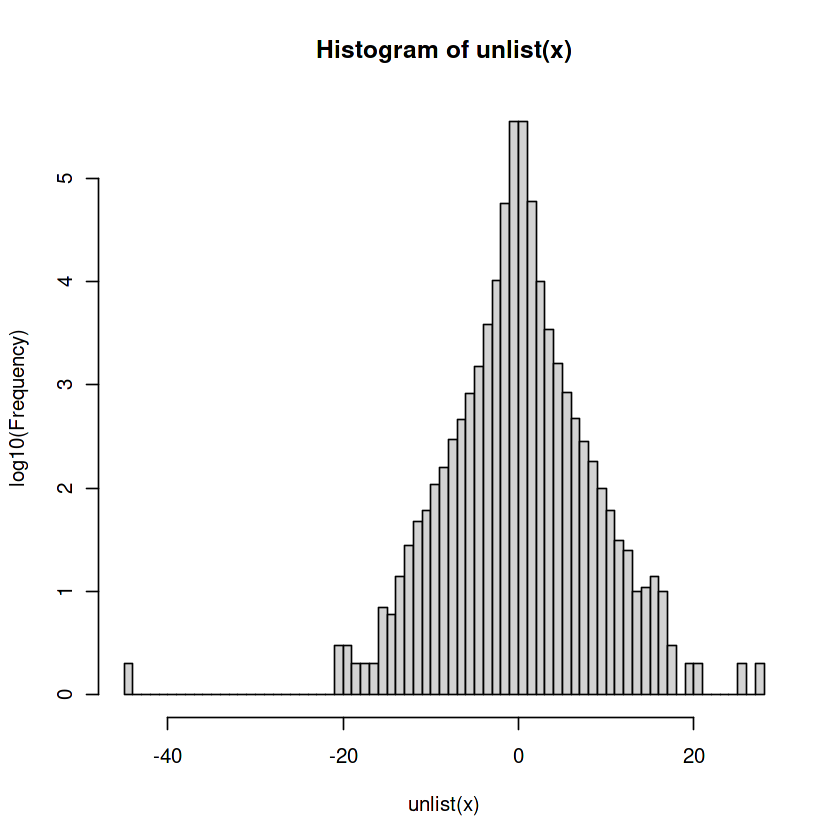

In [17]:
input <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/", dataset, "/feature_engineering/R/SnapATAC1/default/5000/default/100.tsv")
x <- read.table(input, sep='\t', row.names=1, comment.char = "")

hist.data = hist(unlist(x), plot=F, breaks=100)
hist.data$counts = log10(hist.data$counts+1)

options(repr.plot.width=7, repr.plot.height=7)
# dev.new(width=4, height=4)
plot(hist.data, ylab='log10(Frequency)')

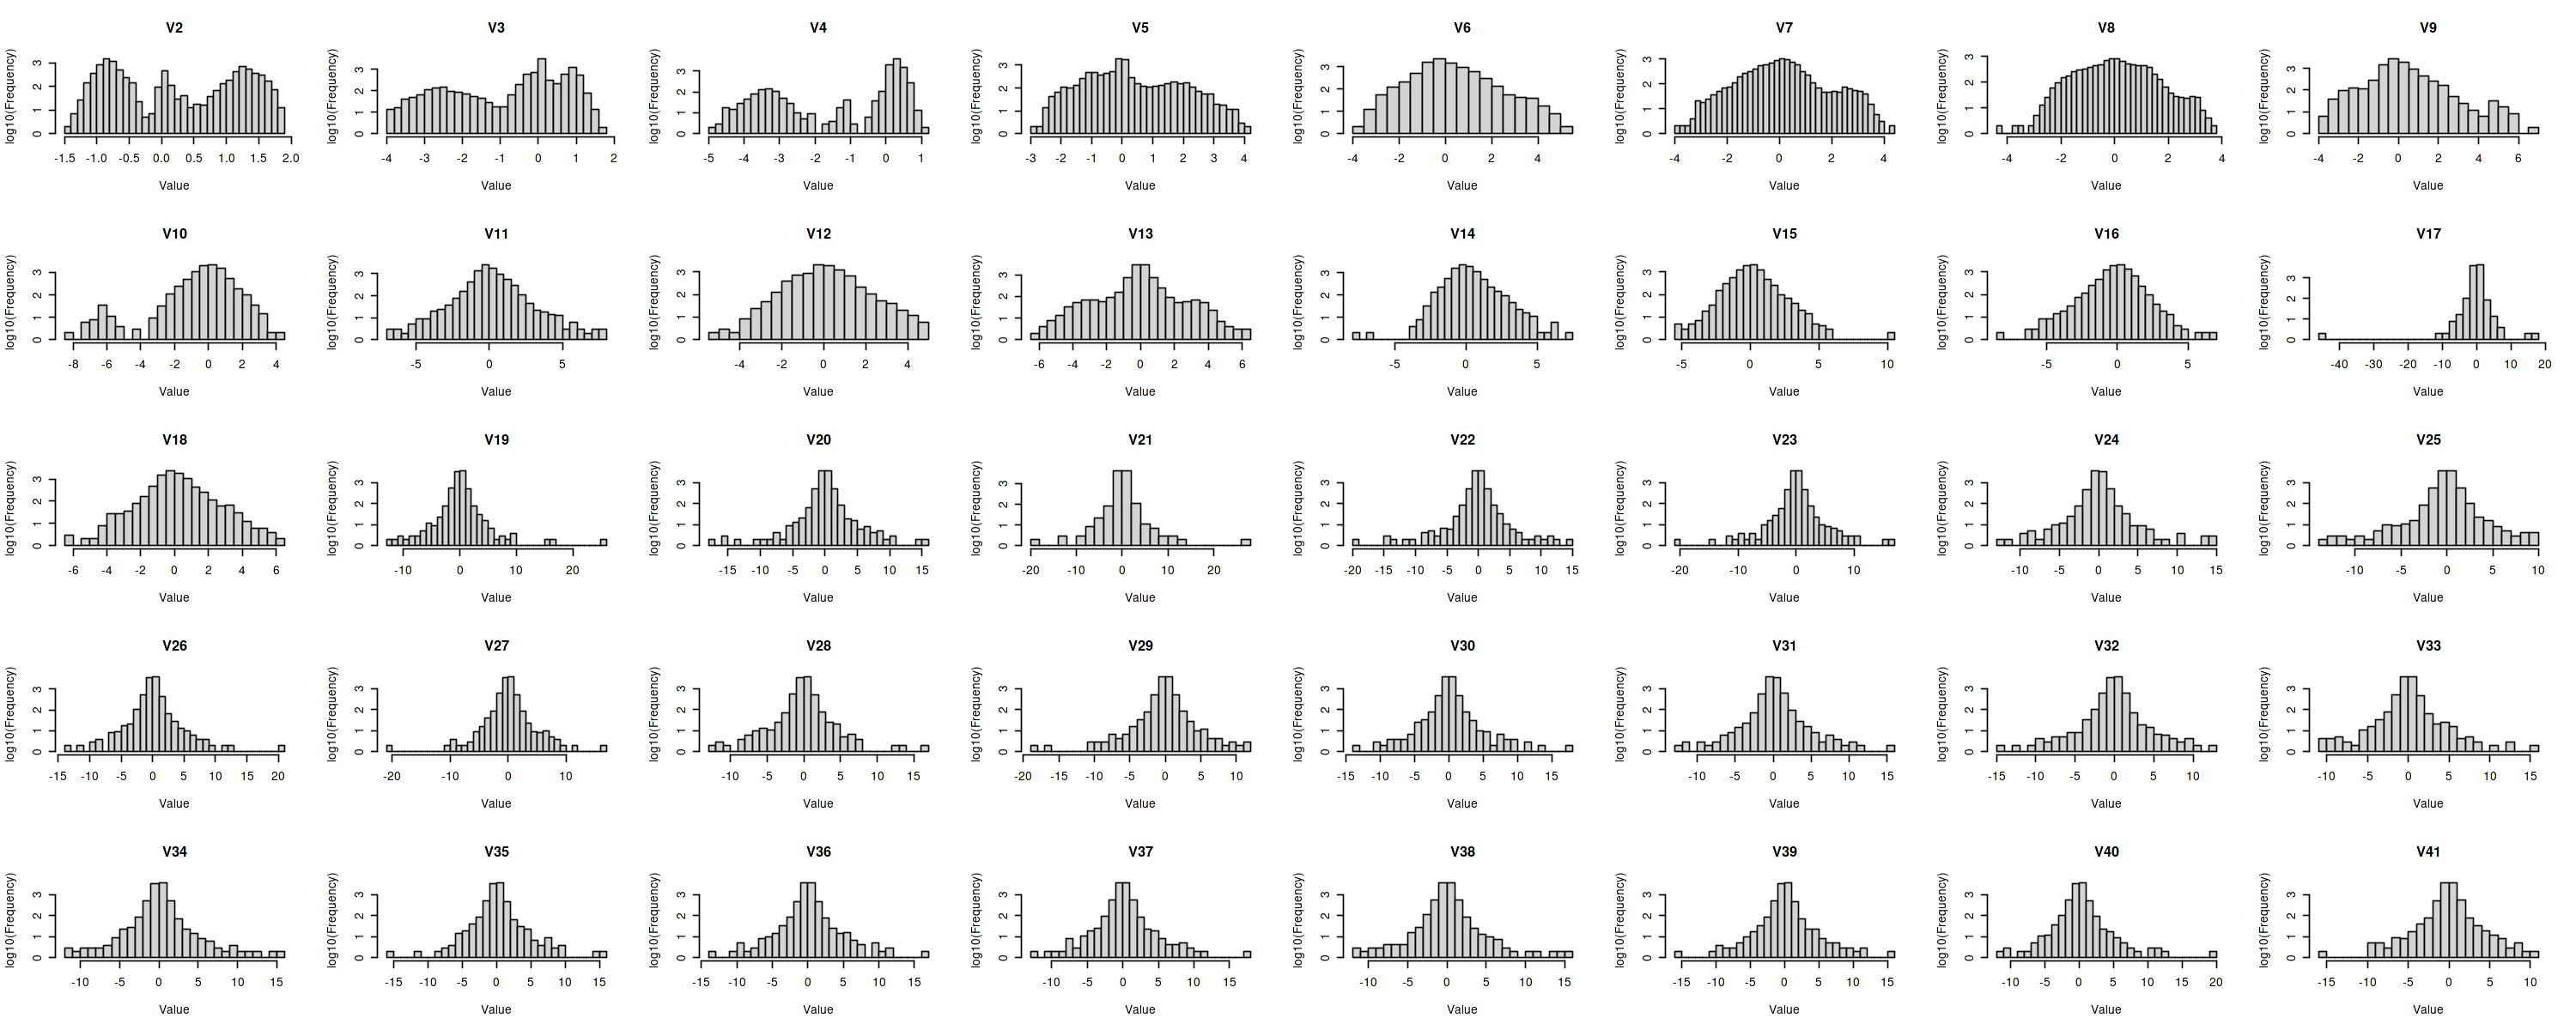

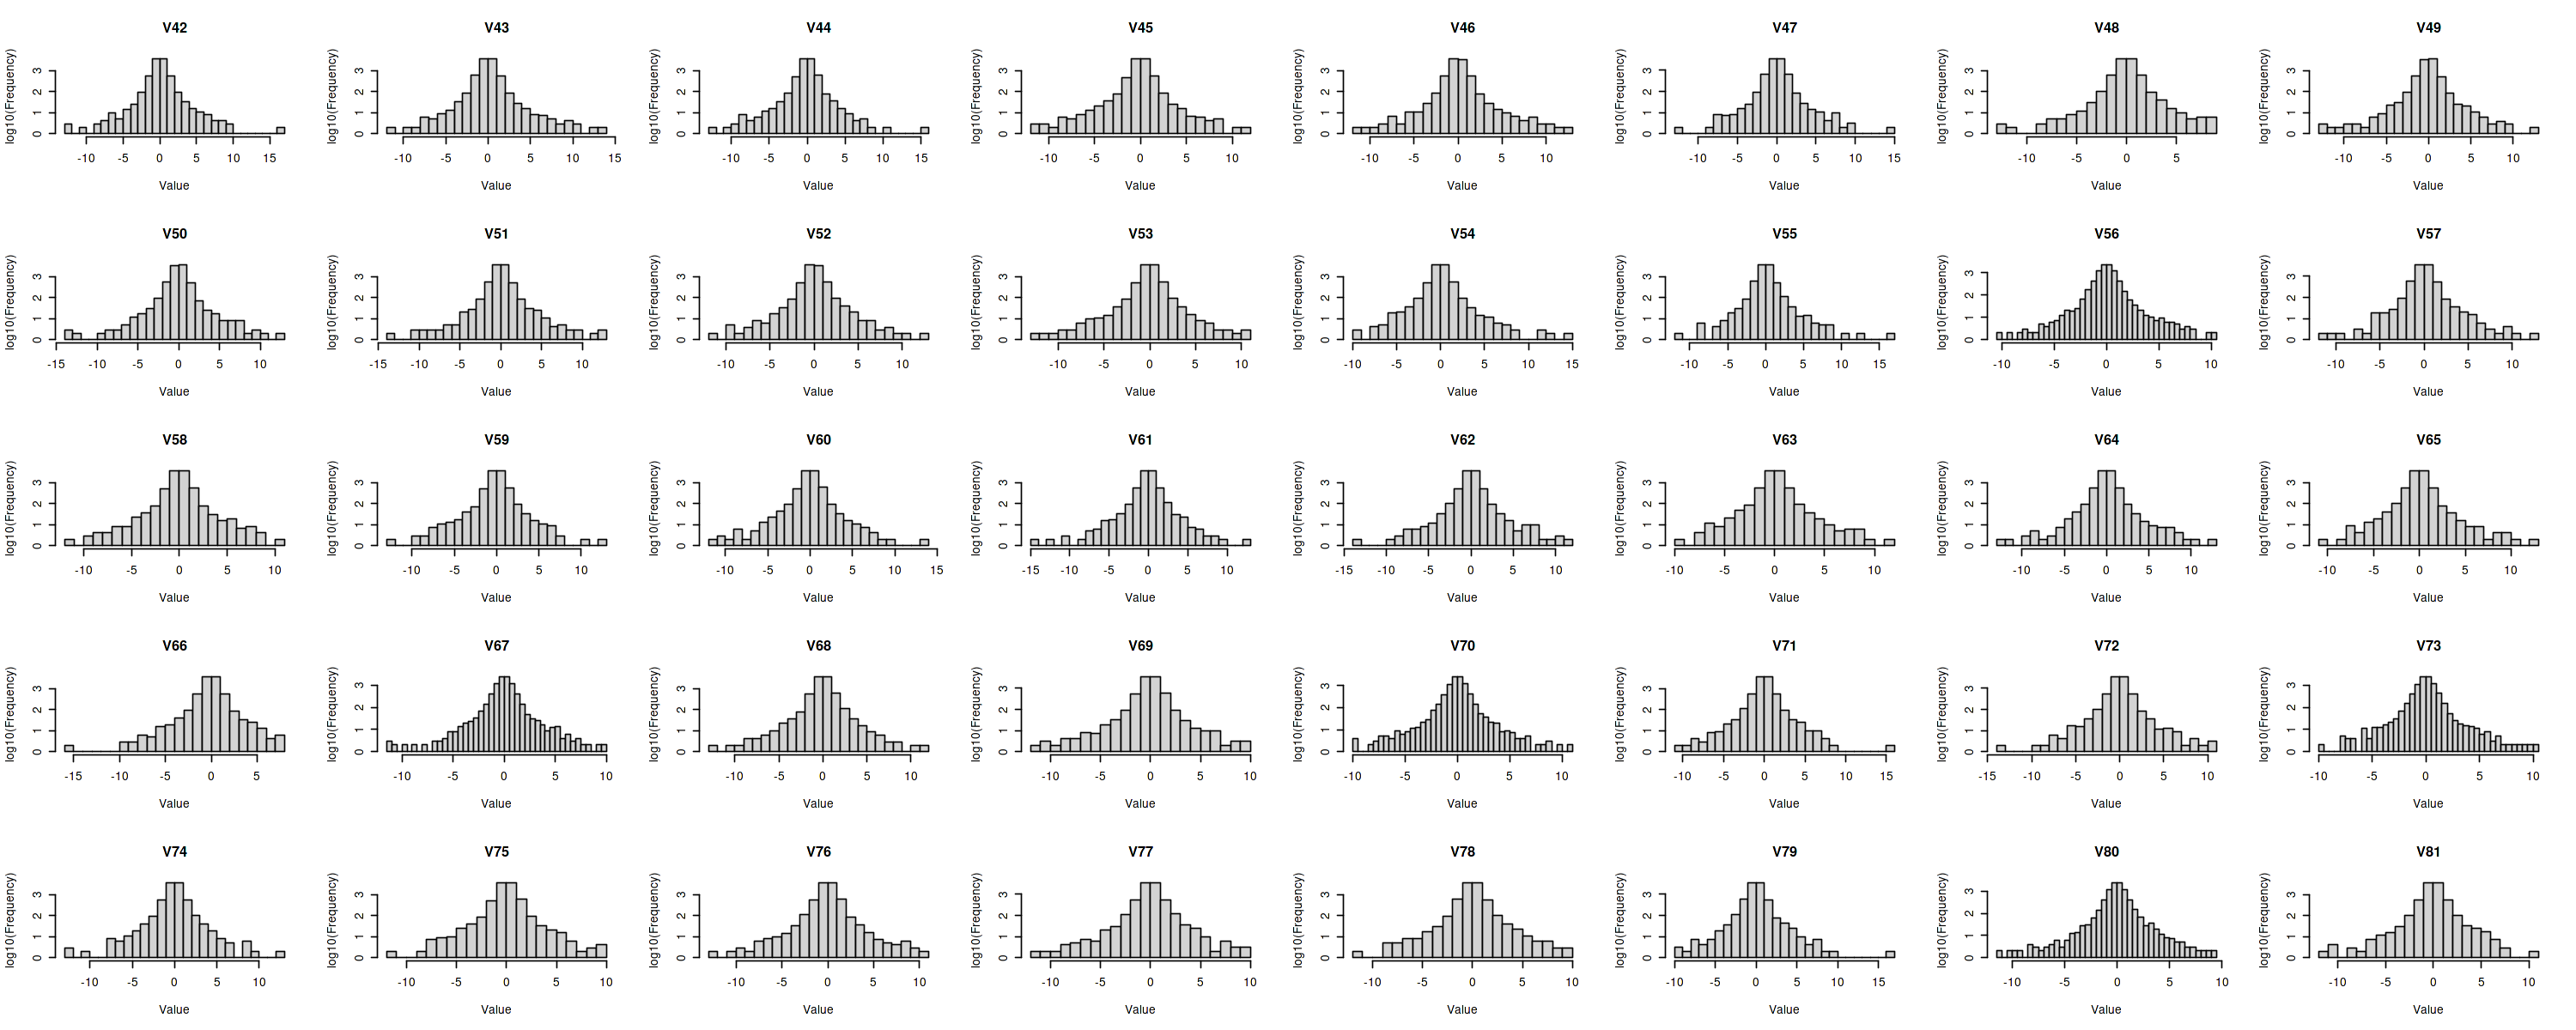

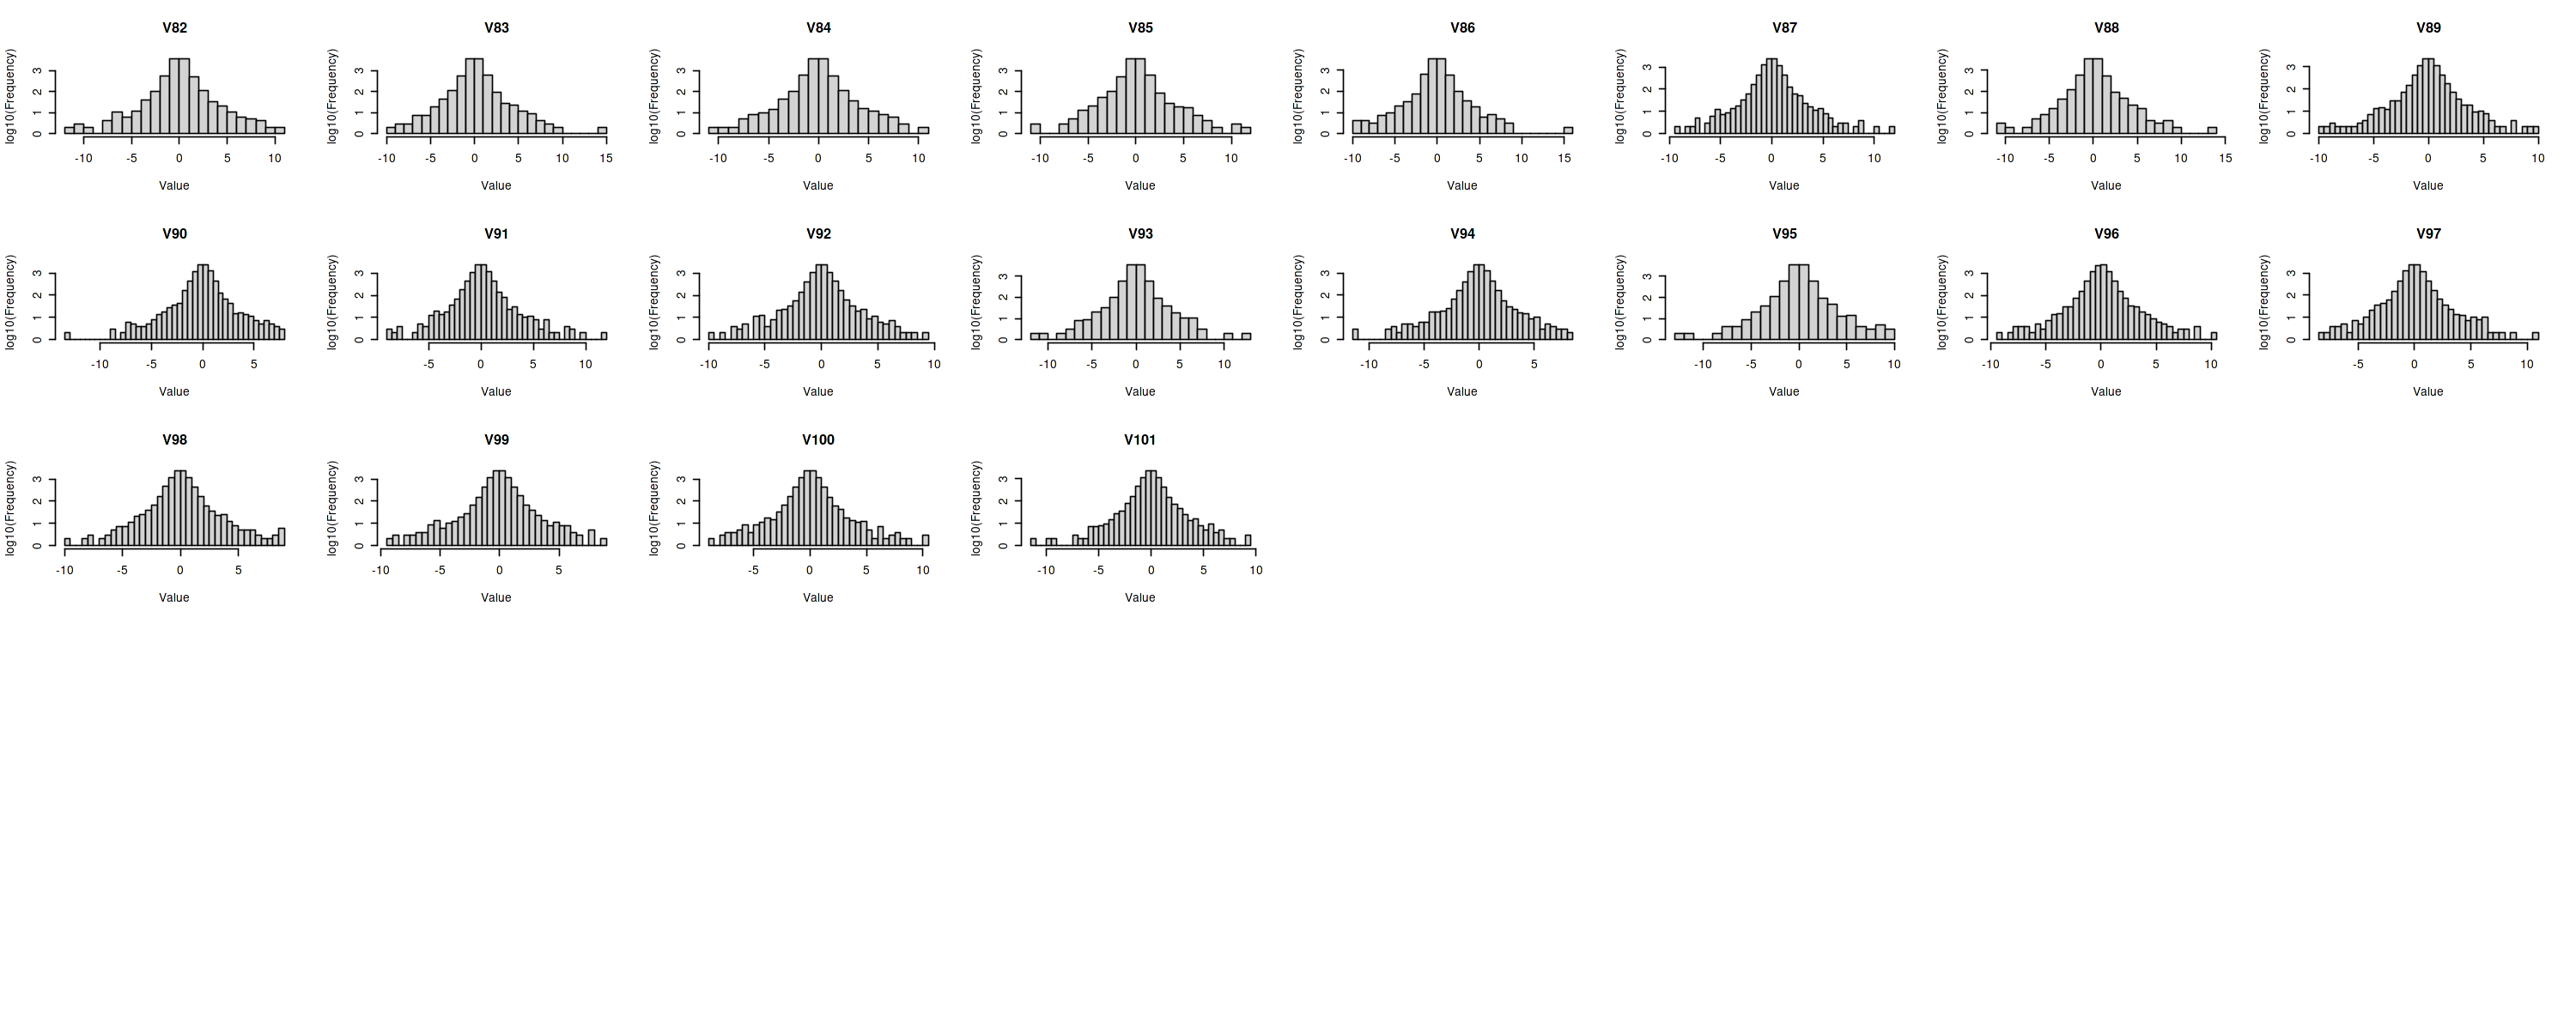

In [18]:
options(repr.plot.width=25, repr.plot.height=10)
# Set up the plotting area to show multiple histograms
par(mfrow = c(5, 8))

# Plot a histogram for each column of the dataframe
for (col in names(x)) {
  hist.data = hist(x[[col]], plot=F, breaks=30)
  hist.data$counts = log10(hist.data$counts+1)

plot(hist.data, ylab='log10(Frequency)', xlab="Value", main = col)
}

## SnapATAC2

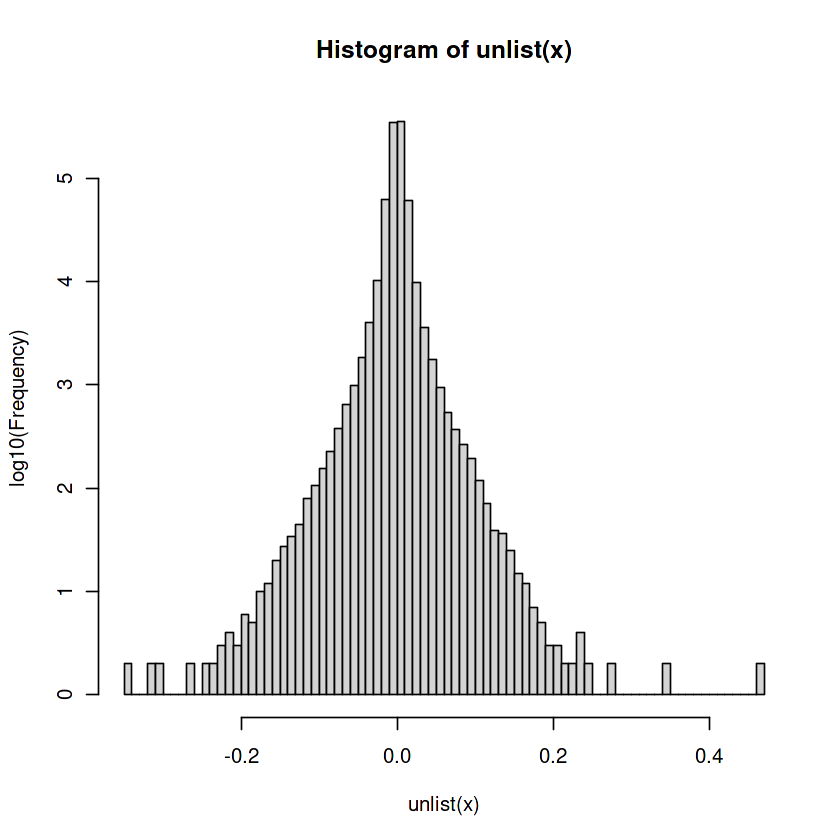

In [19]:
input <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/", dataset, "/feature_engineering/python/SnapATAC2/default/500/jaccard/100.tsv")
x <- read.table(input, sep='\t', row.names=1, comment.char = "")

hist.data = hist(unlist(x), plot=F, breaks=100)
hist.data$counts = log10(hist.data$counts+1)

options(repr.plot.width=7, repr.plot.height=7)
# dev.new(width=4, height=4)
plot(hist.data, ylab='log10(Frequency)')

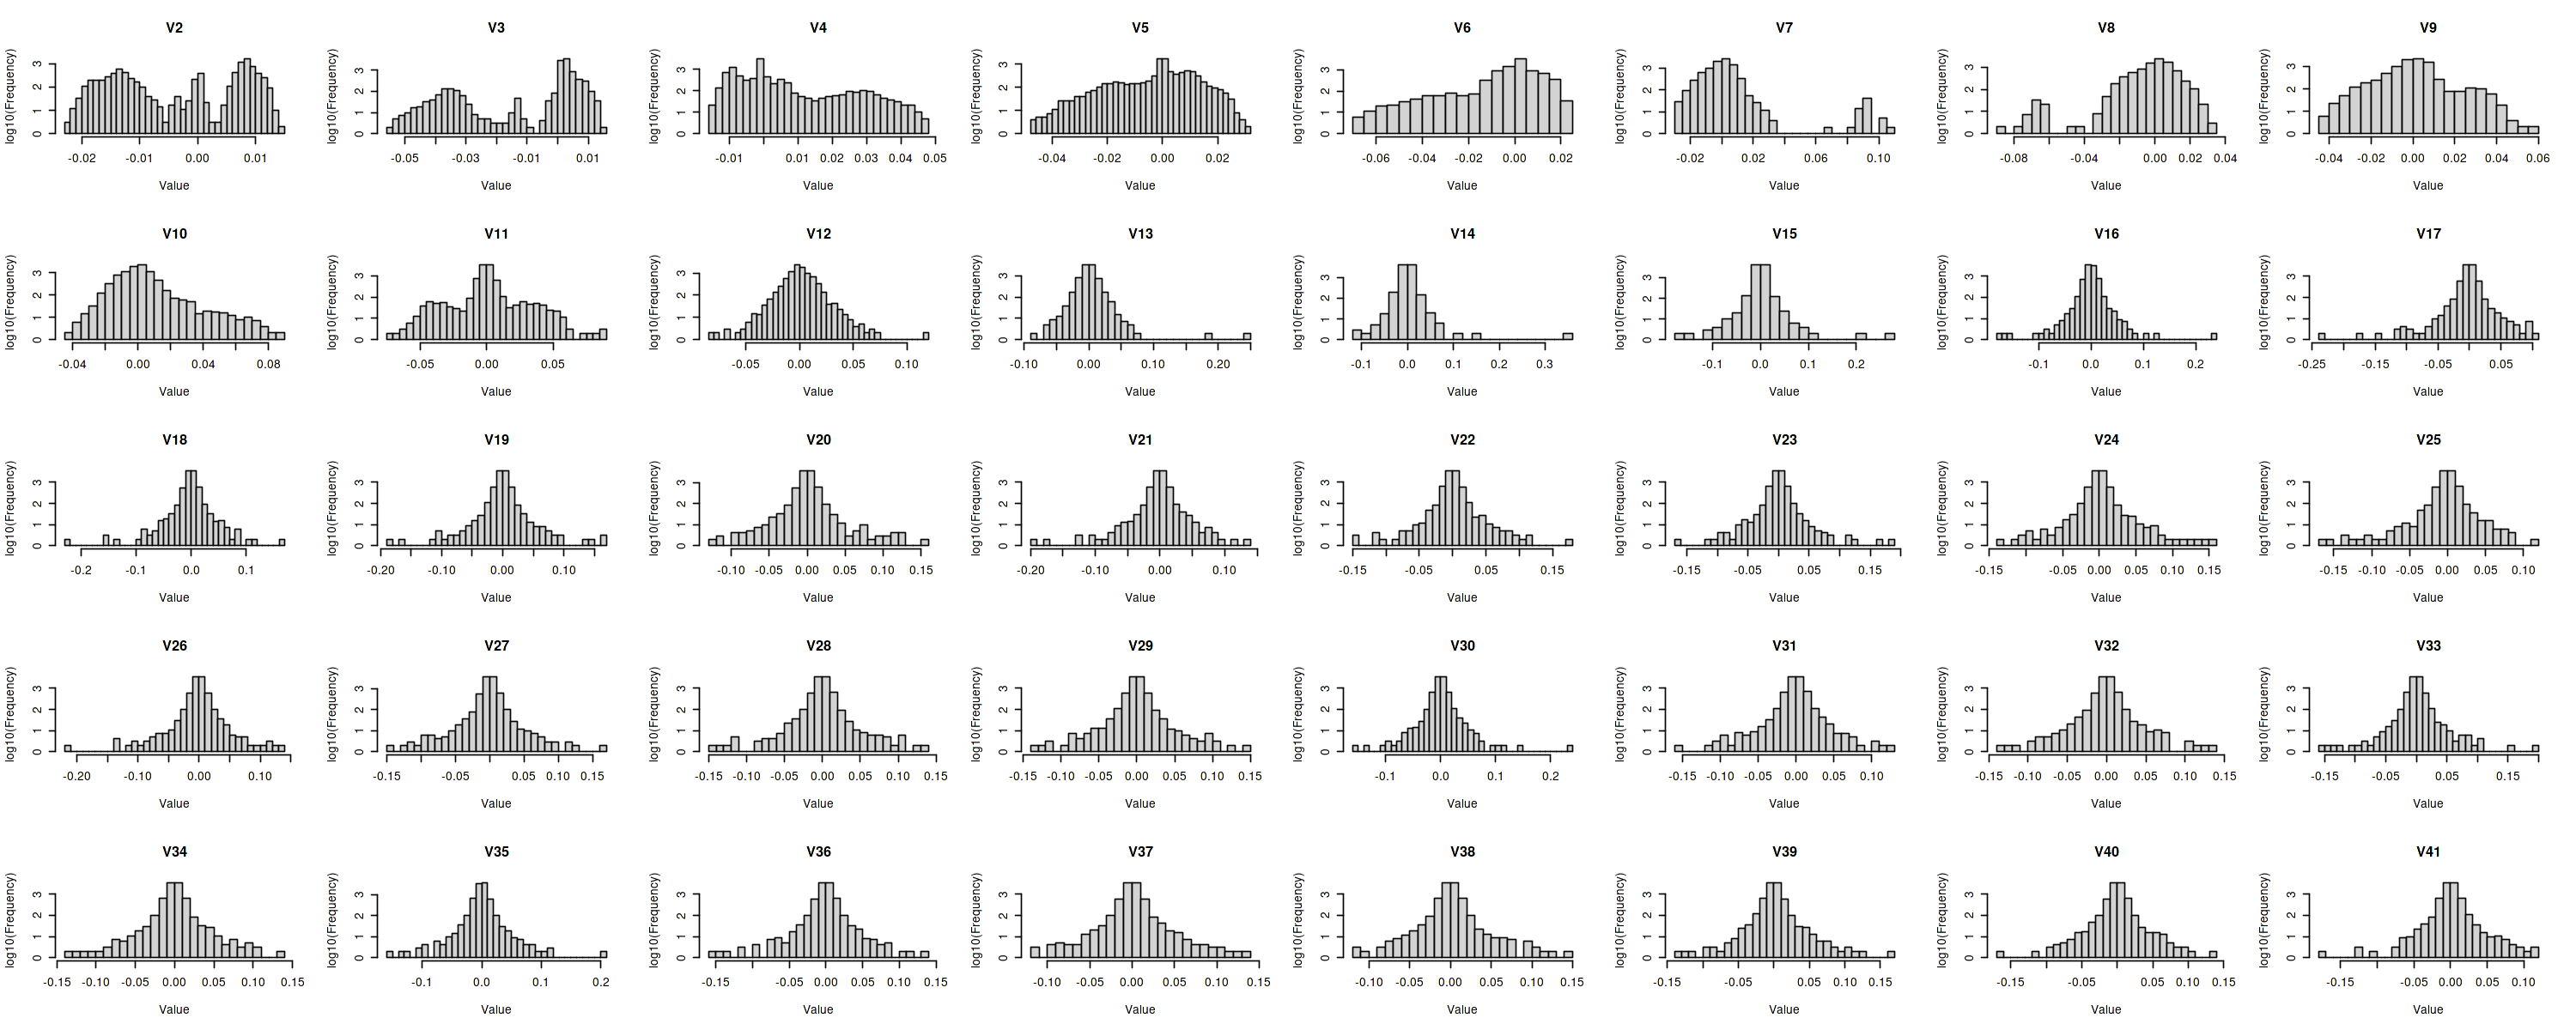

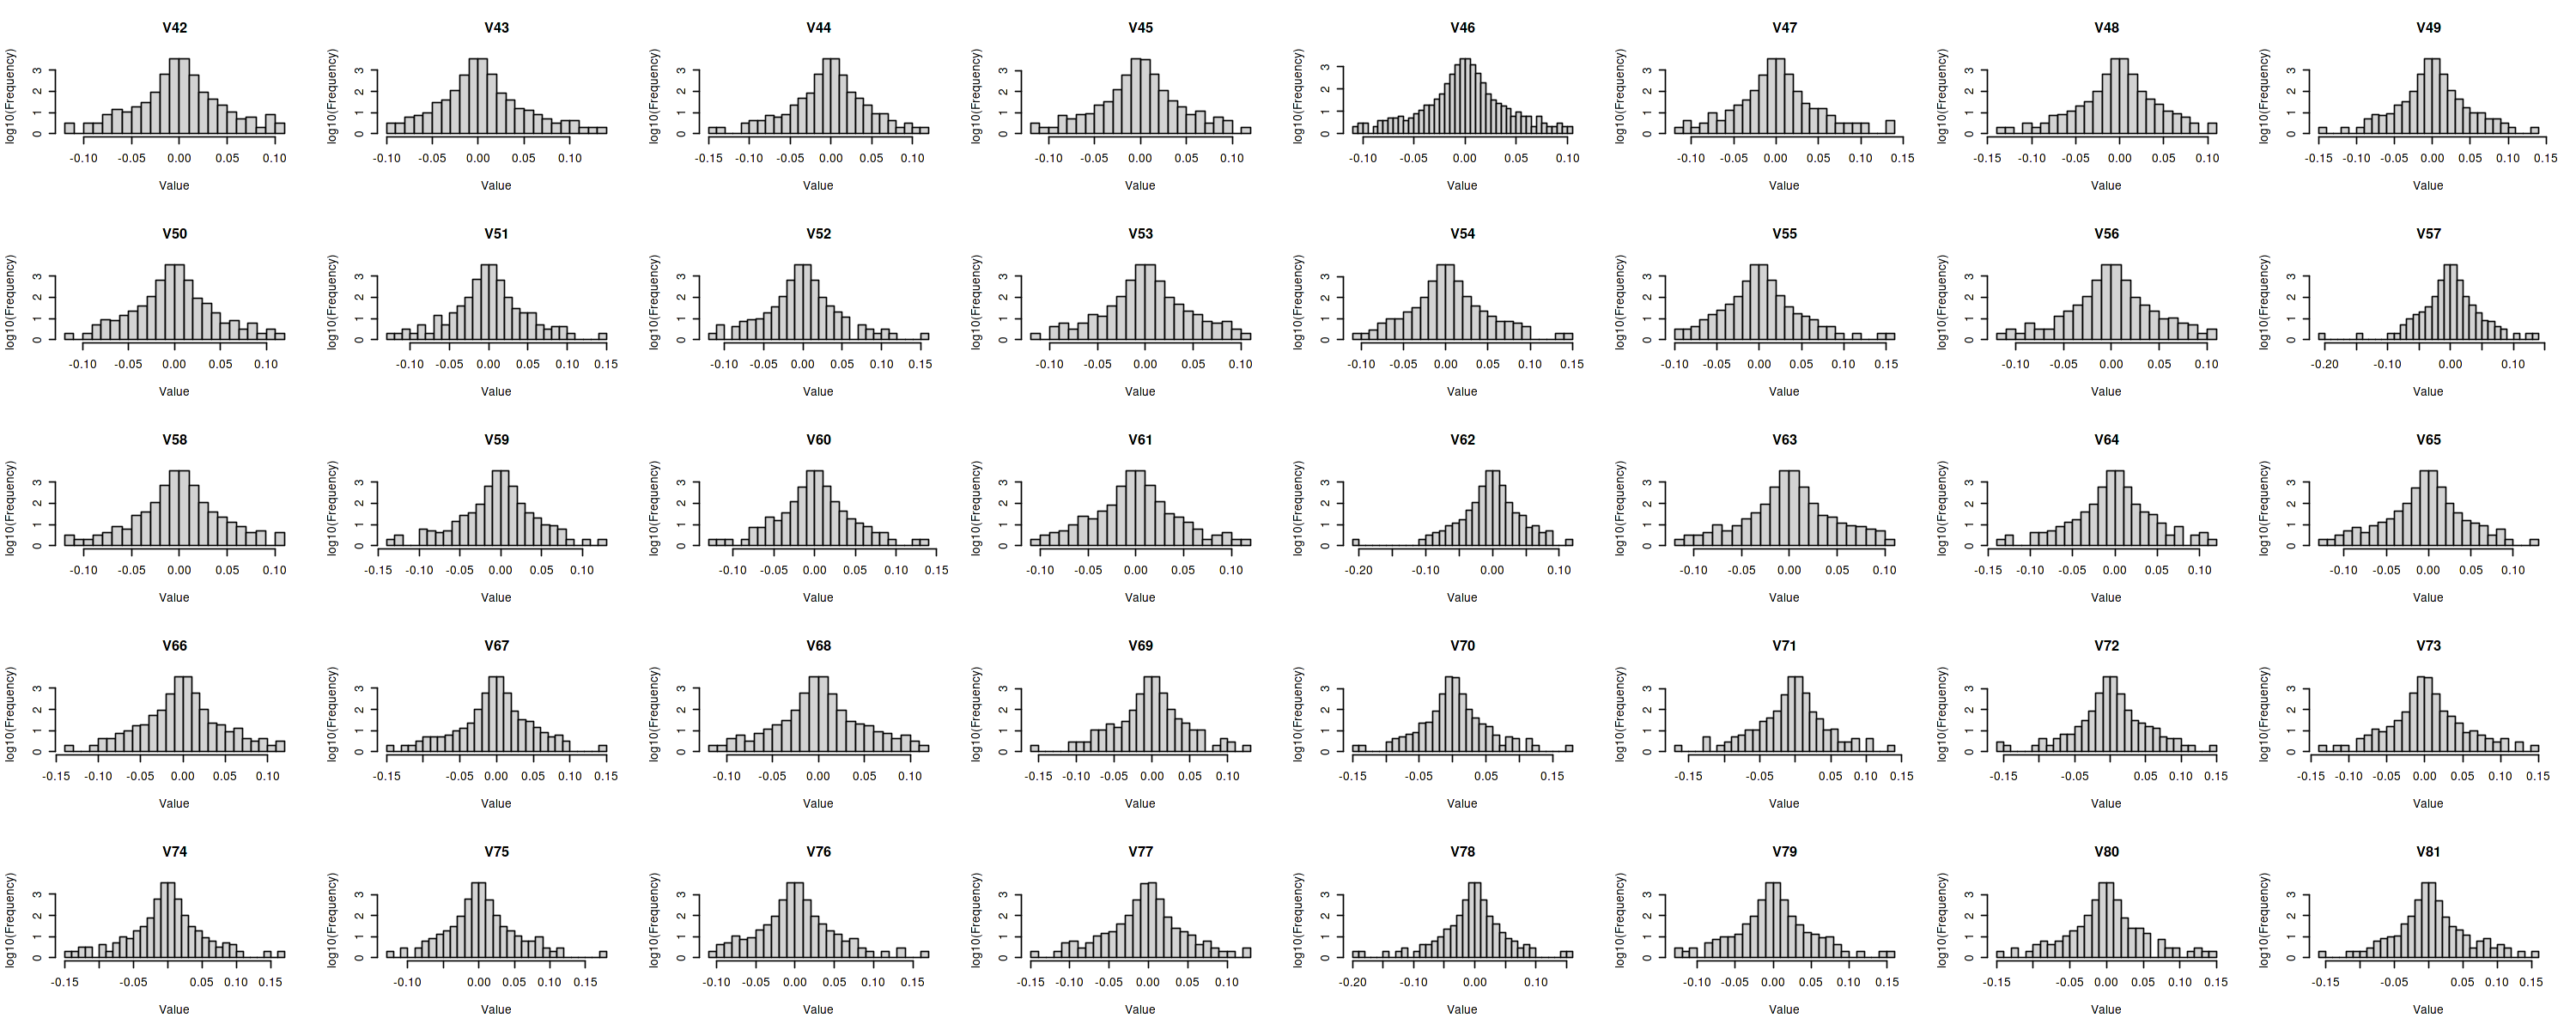

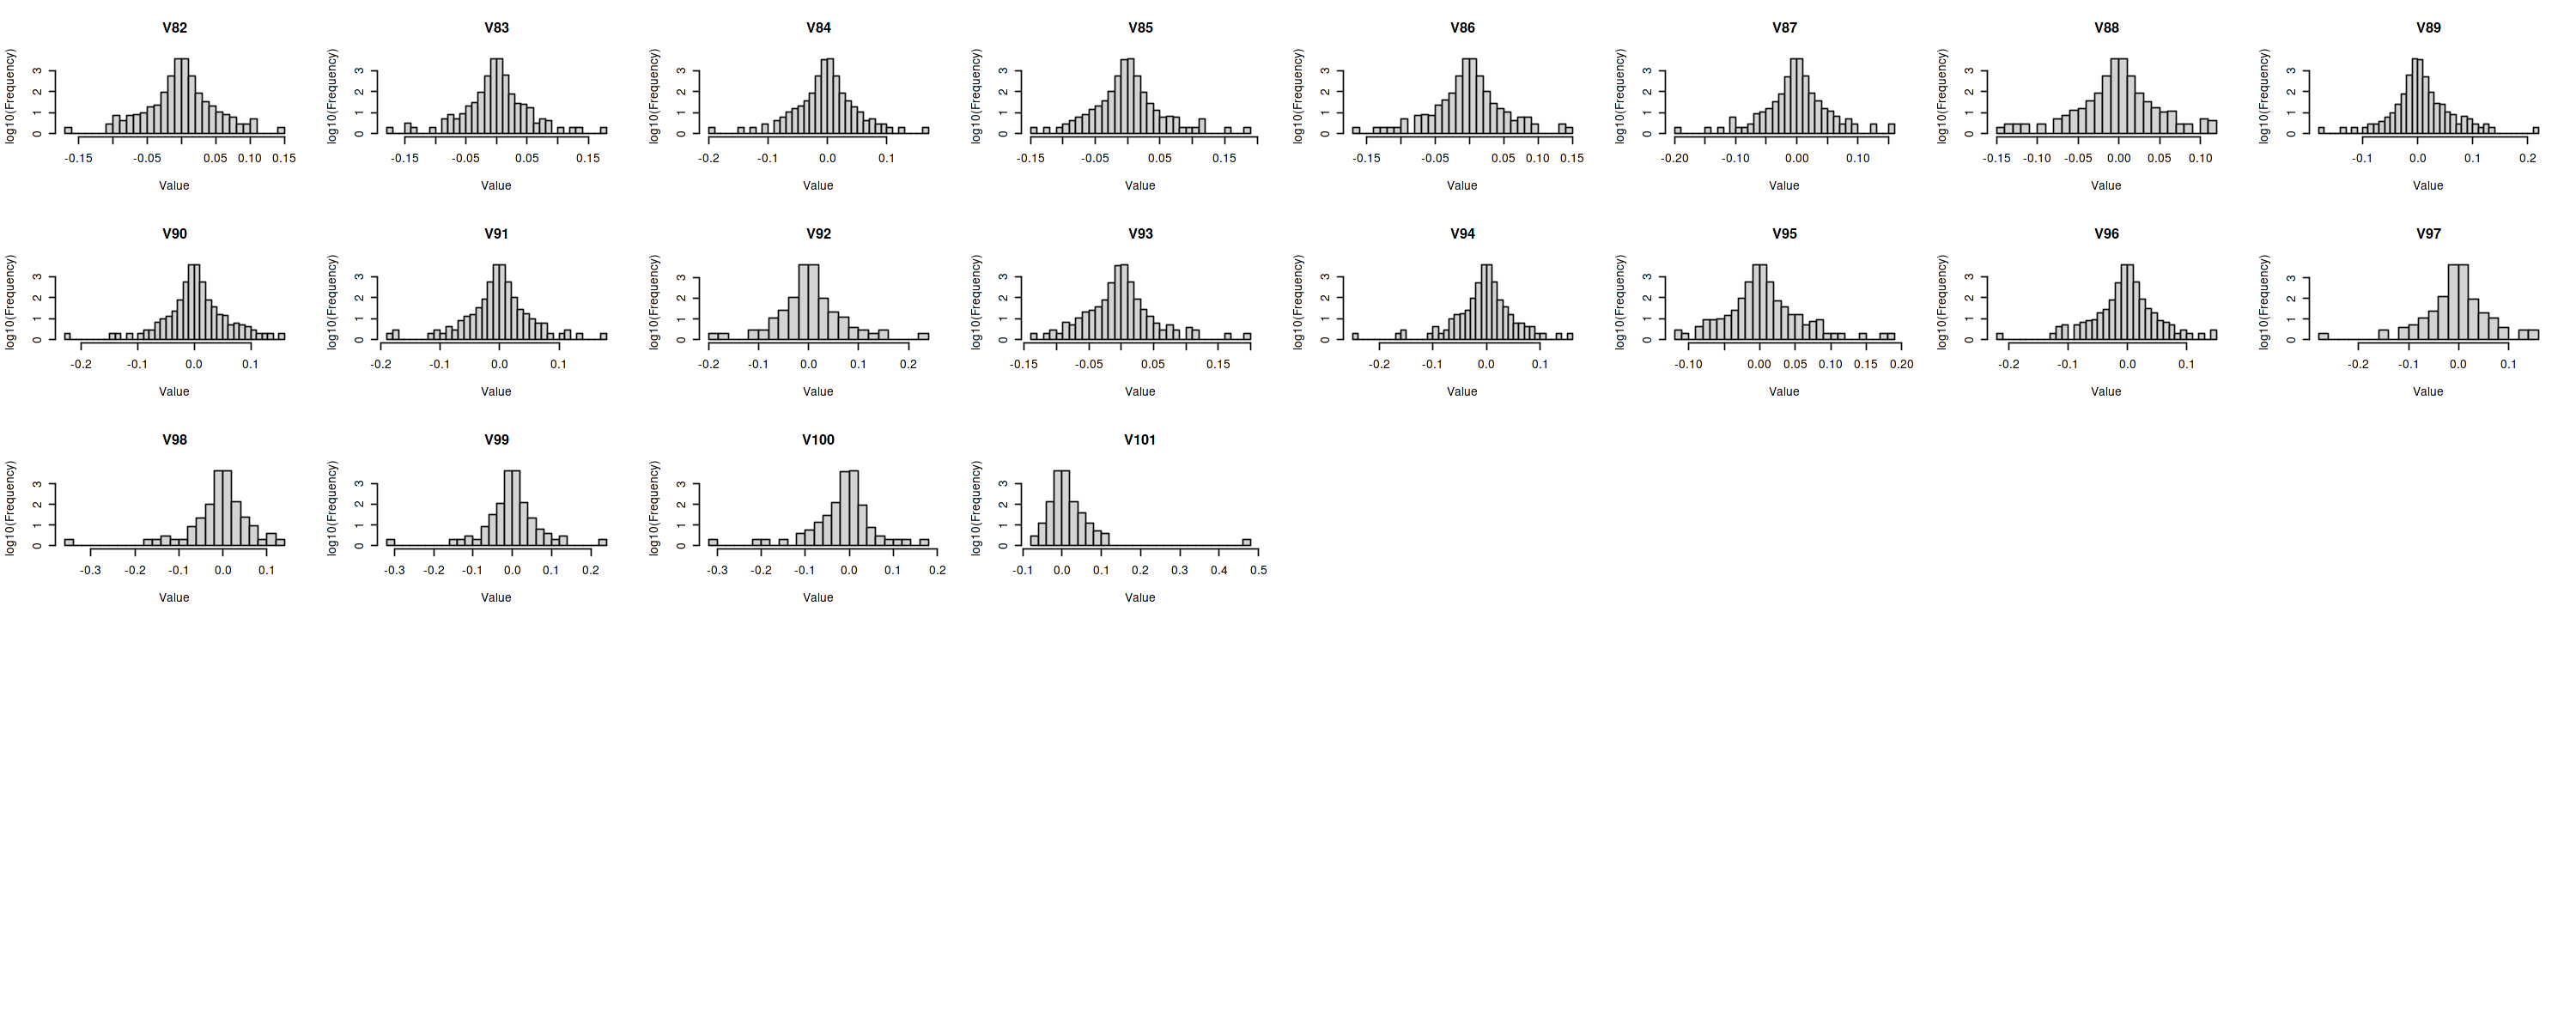

In [20]:
options(repr.plot.width=25, repr.plot.height=10)
# Set up the plotting area to show multiple histograms
par(mfrow = c(5, 8))

# Plot a histogram for each column of the dataframe
for (col in names(x)) {
  hist.data = hist(x[[col]], plot=F, breaks=30)
  hist.data$counts = log10(hist.data$counts+1)

plot(hist.data, ylab='log10(Frequency)', xlab="Value", main = col)
}

# Try Agg method using different features

In [72]:
label_table_file <- "/home/siluo/public/SiyuanLuo/projects/benchmark/cleaned_data/PBMC_multiomics/PBMC_multiomics_RNA_annotation.txt"
barcode_col <- "rna_barcode"
label_col <- "final_label"

In [73]:
dataset <- "PBMC_multiomics"
sobj_file <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/", dataset, "/feature_engineering/R/Signac/by_cluster_peaks/0/default/100.RDS")
sobj <- readRDS(sobj_file)

## 1. Test how feature selection affect Signac result

In [ ]:
embedding_file_Signac <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/", dataset, "/feature_engineering/R/Signac/by_cluster_peaks/0/default/100.tsv")
embedding_file_Signac.Agg.all <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/", dataset, "/feature_engineering/R/aggregation/default/500/default/100.tsv")
# embedding_file_Signac.Agg.sub

In [6]:
sobj

An object of class Seurat 
139896 features across 8560 samples within 1 assay 
Active assay: by_cluster_peaks (139896 features, 133559 variable features)
 1 dimensional reduction calculated: lsi_by_cluster_peaks

In [8]:
FindTopFeatures(sobj, min.cutoff = "q5", assay = "by_cluster_peaks")

An object of class Seurat 
139896 features across 8560 samples within 1 assay 
Active assay: by_cluster_peaks (139896 features, 133559 variable features)
 1 dimensional reduction calculated: lsi_by_cluster_peaks

In [21]:
class(sobj[["by_cluster_peaks"]][])
# head(sobj[["by_cluster_peaks"]][])

[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

In [ ]:
# feature_matrix <- GetAssayData(sobj[["by_cluster_peaks"]], slot = "counts") # feature-by-cell matrix! 
# Is this normalized matrix? No, the slot "counts" are raw counts, the slot "data" are normalized data (if any normalization has been applied)
# feature_matrix <- t(feature_matrix)
# agg_feature_matrix <- aggregate_features(feature_matrix, dims=seq(2L, 12L), n_meta_features=1000, n_cells=2000, 
# norm_function=Signac::RunTFIDF, reduce="pca") 
# write.table(agg_feature_matrix, file = "Signac.Agg.sub.tsv", sep = "\t", quote = FALSE, col.names = FALSE)

## 2. Use Agg+Tile vs gene score in ArchR

In [4]:
suppressPackageStartupMessages({library(ArchR)})
addArchRGenome("hg38")
addArchRThreads(threads = 10)

dir <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/", dataset, "/feature_engineering/R/ArchR/tiles/500/default/")
setwd(dir)

proj <- loadArchRProject(path = "proj", force = FALSE, showLogo = FALSE)
getAvailableMatrices(proj)


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

[1] "GeneScoreMatrix" "TileMatrix"

In [23]:
## Add gene score matrix
# proj <- addGeneScoreMatrix(proj)
# getAvailableMatrices(proj)
gene_obj <- getMatrixFromProject(proj, useMatrix = "GeneScoreMatrix", binarize = TRUE)
gene_mx <- assay(gene_obj, "GeneScoreMatrix", withDimnames=TRUE)
saveRDS(gene_mx, "GeneScoreMatrix.RDS")

ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-fa7ba3099da59-Date-2023-04-27_Time-13-58-37.log
If there is an issue, please report to github with logFile!

2023-04-27 13:59:13 : Organizing colData, 0.591 mins elapsed.

2023-04-27 13:59:13 : Organizing rowData, 0.591 mins elapsed.

2023-04-27 13:59:13 : Organizing rowRanges, 0.591 mins elapsed.

2023-04-27 13:59:13 : Organizing Assays (1 of 1), 0.591 mins elapsed.

2023-04-27 13:59:13 : Constructing SummarizedExperiment, 0.591 mins elapsed.

2023-04-27 13:59:15 : Finished Matrix Creation, 0.636 mins elapsed.



### Tile matrix + agg

In [ ]:
tile_obj <- getMatrixFromProject(proj, useMatrix = "TileMatrix", binarize = TRUE)
tile_obj
tile_mx <- assay(tile_obj, "TileMatrix", withDimnames=TRUE)
class(tile_mx)

In [ ]:
saveRDS(tile_mx, "TileMatrix.RDS")

In [45]:
tile_mx <- readRDS("TileMatrix.RDS")
dim(tile_mx)

[1] 6062095    8560

In [46]:
min.cutoff <- 20
hvf.info <- FindTopFeatures(object = tile_mx, min.cutoff = min.cutoff)
# percentile.use <- as.numeric(x = sub(pattern = "q", replacement = "", x = as.character(x = min.cutoff))) / 100
variable.features <- rownames(hvf.info[hvf.info$count > min.cutoff, ]) # count is cell count
dim(hvf.info)
length(variable.features)

[1] 6062095       2

[1] 929287

In [47]:
tile_mx_sub <- tile_mx[as.numeric(variable.features),]

In [48]:
agg_counts <- scDblFinder:::aggregateFeatures(
        tile_mx_sub,
        dims.use = seq(2L, 12L),
        k = 1000,
        num_init = 3,
        use.subset = 2000,
        norm.fn = Signac::RunTFIDF, 
        twoPass=TRUE)

Performing TF-IDF normalization

Second iteration...

Performing TF-IDF normalization



In [49]:
saveRDS(agg_counts, "ArchR.Tile.sub.Agg.RDS")

In [ ]:
# agg_counts <- scDblFinder:::aggregateFeatures(
#         tile_mx,
#         dims.use = seq(2L, 12L),
#         k = 1000,
#         num_init = 3,
#         use.subset = 2000,
#         norm.fn = Signac::RunTFIDF, 
#         twoPass=FALSE)
# saveRDS(agg_counts, "agg_counts_from_tiles.RDS")

In [50]:
agg_counts <- readRDS("ArchR.Tile.sub.Agg.RDS")

In [51]:
# create sce object
sce <- SingleCellExperiment(list(counts=agg_counts))
# normalize the meta-features
sce <- scuttle::logNormCounts(sce)

pca <- scater::runPCA(t(logcounts(sce)), center=TRUE, scale=TRUE, rank=100)
Fmat <- as.matrix(pca$x)

In [52]:
write.table(Fmat, file = "ArchR.Tile.sub.Agg.pca.tsv", sep = "\t", quote = FALSE, col.names = FALSE)

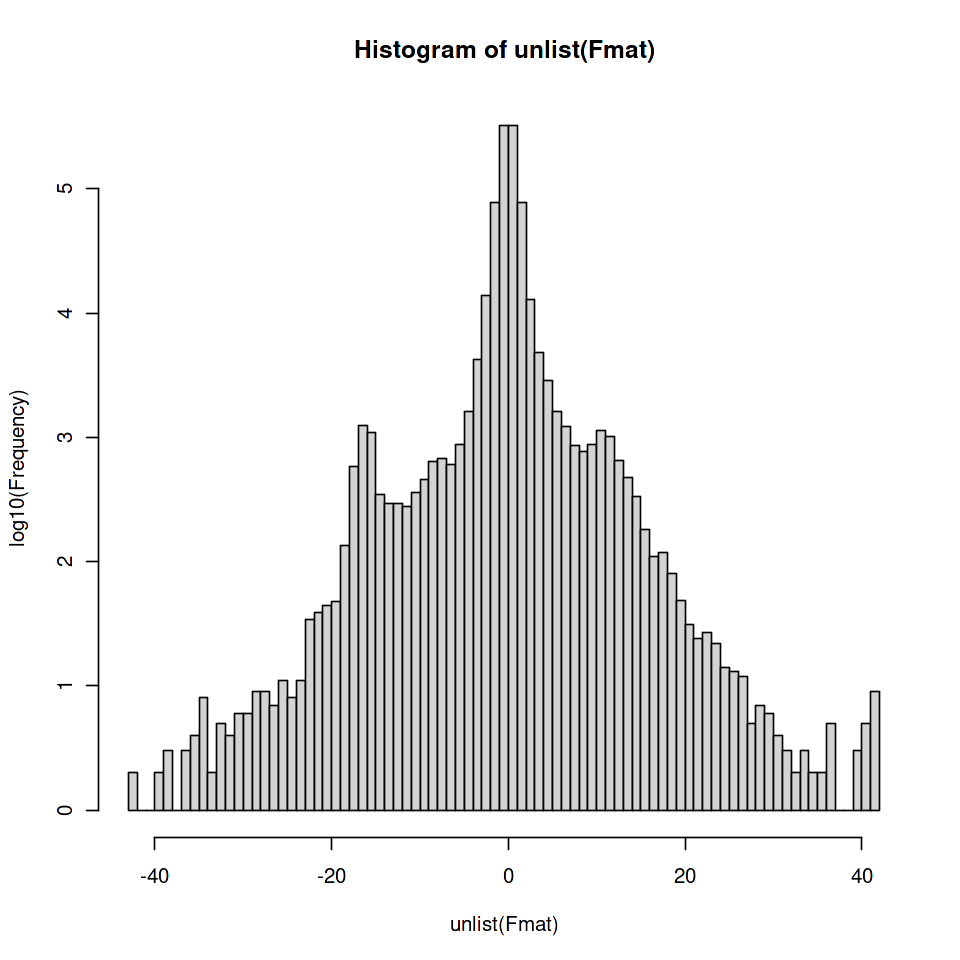

In [53]:
hist.data = hist(unlist(Fmat), plot=F, breaks=100)
hist.data$counts = log10(hist.data$counts+1)

# dev.new(width=4, height=4)
plot(hist.data, ylab='log10(Frequency)')

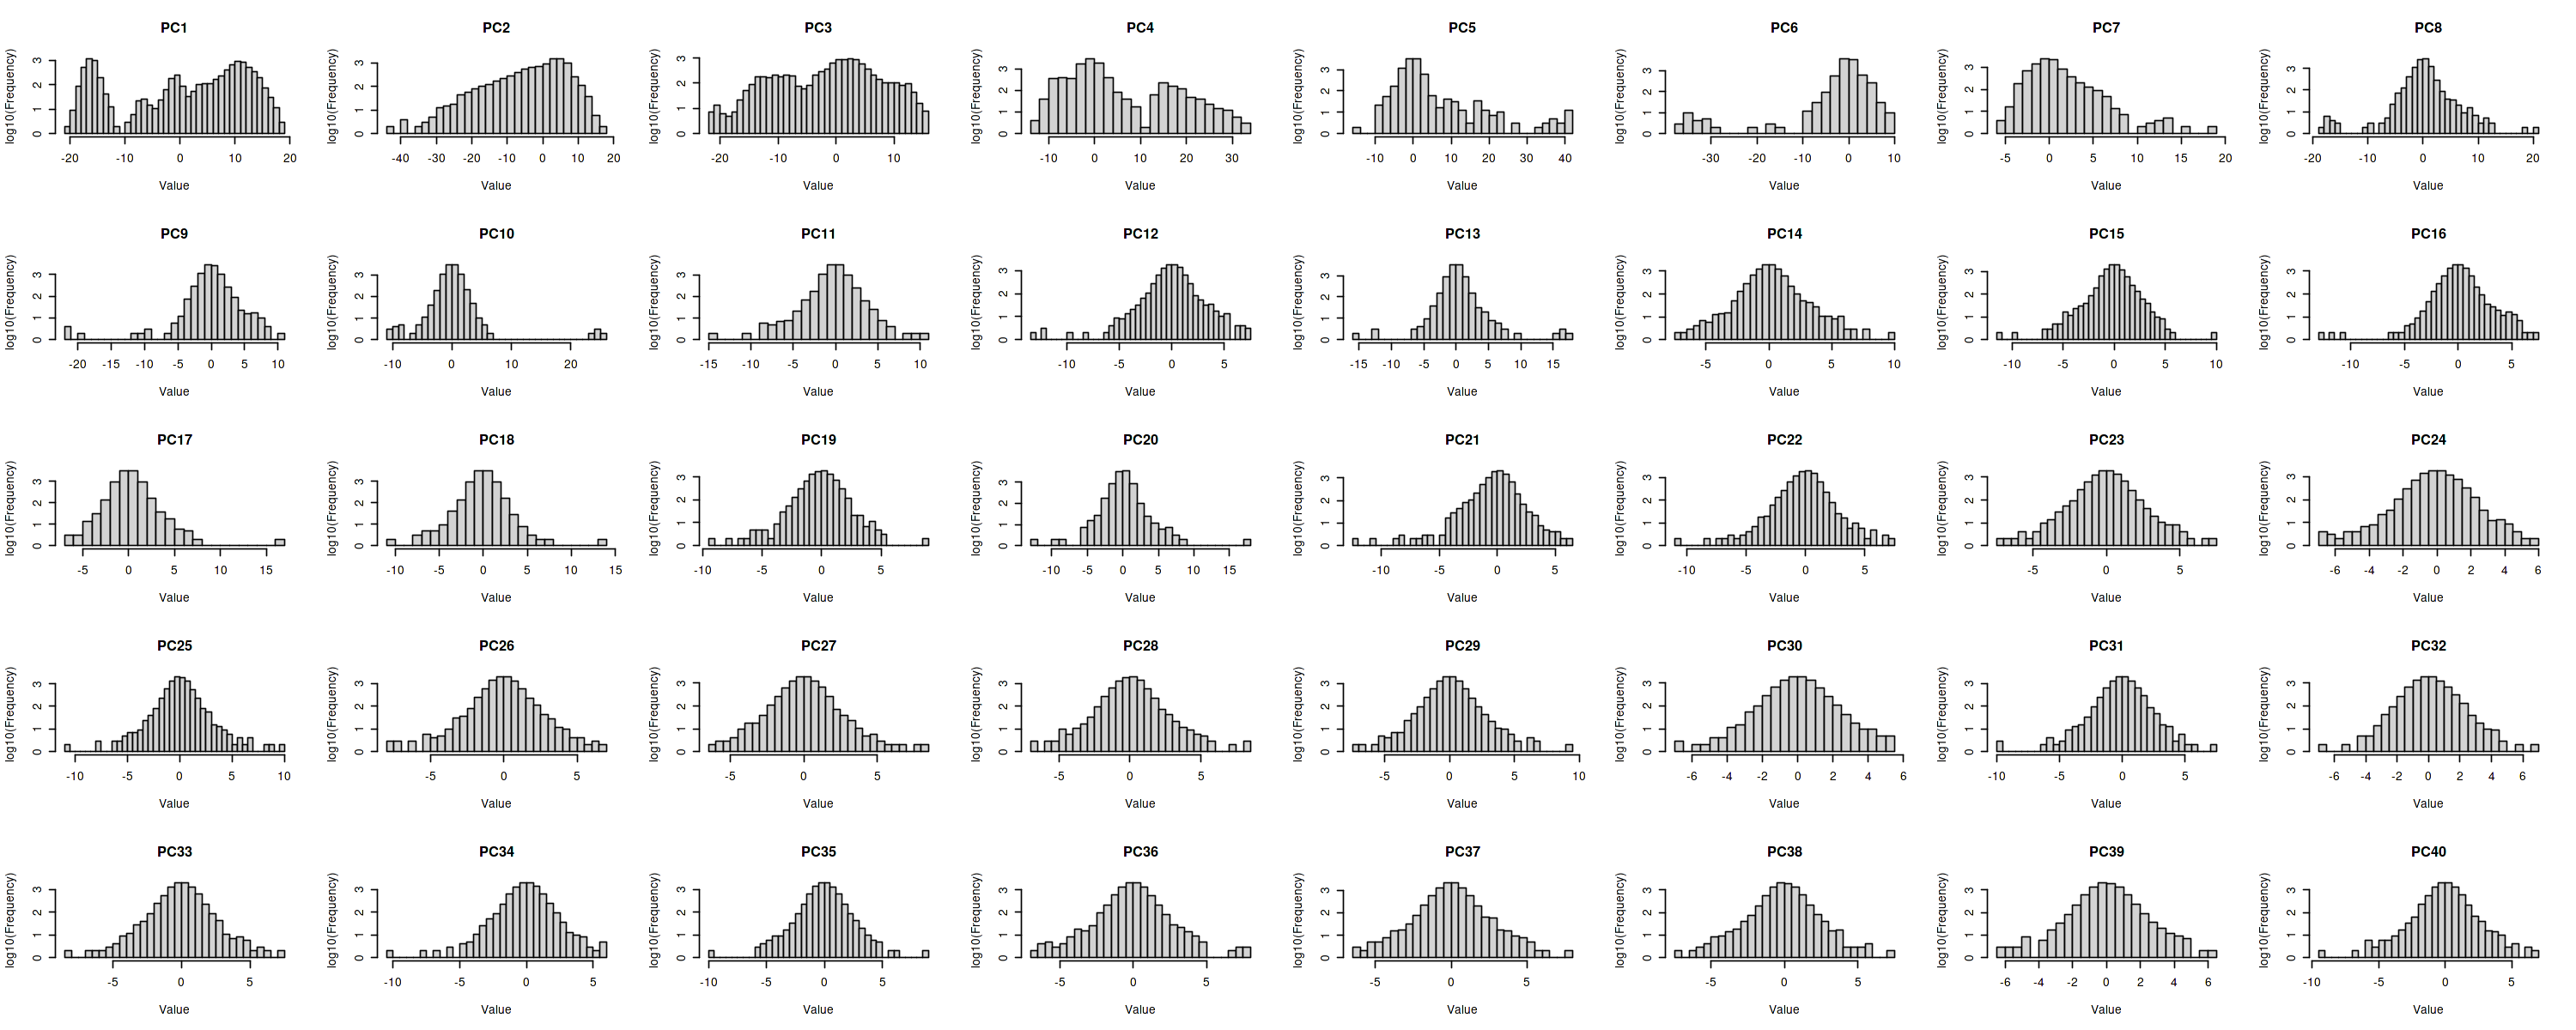

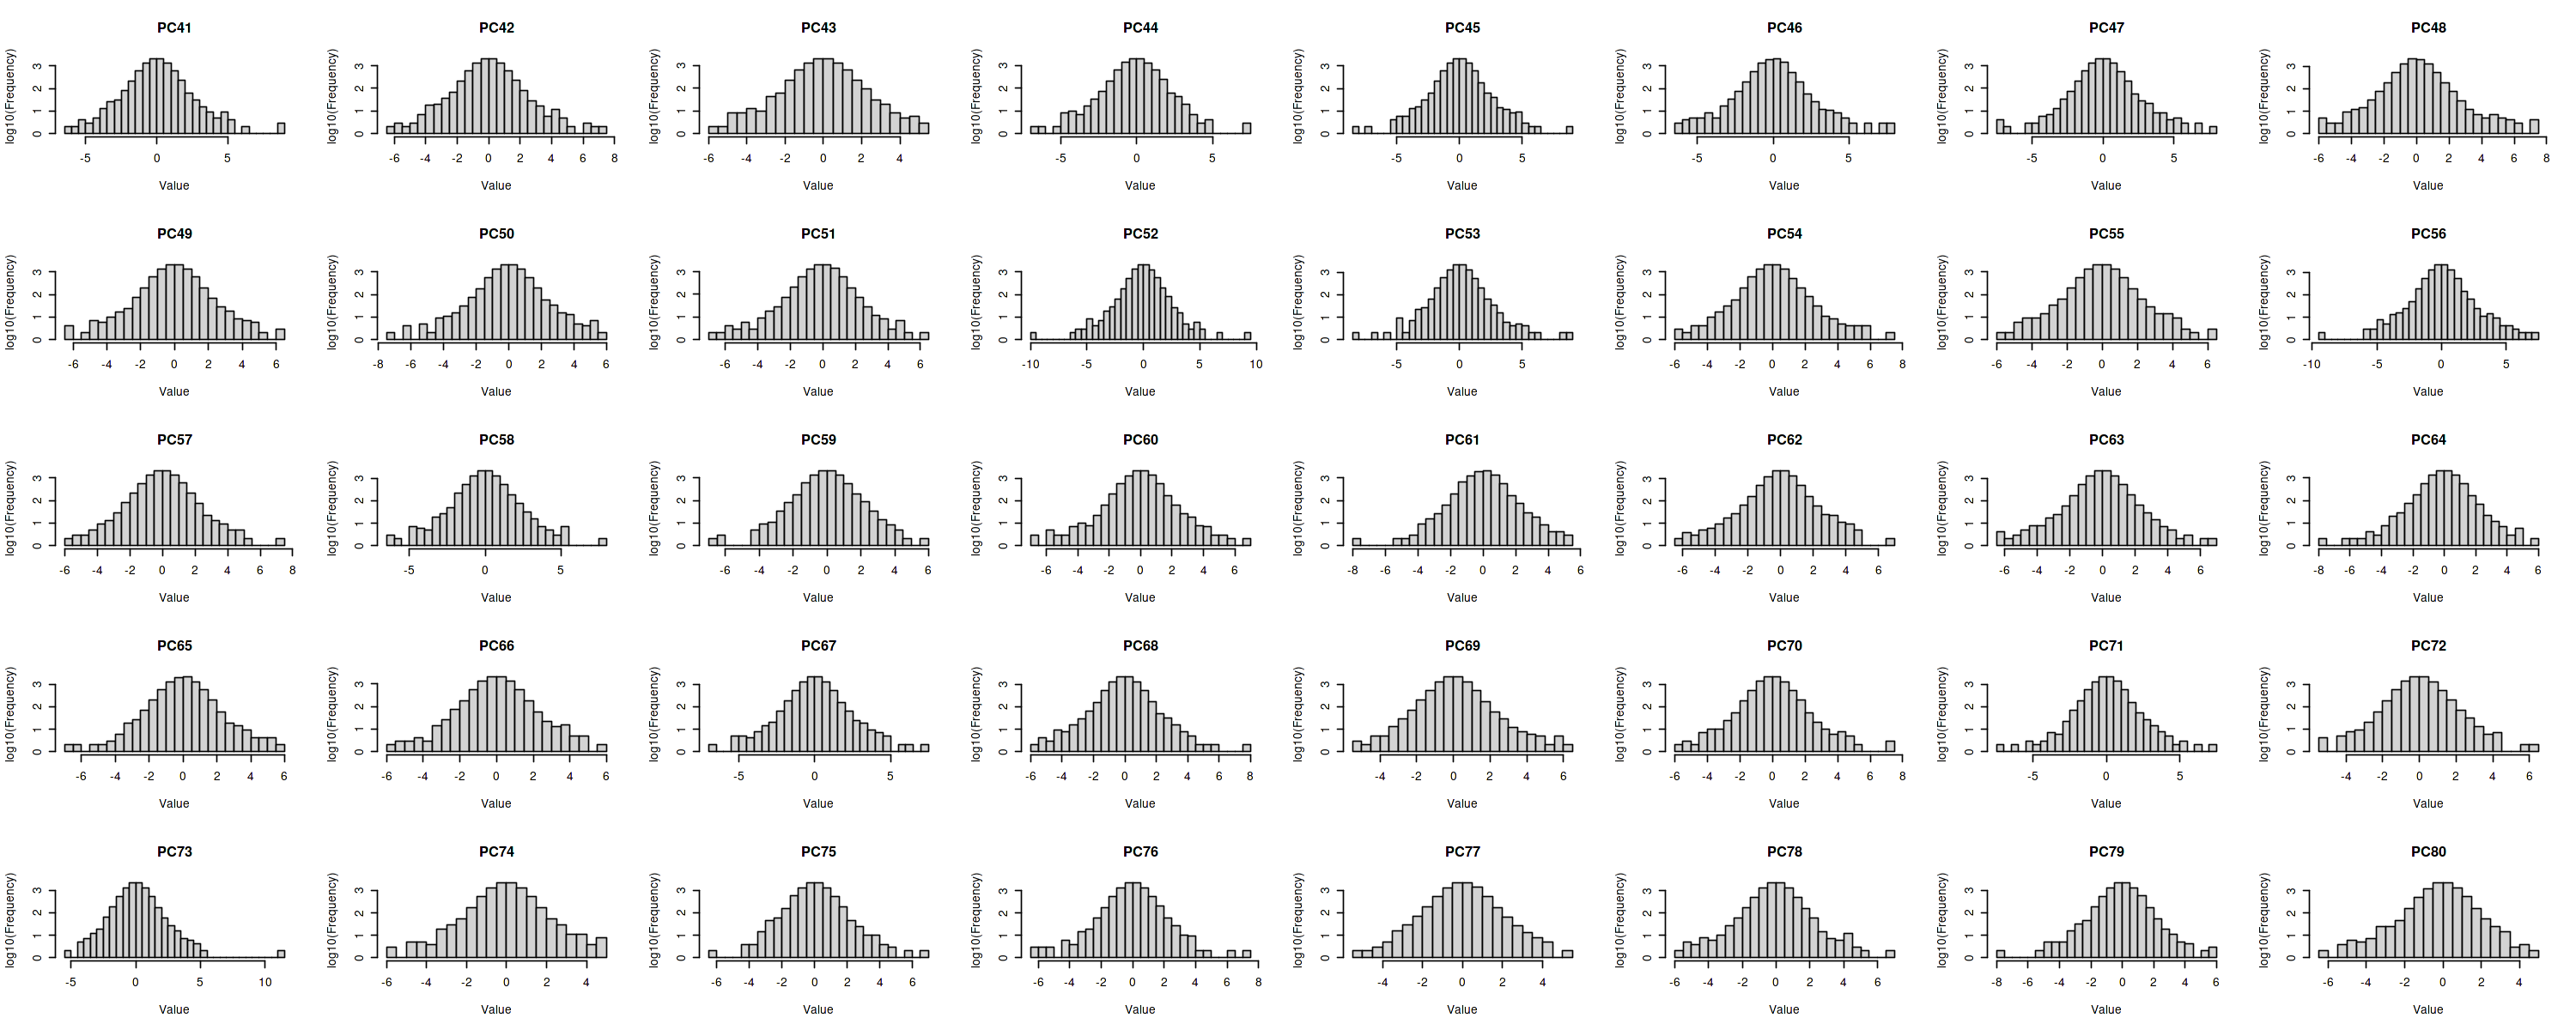

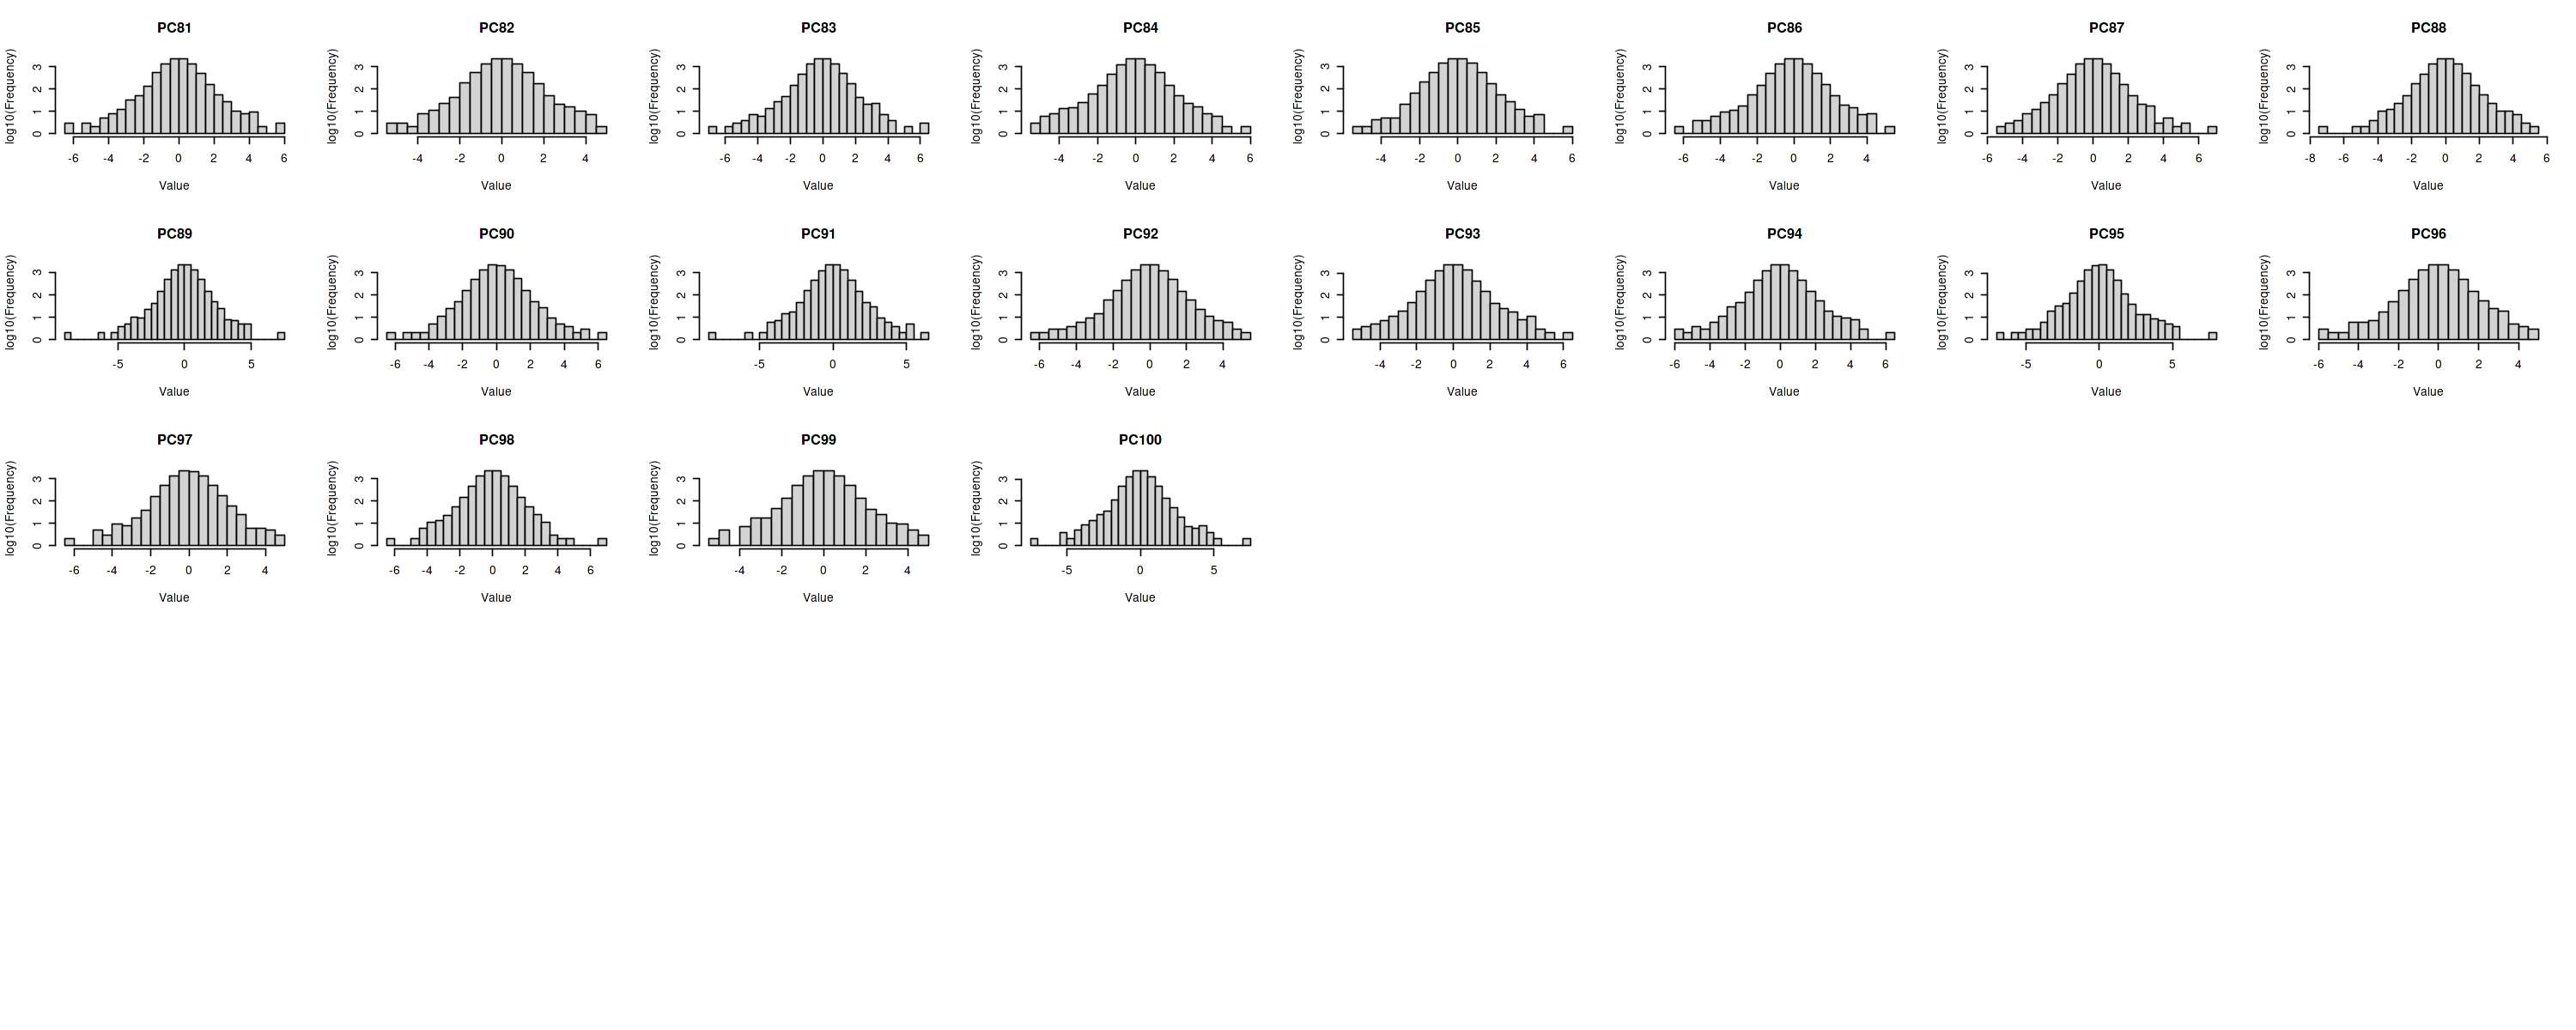

In [55]:
agg_df <- DataFrame(Fmat)
options(repr.plot.width=25, repr.plot.height=10)
# Set up the plotting area to show multiple histograms
par(mfrow = c(5, 8))

# Plot a histogram for each column of the dataframe
for (col in names(agg_df)[1:100]) {
  hist.data = hist(agg_df[[col]], plot=F, breaks=30)
  hist.data$counts = log10(hist.data$counts+1)

plot(hist.data, ylab='log10(Frequency)', xlab="Value", main = col)
}

### Gene score

In [54]:
gene_mx <- readRDS("GeneScoreMatrix.RDS")

In [56]:
dim(gene_mx)

[1] 24919  8560

#### Gene score + agg + pca

In [57]:
agg_counts <- scDblFinder:::aggregateFeatures(
        gene_mx,
        dims.use = seq(2L, 12L),
        k = 1000,
        num_init = 3,
        use.subset = 2000,
        norm.fn = Signac::RunTFIDF, 
        twoPass=TRUE)
saveRDS(agg_counts, "ArchR.Gene.Agg.RDS")

Performing TF-IDF normalization

Second iteration...

Performing TF-IDF normalization



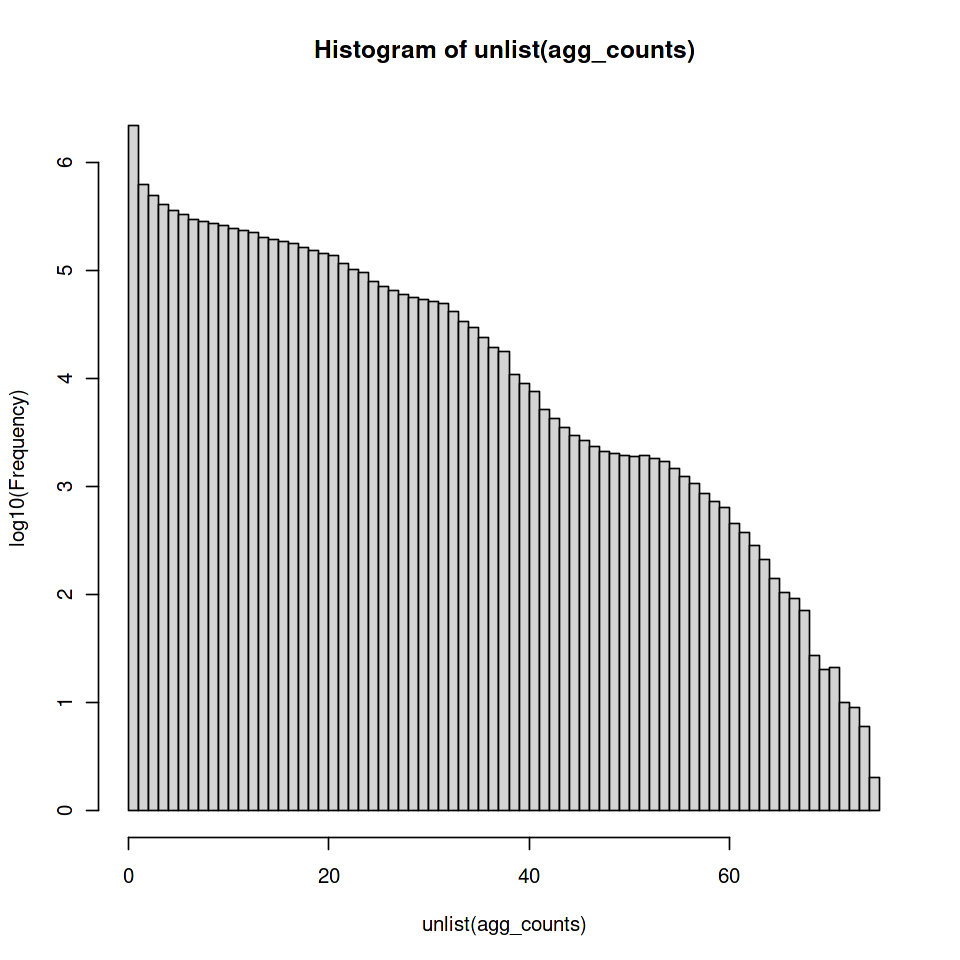

In [92]:
agg_counts <- readRDS("ArchR.Gene.Agg.RDS")
options(repr.plot.width=8, repr.plot.height=8)
hist.data = hist(unlist(agg_counts), plot=F, breaks=100)
hist.data$counts = log10(hist.data$counts+1)

# dev.new(width=4, height=4)
plot(hist.data, ylab='log10(Frequency)')

In [93]:
# create sce object
sce <- SingleCellExperiment(list(counts=agg_counts))
# normalize the meta-features
sce <- scuttle::logNormCounts(sce)

pca <- scater::runPCA(t(logcounts(sce)), center=TRUE, scale=TRUE, rank=100)
Fmat <- as.matrix(pca$x)

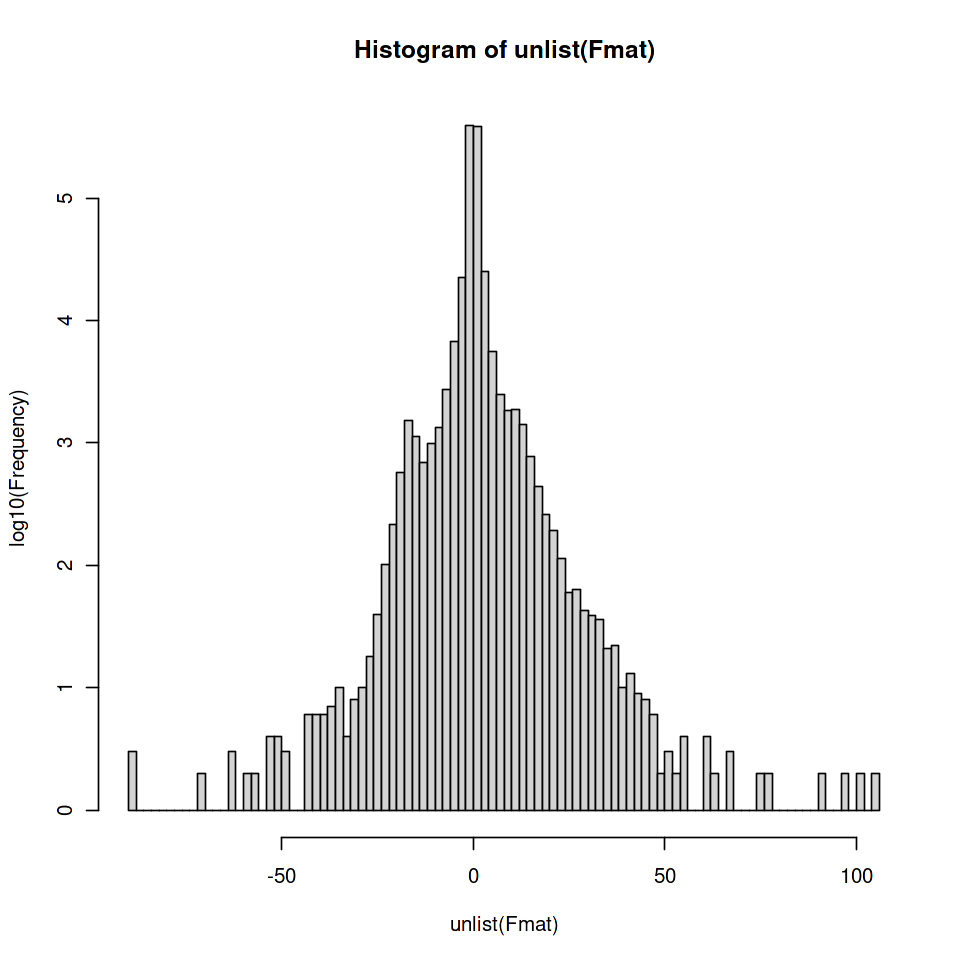

In [94]:
options(repr.plot.width=8, repr.plot.height=8)
hist.data = hist(unlist(Fmat), plot=F, breaks=100)
hist.data$counts = log10(hist.data$counts+1)

# dev.new(width=4, height=4)
plot(hist.data, ylab='log10(Frequency)')

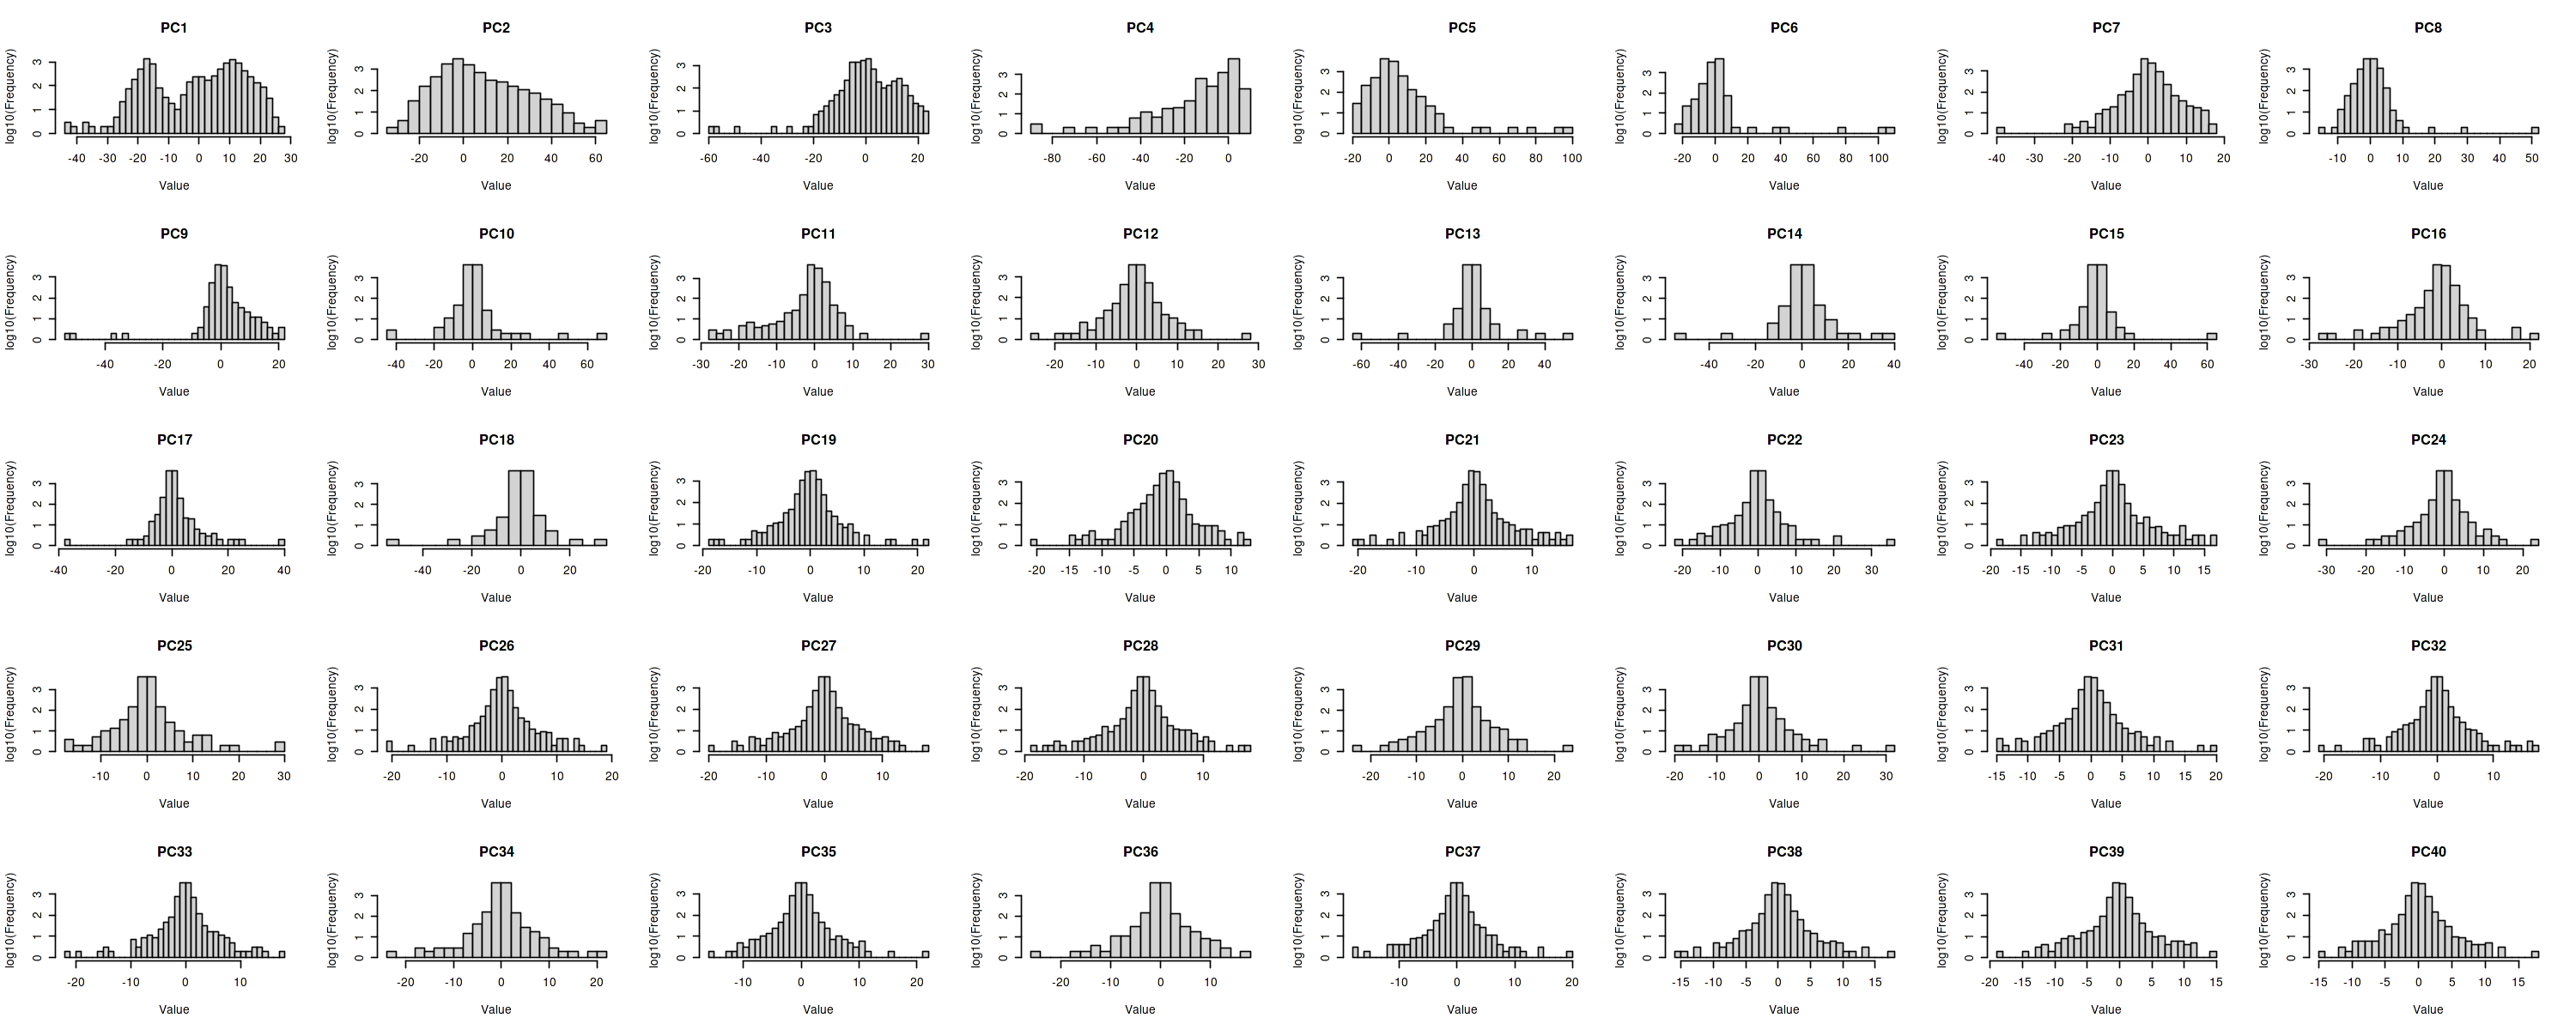

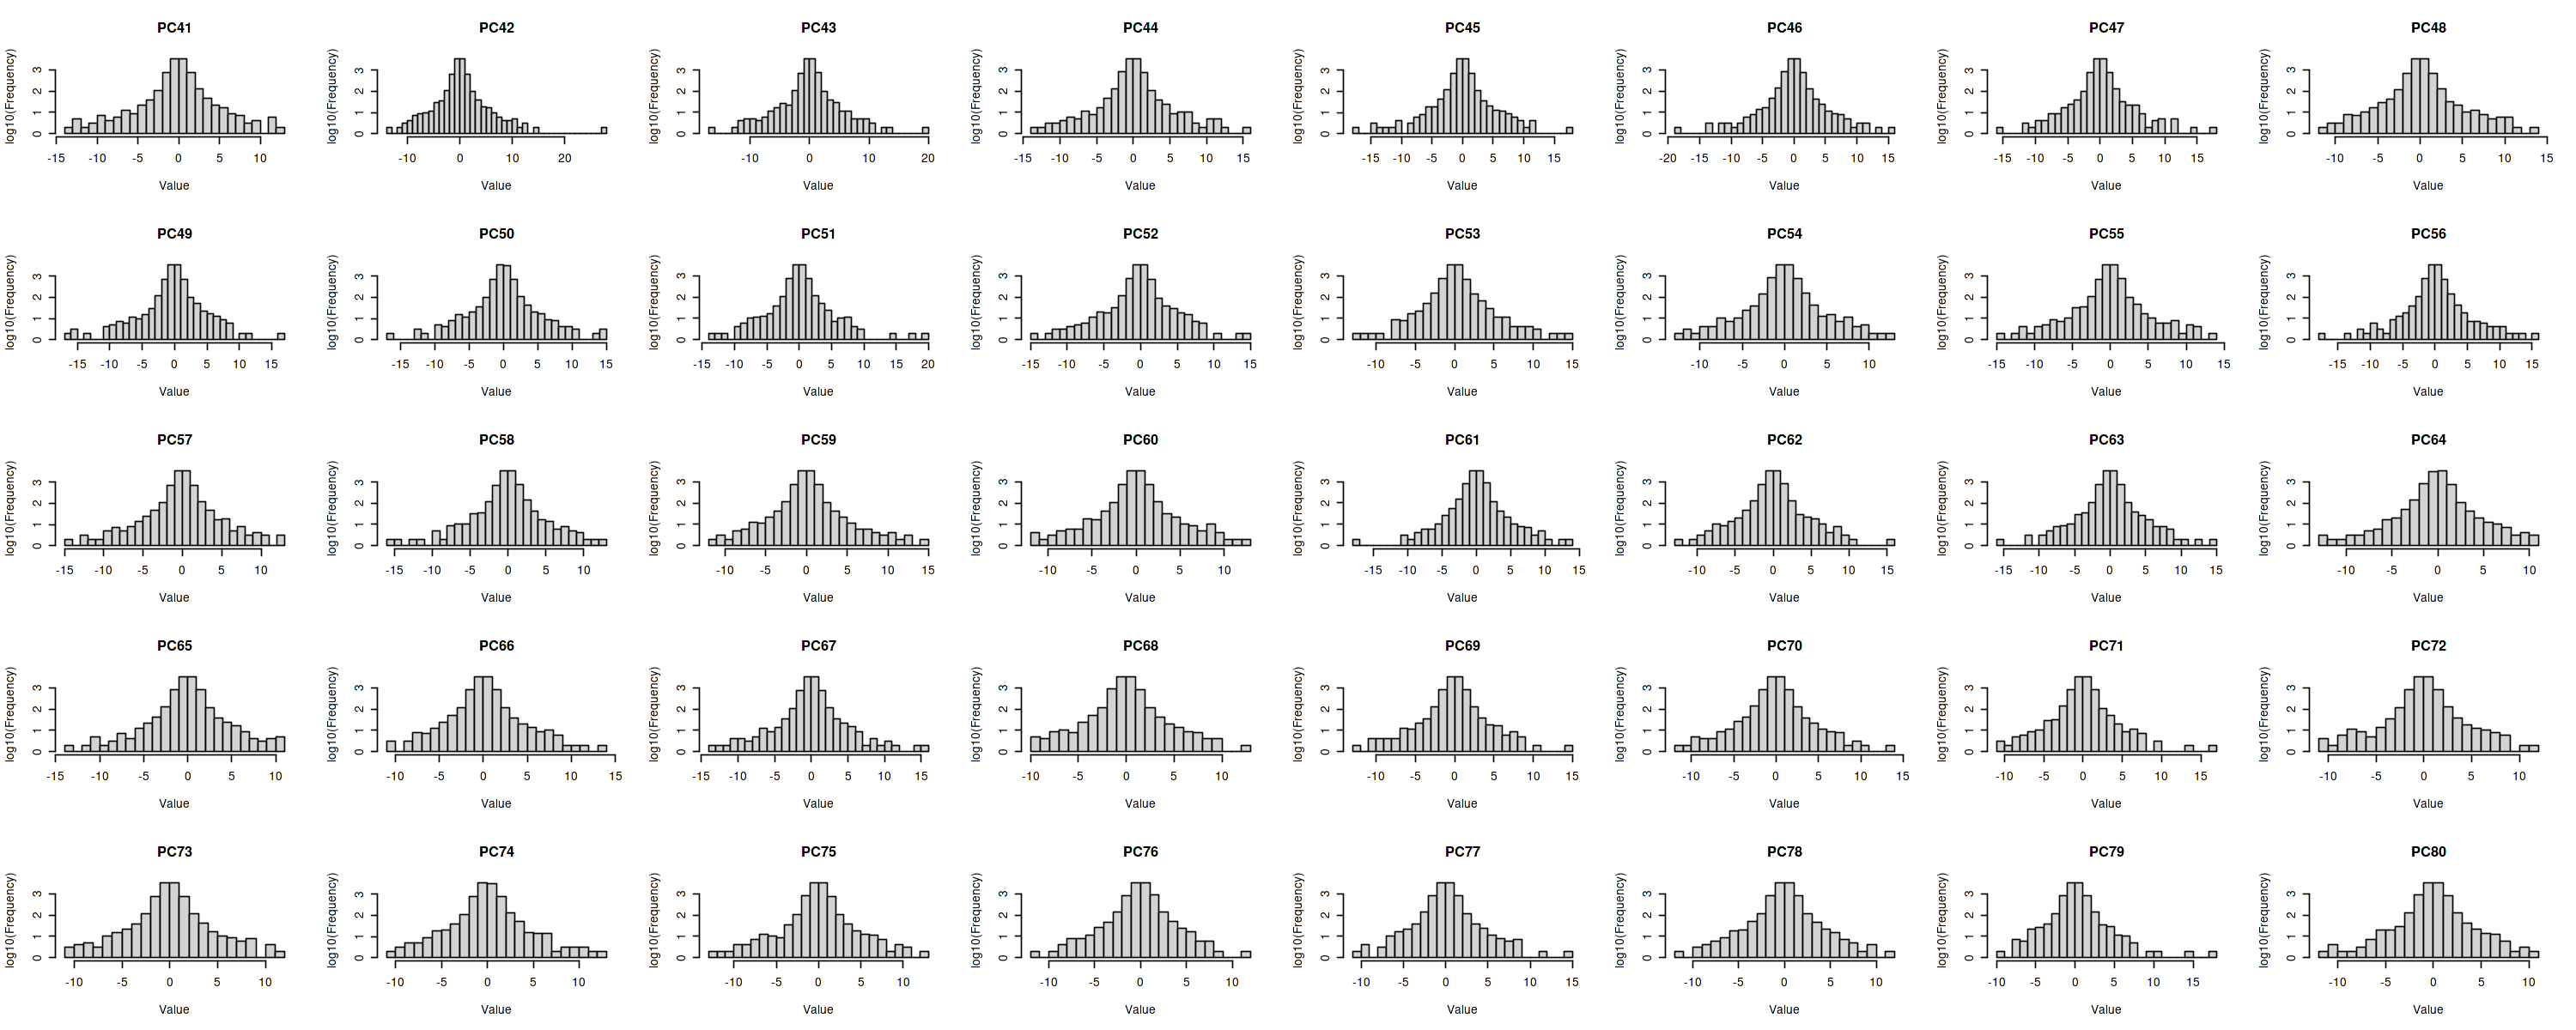

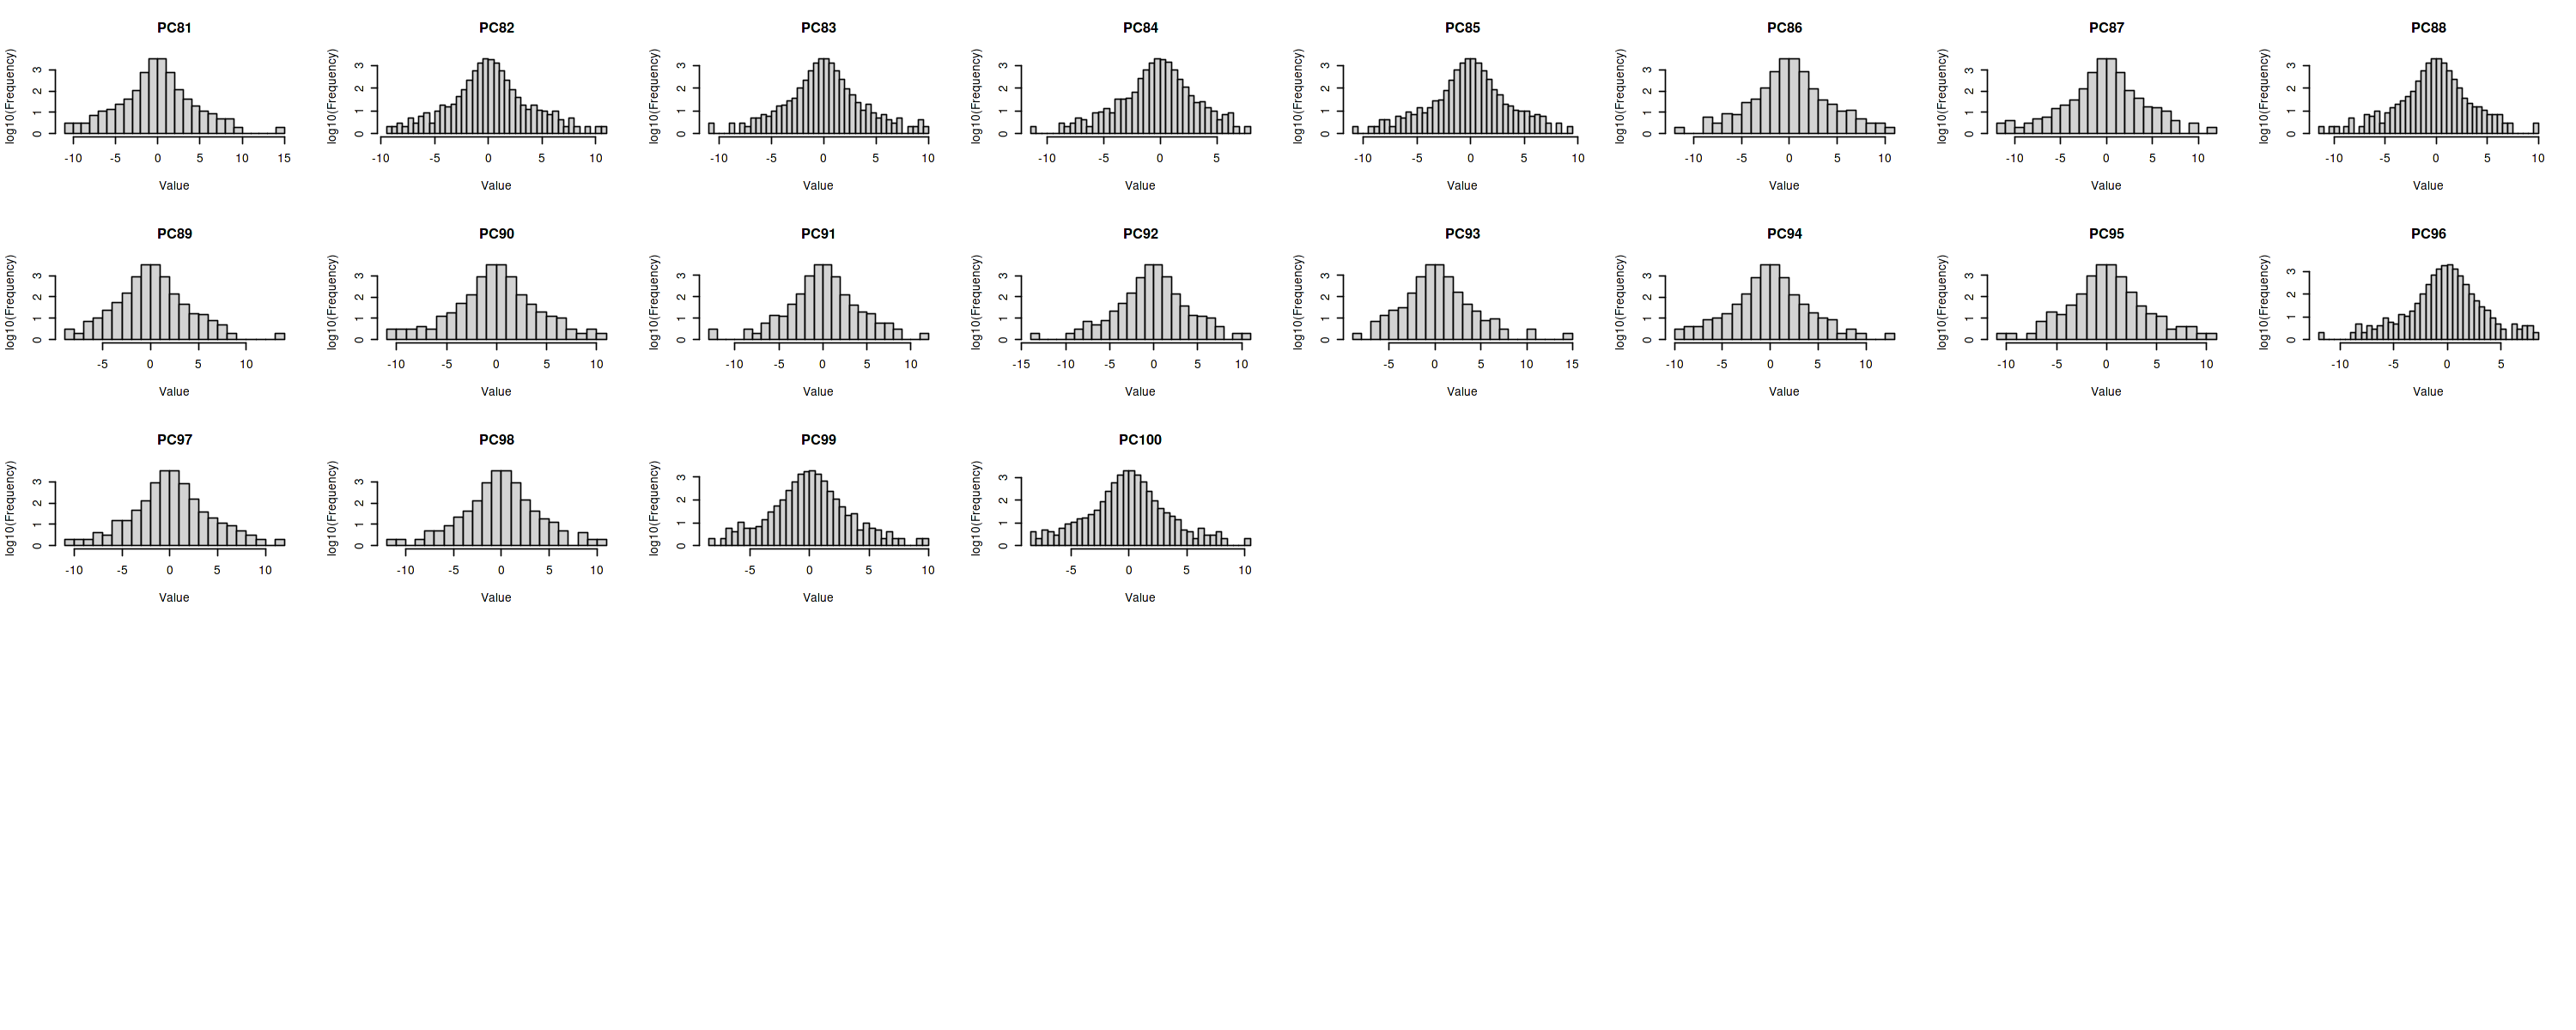

In [95]:
agg_df <- DataFrame(Fmat)
options(repr.plot.width=25, repr.plot.height=10)
# Set up the plotting area to show multiple histograms
par(mfrow = c(5, 8))

# Plot a histogram for each column of the dataframe
for (col in names(agg_df)[1:100]) {
  hist.data = hist(agg_df[[col]], plot=F, breaks=30)
  hist.data$counts = log10(hist.data$counts+1)

plot(hist.data, ylab='log10(Frequency)', xlab="Value", main = col)
}

In [60]:
write.table(Fmat, file = "ArchR.Gene.Agg.pca.tsv", sep = "\t", quote = FALSE, col.names = FALSE)

In [88]:
Fmat <- read.table("ArchR.Gene.Agg.pca.tsv", sep='\t', comment.char = "", row.names = 1)

#### Directly use gene score + pca

In [61]:
# create sce object
sce <- SingleCellExperiment(list(counts=gene_mx))
# normalize the meta-features
sce <- scuttle::logNormCounts(sce)
dec <- modelGeneVar(sce)

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


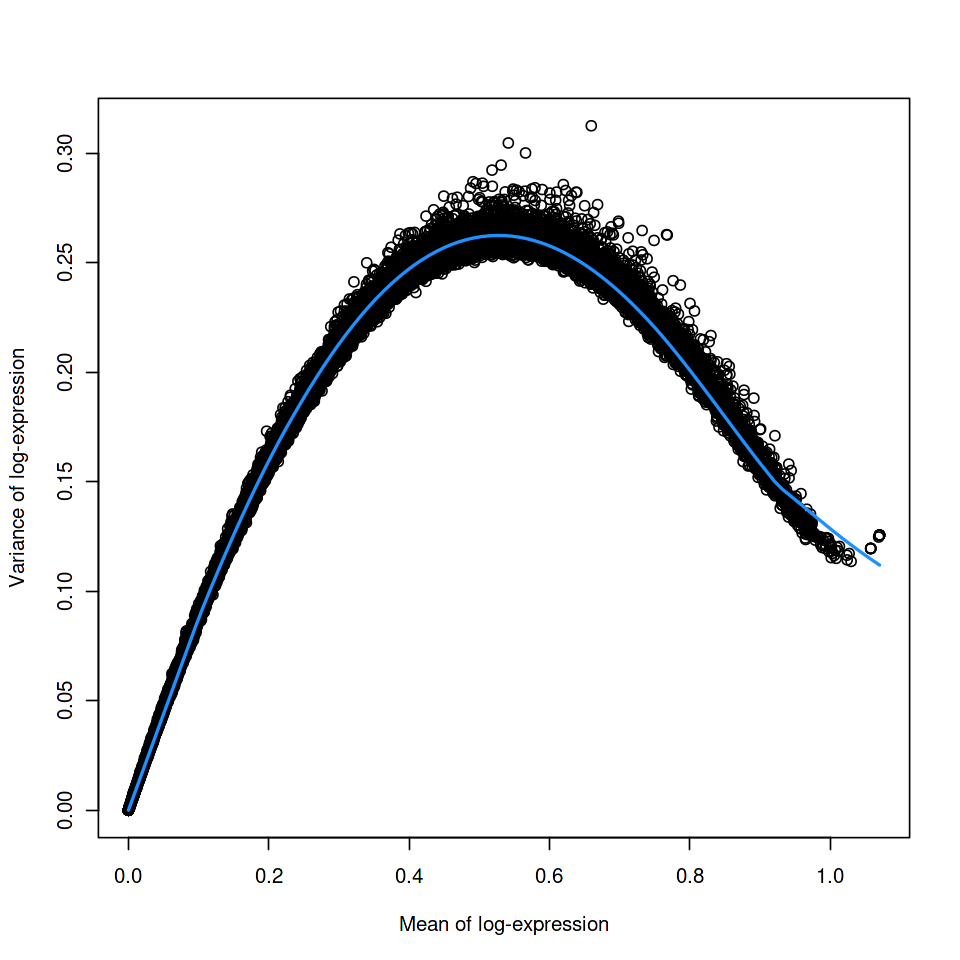

In [62]:
# Visualizing the fit:
fit <- metadata(dec)

options(repr.plot.width=8, repr.plot.height=8)
plot(fit$mean, fit$var, xlab="Mean of log-expression",
    ylab="Variance of log-expression")
curve(fit$trend(x), col="dodgerblue", add=TRUE, lwd=2)

In [63]:
chosen <- getTopHVGs(dec, prop=0.5)
sce_sub <- sce[chosen,]

In [64]:
dim(sce_sub)

[1] 6996 8560

In [65]:
# pca1 <- scater::runPCA(t(logcounts(sce)), center=TRUE, scale=TRUE, rank=100)
# Fmat1 <- as.matrix(pca1$x)

pca2 <- scater::runPCA(t(logcounts(sce_sub)), center=TRUE, scale=TRUE, rank=100)
Fmat2 <- as.matrix(pca2$x)

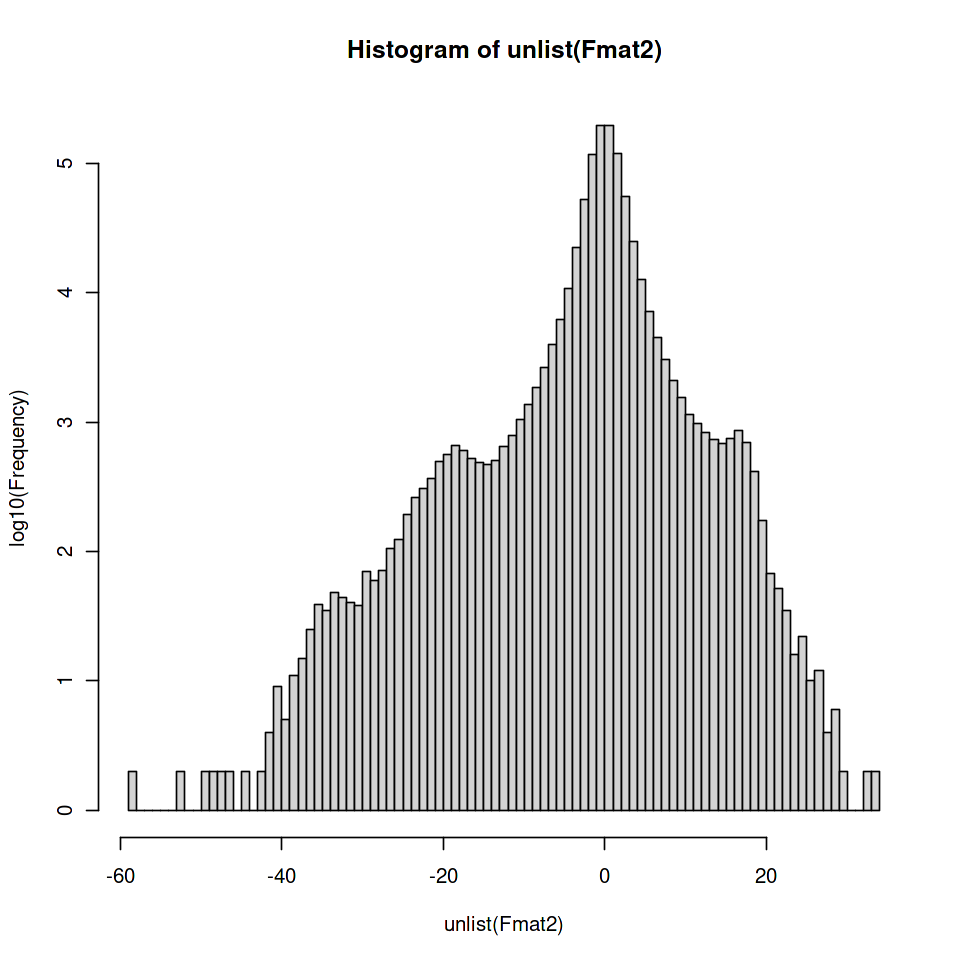

In [67]:
options(repr.plot.width=8, repr.plot.height=8)
hist.data = hist(unlist(Fmat2), plot=F, breaks=100)
hist.data$counts = log10(hist.data$counts+1)

# dev.new(width=4, height=4)
plot(hist.data, ylab='log10(Frequency)')

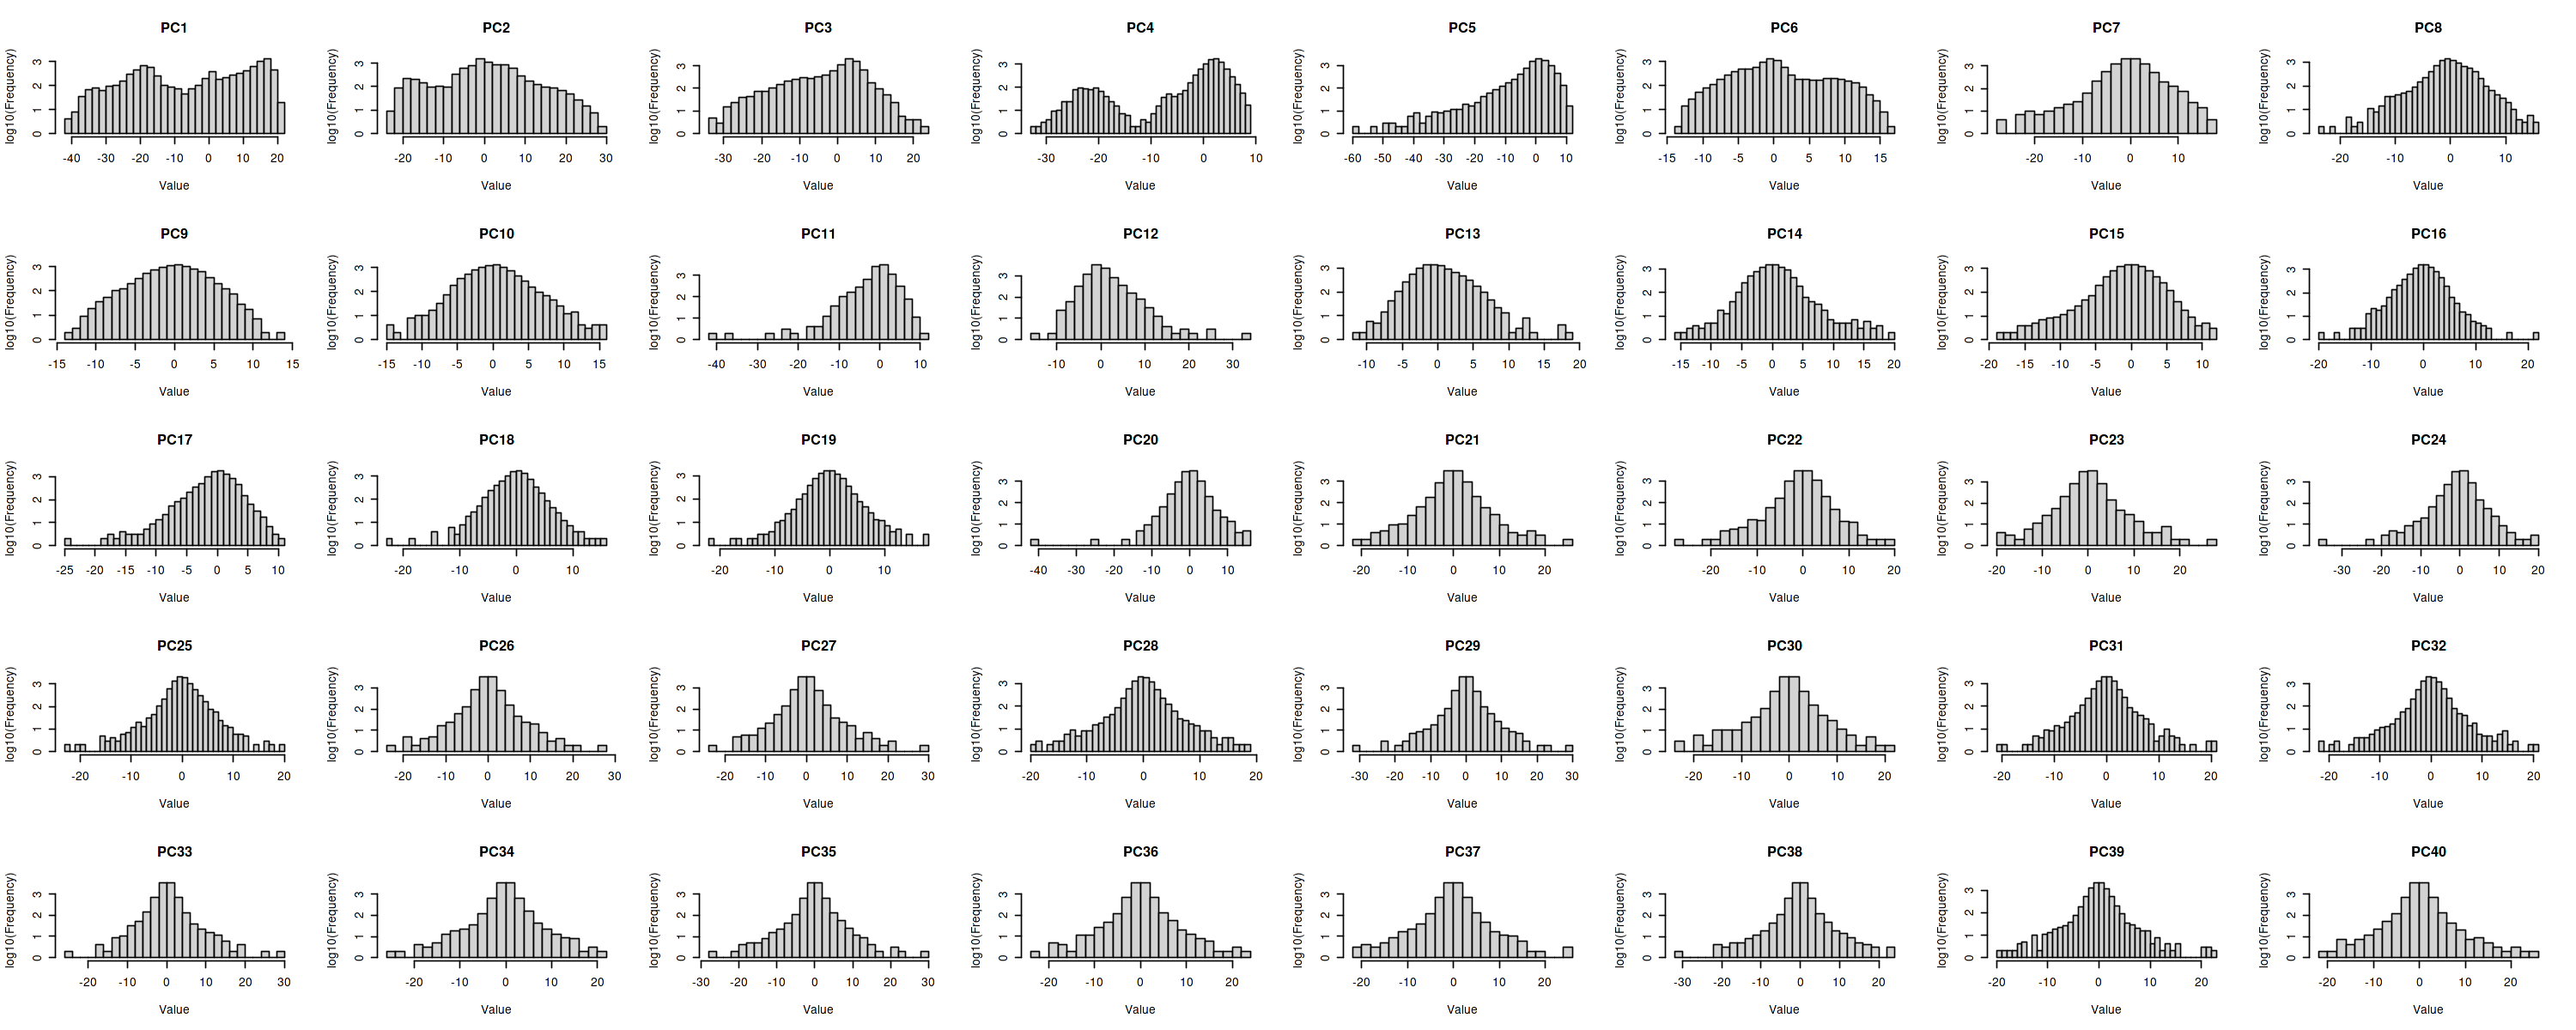

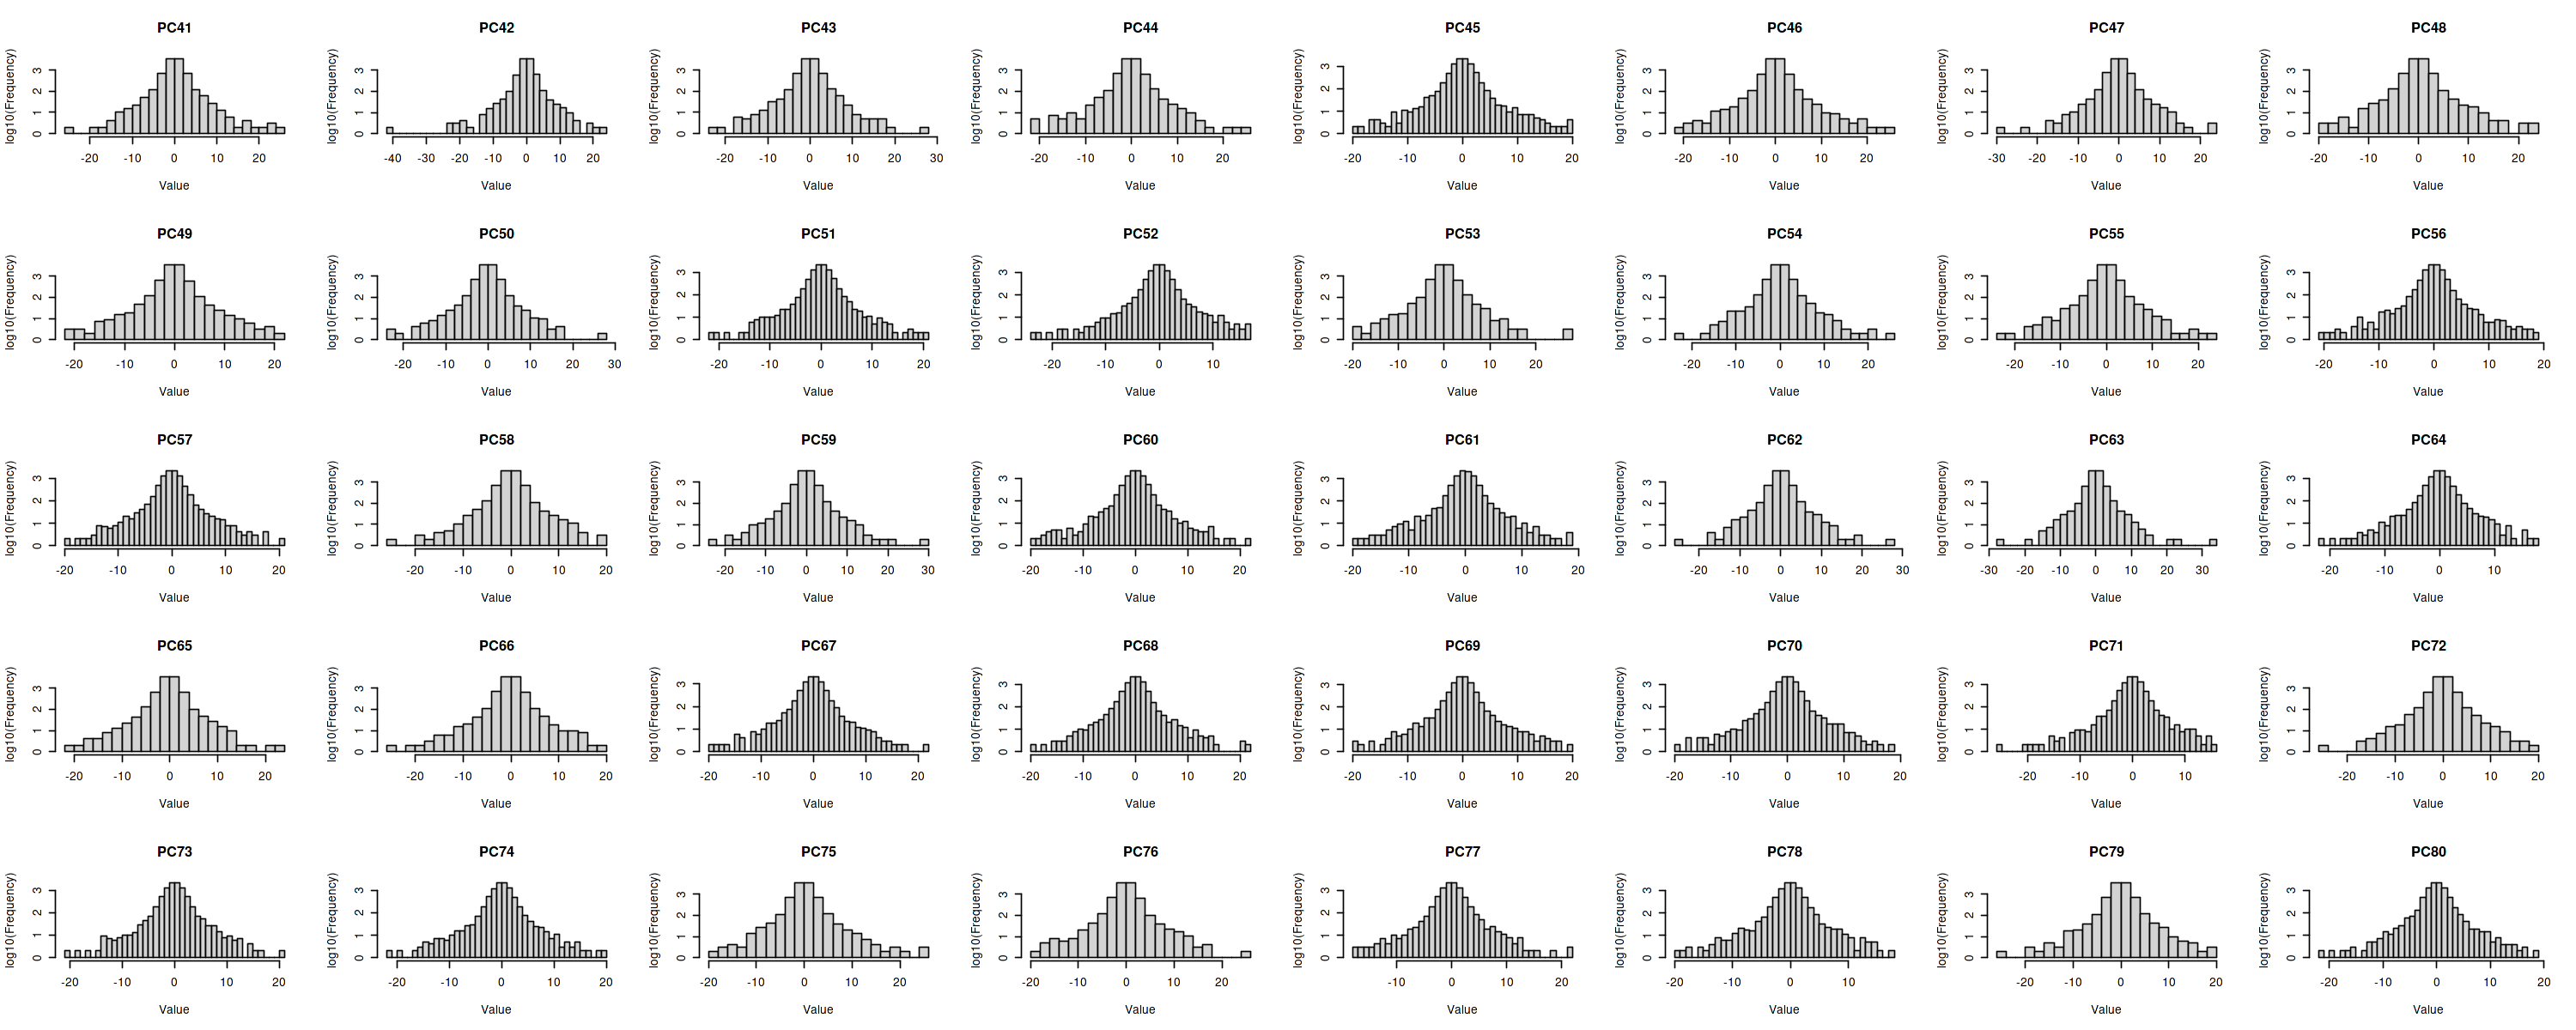

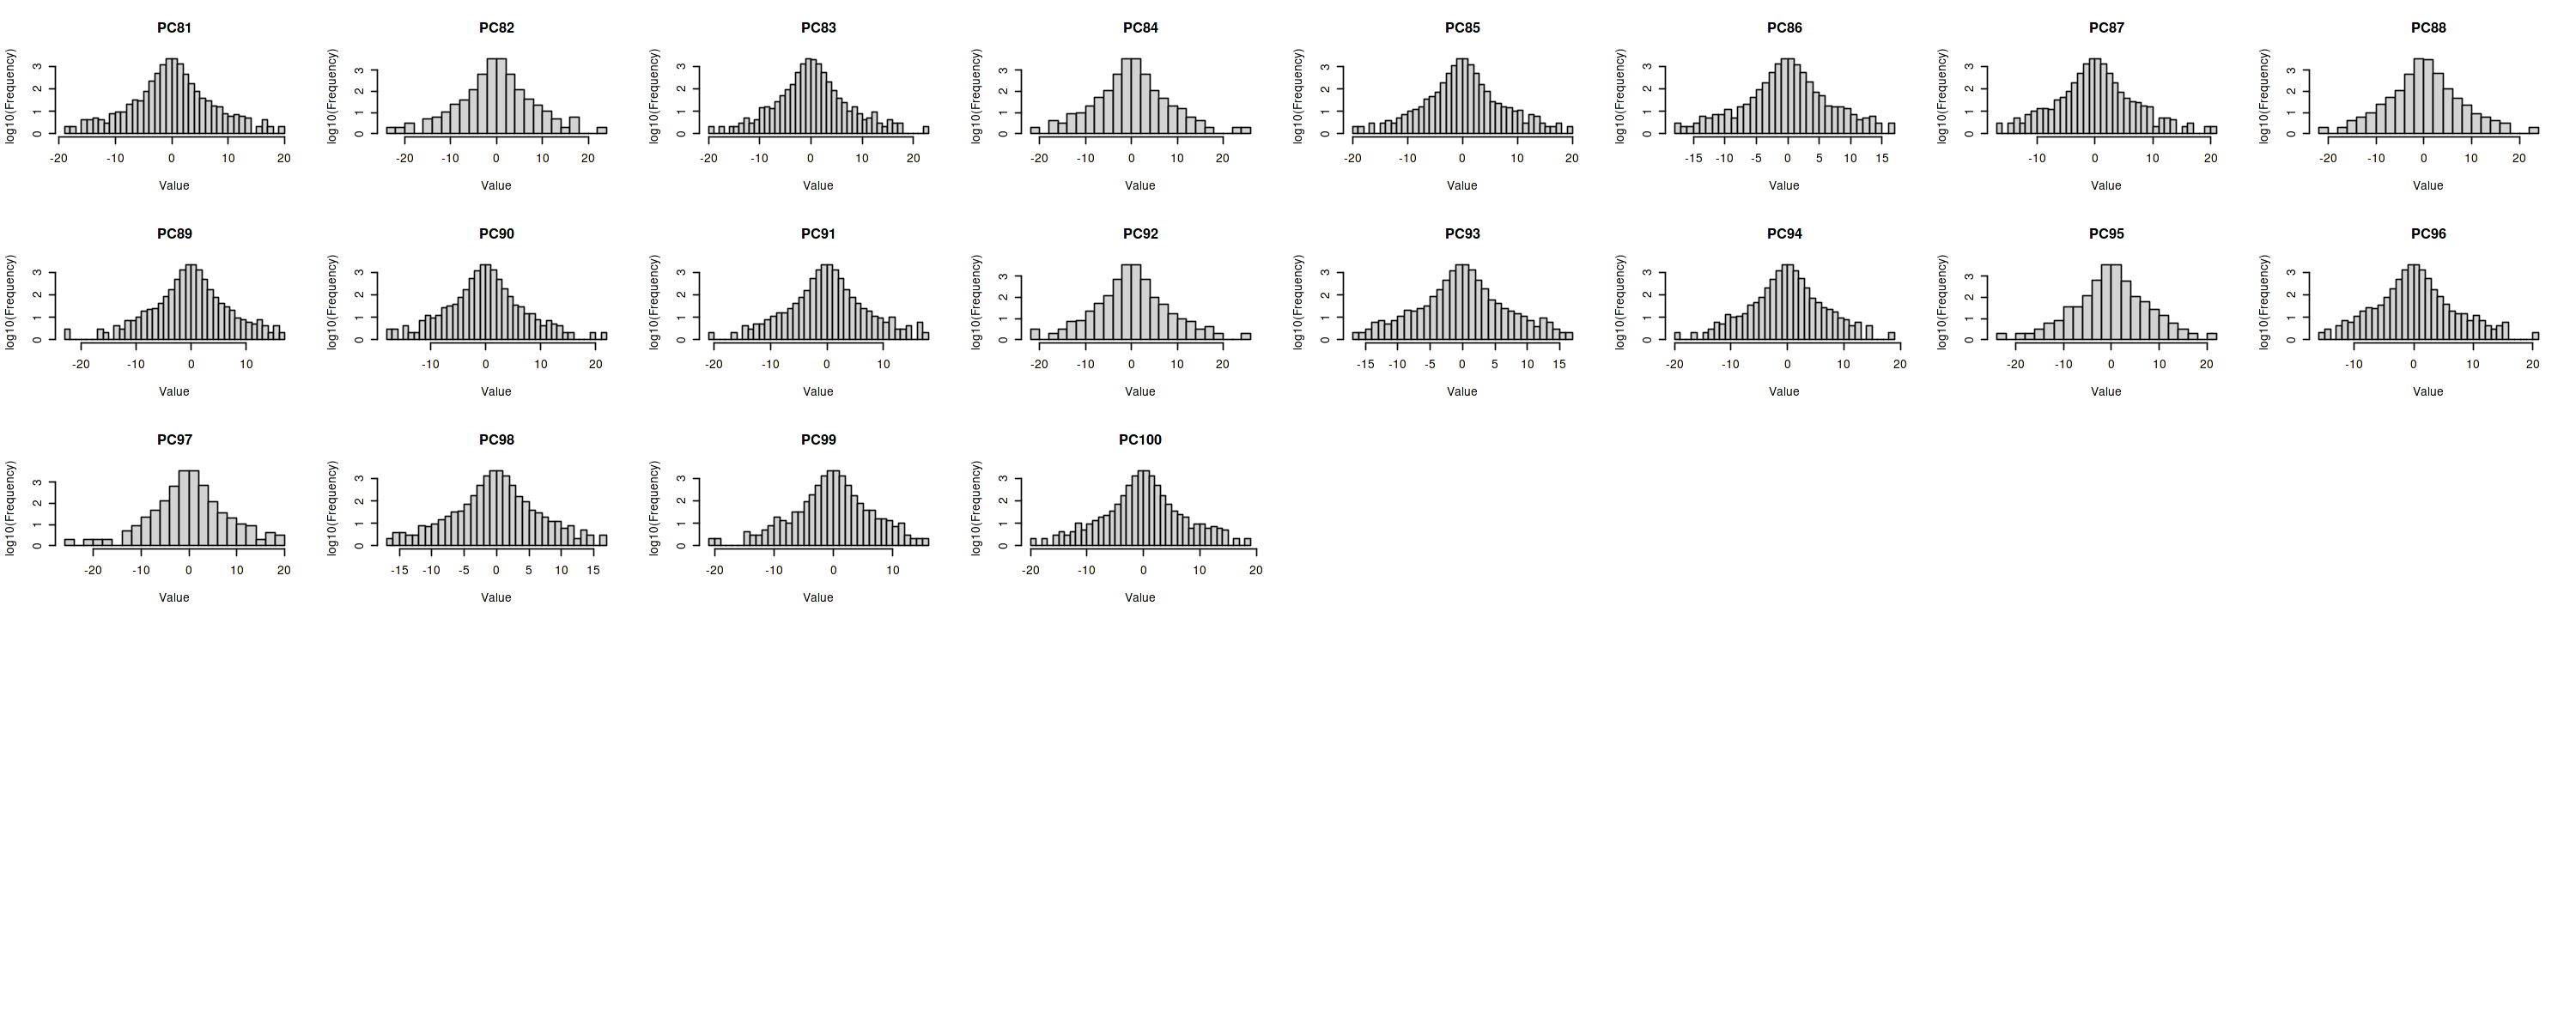

In [69]:
agg_df <- DataFrame(Fmat2)
options(repr.plot.width=25, repr.plot.height=10)
# Set up the plotting area to show multiple histograms
par(mfrow = c(5, 8))

# Plot a histogram for each column of the dataframe
for (col in names(agg_df)[1:100]) {
  hist.data = hist(agg_df[[col]], plot=F, breaks=30)
  hist.data$counts = log10(hist.data$counts+1)

plot(hist.data, ylab='log10(Frequency)', xlab="Value", main = col)
}

In [71]:
write.table(Fmat2, file = "ArchR.Gene.sub.pca.tsv", sep = "\t", quote = FALSE, col.names = FALSE)

In [74]:
embedding_file_Signac <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/", dataset, "/feature_engineering/R/Signac/by_cluster_peaks/0/default/100.tsv")
embedding_file_Signac.Agg.all <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/", dataset, "/feature_engineering/R/aggregation/default/500/default/100.tsv")

In [75]:
embedding_file_ArchR <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/", dataset, "/feature_engineering/R/ArchR/tiles/500/default/100.tsv")
embedding_file_ArchR.Agg.sub <- "ArchR.Tile.sub.Agg.pca.tsv"

embedding_file_GeneScore.sub <- "ArchR.Gene.sub.pca.tsv"
embedding_file_GeneScore.agg <- "ArchR.Gene.Agg.pca.tsv"

In [127]:
# add the embedding matrix to Signac object
sobj <- readRDS(sobj_file)
ndim <- 30
sobj <- add_labels(sobj, label_table_file, barcode_col, label_col)
sobj <- add_embedding(sobj, embedding_file_Signac.Agg.all, embed_name="signac.agg", max_dim=ndim)
sobj <- add_embedding(sobj, embedding_file_Signac, embed_name="signac", max_dim=ndim)
sobj <- add_embedding(sobj, embedding_file_ArchR, embed_name="archr", max_dim=ndim)
sobj <- add_embedding(sobj, embedding_file_ArchR.Agg.sub, embed_name="archr.agg", max_dim=ndim)
sobj <- add_embedding(sobj, embedding_file_GeneScore.sub, embed_name="archr.gene", max_dim=ndim)
sobj <- add_embedding(sobj, embedding_file_GeneScore.agg, embed_name="archr.gene.agg", max_dim=ndim)

Warning message:
“No columnames present in cell embeddings, setting to 'LSI_1:30'”
Warning message:
“No columnames present in cell embeddings, setting to 'LSI_1:30'”
Warning message:
“No columnames present in cell embeddings, setting to 'LSI_1:30'”
Warning message:
“No columnames present in cell embeddings, setting to 'LSI_1:30'”
Warning message:
“No columnames present in cell embeddings, setting to 'LSI_1:30'”
Warning message:
“No columnames present in cell embeddings, setting to 'LSI_1:30'”


In [128]:
embed_ls <- c("signac.agg", "signac", "archr", "archr.agg", "archr.gene", "archr.gene.agg")

for(embed_name in embed_ls){
    name1 <- paste0("nn_", embed_name)
    name2 <- paste0("snn_", embed_name)
    sobj <- FindNeighbors(object = sobj, 
                            reduction = embed_name, 
                            graph.name = c(name1, name2)
                        )
    sobj@graphs[[name1]] <- as.Graph(sobj@graphs[[name1]])
    sobj@graphs[[name2]] <- as.Graph(sobj@graphs[[name2]])
    ndim0 <- dim(sobj@reductions[[embed_name]])[2]
    sobj <- RunUMAP(sobj, 
            reduction = embed_name,
            dims = 1:ndim0,
            reduction.name=paste0("umap_" ,embed_name))
    for(r in c(0.2,0.3,0.4,0.5,0.6,0.7,0.8)){
        sobj <- FindClusters(object = sobj, 
                    verbose = FALSE, 
                    algorithm = 4,
                    resolution = r,
                    graph.name = name2
                    )
        sobj@meta.data[[paste0("clustering_" ,embed_name, "_r", r)]] <- sobj$seurat_clusters
    }
}

Computing nearest neighbor graph

Computing SNN

17:30:50 UMAP embedding parameters a = 0.9922 b = 1.112

17:30:50 Read 8560 rows and found 30 numeric columns

17:30:50 Using Annoy for neighbor search, n_neighbors = 30

17:30:50 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:30:51 Writing NN index file to temp file /media/siluo/c55ed6ce-672c-4a68-b60e-cef07edf5933/scratch/Rtmp5yFy0p/filefa7ba3f144e4c

17:30:51 Searching Annoy index using 1 thread, search_k = 3000

17:30:53 Annoy recall = 100%

17:30:55 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

17:30:58 Initializing from normalized Laplacian + noise (using irlba)

17:30:58 Commencing optimization for 500 epochs, with 384992 positive edges

17:31:07 Optimization finished

In [129]:
setwd("~/public/SiyuanLuo/projects/benchmark/scripts/analysis/agg")
saveRDS(sobj, "PBMC_sobj_ndim30.RDS")

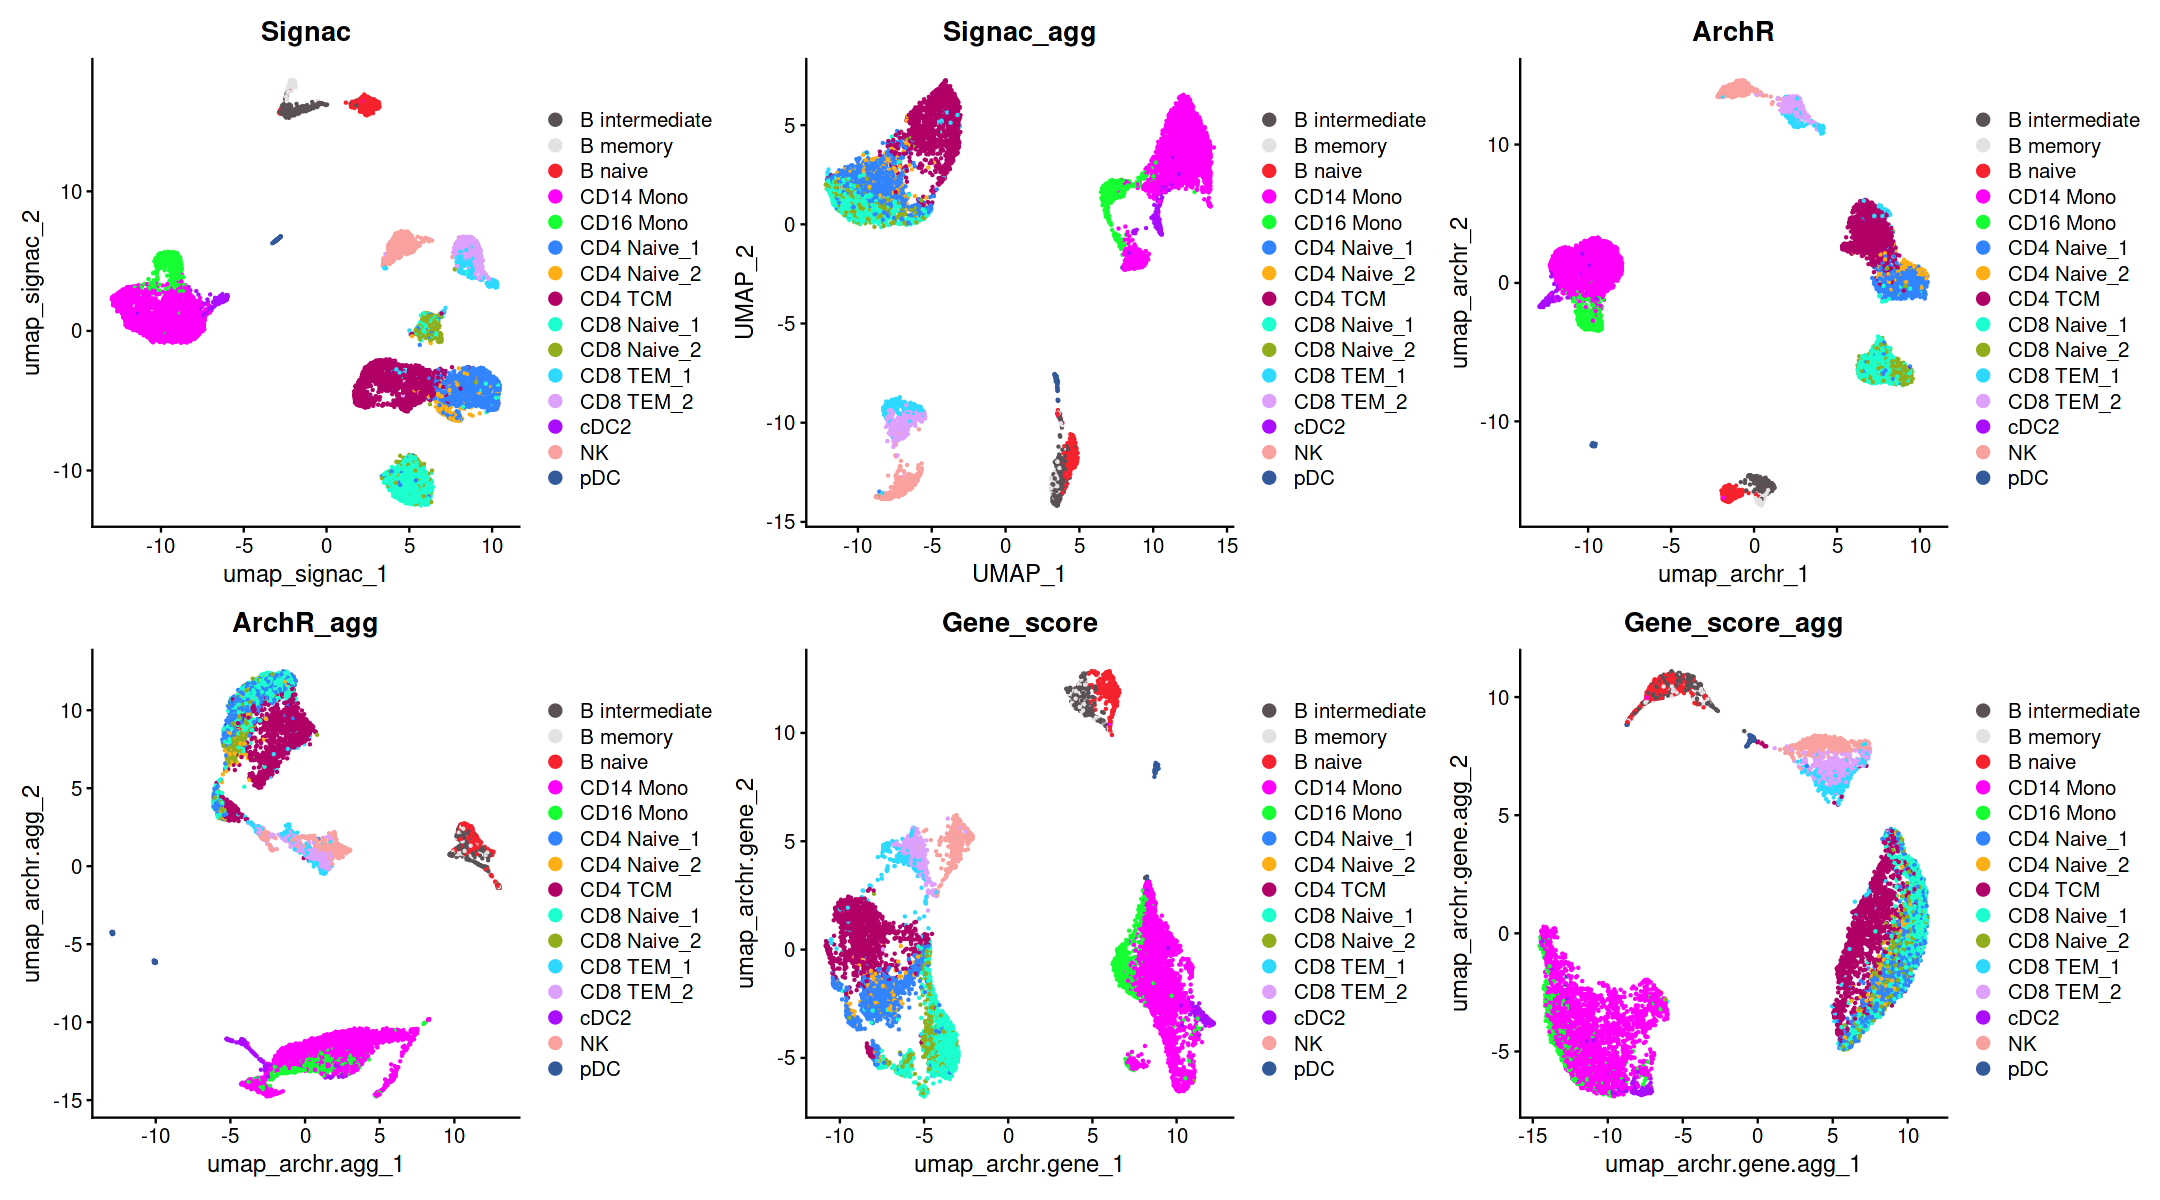

In [130]:
options(repr.plot.width=18, repr.plot.height=10)

par(mfrow=c(3,2))

p1 <- DimPlot(sobj, reduction = "umap_signac", label = F, repel=T, 
        group.by = "ground_truth", cols="polychrome")  + ggtitle("Signac") 
#+ NoLegend()
p2 <- DimPlot(sobj, reduction = "umap_signac.agg", label = F, repel=T, 
        group.by = "ground_truth", cols="polychrome")  + ggtitle("Signac_agg") #+ NoLegend()

p3 <- DimPlot(sobj, reduction = "umap_archr", label = F, repel=T, 
        group.by = "ground_truth", cols="polychrome")  + ggtitle("ArchR") 
#+ NoLegend()
p4 <- DimPlot(sobj, reduction = "umap_archr.agg", label = F, repel=T, 
        group.by = "ground_truth", cols="polychrome")  + ggtitle("ArchR_agg") #+ NoLegend()

p5 <- DimPlot(sobj, reduction = "umap_archr.gene", label = F, repel=T, 
        group.by = "ground_truth", cols="polychrome")  + ggtitle("Gene_score") 
#+ NoLegend()
p6 <- DimPlot(sobj, reduction = "umap_archr.gene.agg", label = F, repel=T, 
        group.by = "ground_truth", cols="polychrome")  + ggtitle("Gene_score_agg") #+ NoLegend()

p1 + p2 + p3 + p4 + p5 + p6

In [131]:
embed_ls <- c("signac.agg", "signac", "archr", "archr.agg", "archr.gene", "archr.gene.agg")
df <- data.frame(ARI=c(), resolution=c(), method=c(), n_cluster=c())
for(embed_name in embed_ls){
    for(r in c(0.2,0.3,0.4,0.5,0.6,0.7,0.8)){
    pred <- sobj@meta.data[[paste0("clustering_" ,embed_name, "_r", r)]]
    ari <- aricode::ARI(sobj$ground_truth, pred)
    # print(embed_name)
    # print(ari)
    # print(max(as.numeric(unique(pred))))
    df <- rbind(df, list(ARI=ari, resolution=r, method=embed_name, n_cluster=max(as.numeric(unique(pred)))))
    }   
}


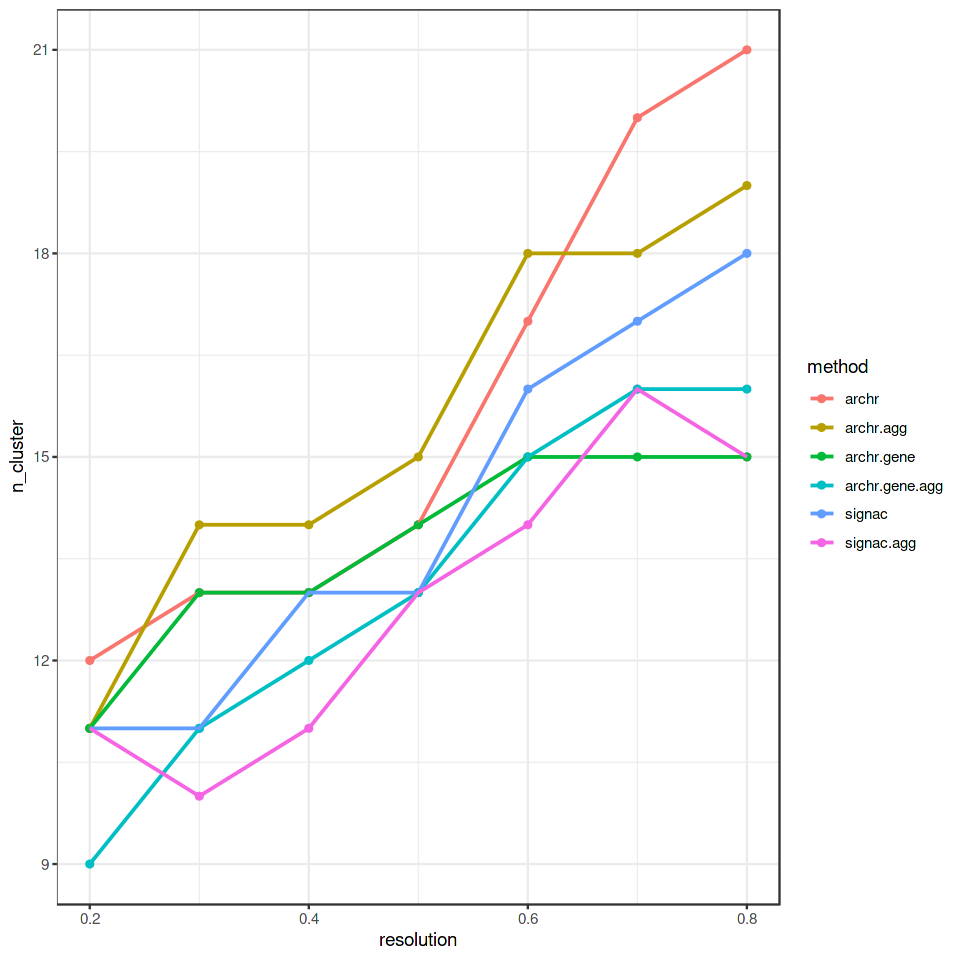

In [132]:
options(repr.plot.width=8, repr.plot.height=8)

df %>% 
  ggplot(aes(x=resolution, y=n_cluster, color=method)) + 
  geom_point(size=1.5) +
  geom_line(size=0.8, aes(x=resolution, y=n_cluster, color=method)) + 
  xlab("resolution") +
  ylab("n_cluster") +
#   geom_vline(xintercept=15, color = "red", linetype = "dashed") +
  theme_bw() #+

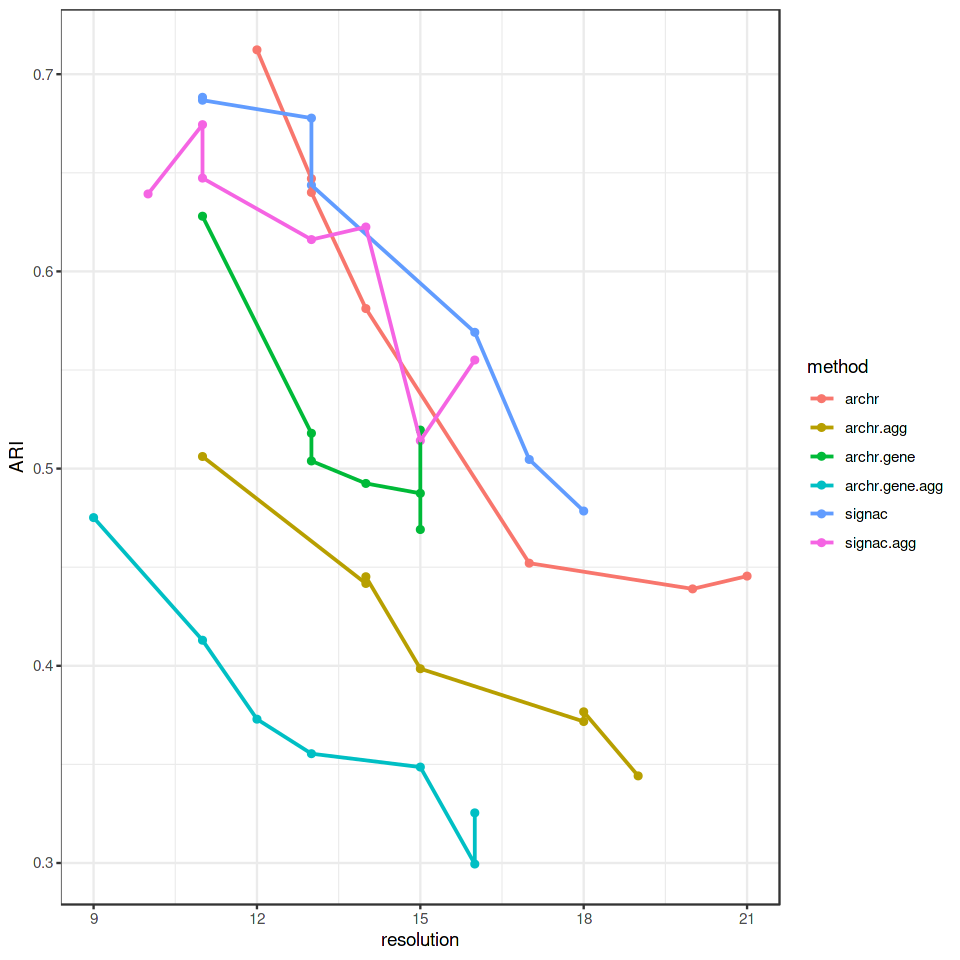

In [133]:
options(repr.plot.width=8, repr.plot.height=8)

df %>% 
  ggplot(aes(x=n_cluster, y=ARI, color=method)) + 
  geom_point(size=1.5) +
  geom_line(size=0.8, aes(x=n_cluster, y=ARI, color=method)) + 
  xlab("resolution") +
  ylab("ARI") +
#   geom_vline(xintercept=15, color = "red", linetype = "dashed") +
  theme_bw() #+
  # geom_errorbar(aes(ymin = min_value, ymax = max_value), width = 0.2, linetype = "dashed") +
#   scale_colour_manual(values = brewer.pal(10, "Paired")[c(1,3:6,7,9:10)])

## 2. Use motif enrichment score

 (using peaks from Signac_by_cluster_peaks)

## 4. Use peaks of enhancer regions only

## 5. Use peaks of nucleosome-free fragments only

## 6. Use peaks of lncRNA regions only